# Recommender Systems

# –ë–∏–±–ª–∏–æ—Ç–µ–∫–∏

In [ ]:
!pip install implicit

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 8.9/8.9 MB 16.6 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 98.7/98.7 MB 4.8 MB/s eta 0:00:00


In [ ]:
from abc import ABC, abstractmethod
from typing import Dict, List

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from implicit.als import AlternatingLeastSquares
from scipy.sparse import csr_matrix
from sklearn.preprocessing import LabelEncoder
from tqdm.auto import tqdm

import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.10/dist-packages/implicit/gpu/__init__.py:13: UserWarning: CUDA extension is built, but disabling GPU support because of 'Cuda Error: CUDA driver version is insufficient for CUDA runtime version (/project/./implicit/gpu/utils.h:71)'
  warnings.warn(


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/ml_tink/kion_data.zip

Archive:  /content/drive/MyDrive/ml_tink/kion_data.zip
   creating: kion_data/
  inflating: __MACOSX/._kion_data    
  inflating: kion_data/.DS_Store     
  inflating: __MACOSX/kion_data/._.DS_Store  
  inflating: kion_data/users.csv     
  inflating: kion_data/train_data.csv  
  inflating: kion_data/items.csv     
  inflating: kion_data/test_data.csv  


# –î–∞–Ω–Ω—ã–µ

–í –∫–∞—á–µ—Å—Ç–≤–µ –¥–∞–Ω–Ω—ã—Ö –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–∞—Ç–∞—Å–µ—Ç –æ—Ç MTS.AI: [kion-data](https://arxiv.org/pdf/2209.00325.pdf).  
–≠—Ç–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –æ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Ä–∞–∑–ª–∏—á–Ω—ã—Ö —Ñ–∏–ª—å–º–æ–≤ –∏ —Å–µ—Ä–∏–∞–ª–æ–≤ —Å –Ω–∞–∑–≤–∞–Ω–∏—è–º–∏, –æ–ø–∏—Å–∞–Ω–∏—è–º–∏ –∏ –ø—Ä–æ—á–∏–º–∏ —Ñ–∏—á–∞–º–∏.
**–û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ –≤—ã –º–æ–∂–µ—Ç–µ –ø–∞—Ä—Å–∏—Ç—å –∏–Ω—Ç–µ—Ä–Ω–µ—Ç, –¥–ª—è –ø–æ–ª—É—á–µ–Ω–∏—è –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã—Ö —Ñ–∏—á–µ–π! –¢–æ–ª—å–∫–æ –Ω–µ –∑–∞–±—É–¥—å—Ç–µ –æ–ø–∏—Å–∞—Ç—å, –∫–∞–∫–∏–µ —Ñ–∏—á–∏ –≤—ã –≤–∑—è–ª–∏ –∏ –≥–¥–µ –≤—ã –∏—Ö –¥–æ—Å—Ç–∞–ª–∏!**   
–ú—ã –∑–∞—Ä–∞–Ω–µ–µ –ø–æ–¥–µ–ª–∏–ª–∏ –≤—ã–±–æ—Ä–∫–∏ –Ω–∞ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é –∏ —Ç–µ—Å—Ç–æ–≤—É—é —á–∞—Å—Ç–∏, –ø–æ—ç—Ç–æ–º—É **–ø—Ä–æ—Å–∏–º** –≤–∞—Å –ø—Ä–∏–¥–µ—Ä–∂–∏–≤–∞—Ç—å—Å—è —Å–ª–µ–¥—É—é—â–∏—Ö –ø—Ä–∞–≤–∏–ª: —Å —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—ã–º–∏ –¥–∞–Ω–Ω—ã–º–∏ —Ä–∞–∑—Ä–µ—à–∞–µ—Ç—Å—è –¥–µ–ª–∞—Ç—å **–≤—Å—ë —á—Ç–æ —É–≥–æ–¥–Ω–æ**, —Ç–µ—Å—Ç–æ–≤—É—é –∂–µ —á–∞—Å—Ç—å **–∑–∞–ø—Ä–µ—â–∞–µ—Ç—Å—è –∏–∑–º–µ–Ω—è—Ç—å**!  

–î–∞—Ç–∞—Å–µ—Ç –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç –∏–∑ —Å–µ–±—è 4 —Ñ–∞–π–ª–∞: —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω—É—é —á–∞—Å—Ç—å (`train_data.csv`), —Ç–µ—Å—Ç–æ–≤—É—é —á–∞—Å—Ç—å(`test_data.csv`), –æ–ø–∏—Å–∞–Ω–∏–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π(`users.csv`) –∏ –æ–ø–∏—Å–∞–Ω–∏–µ –∞–π—Ç–µ–º–æ–≤(`items_.csv`).

In [ ]:
data_folder = "kion_data/"

users_df = pd.read_csv(data_folder + "users.csv")
items_df = pd.read_csv(data_folder + "items.csv")
train_part = pd.read_csv(data_folder + "train_data.csv", parse_dates=["last_watch_dt"])
test_part = pd.read_csv(data_folder + "test_data.csv")
test_part = test_part.groupby("user_id").agg({"ground_truth": list}).reset_index()


# –ü–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏

In [ ]:
users_df.head()

user_id        age        income sex  kids_flg
0   973171  age_25_34  income_60_90   –ú         1
1   962099  age_18_24  income_20_40   –ú         0
2   721985  age_45_54  income_20_40   –ñ         0
3   704055  age_35_44  income_60_90   –ñ         0
4   846063  age_35_44  income_40_60   –ñ         1

In [ ]:
users_df['user_id'].nunique()

366088

## –ö–∞–∫–∏–µ –µ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏?

1. `user_id` ‚Äì –∏–Ω–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è, —É–Ω–∏–∫–∞–ª–µ–Ω –¥–ª—è –∫–∞–∂–¥–æ–≥–æ
2. `age` ‚Äì –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∏–π –≤–æ–∑—Ä–∞—Å—Ç–Ω—É—é –≥—Ä—É–ø–ø—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
3. `income` ‚Äì –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, –ø–æ–∫–∞–∑—ã–≤–∞—é—â–∏–π –∑–∞—Ä–ø–ª–∞—Ç–Ω—É—é –≥—Ä—É–ø–ø—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
4. `sex` ‚Äì –ø–æ–ª –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
5. `kids_flg` ‚Äì –Ω–∞–ª–∏—á–∏–µ –¥–µ—Ç–µ–π —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è


# –ê–π—Ç–µ–º—ã

In [ ]:
items_df.head(2)

item_id content_type           title      title_orig  release_year  \
0    10711         film  –ü–æ–≥–æ–≤–æ—Ä–∏ —Å –Ω–µ–π  Hable con ella        2002.0   
1     2508         film     –ì–æ–ª—ã–µ –ø–µ—Ä—Ü—ã    Search Party        2014.0   

                                    genres countries  for_kids  age_rating  \
0  –¥—Ä–∞–º—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã   –ò—Å–ø–∞–Ω–∏—è       NaN        16.0   
1         –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –∫–æ–º–µ–¥–∏–∏       –°–®–ê       NaN        16.0   

  studios         directors  \
0     NaN  –ü–µ–¥—Ä–æ –ê–ª—å–º–æ–¥–æ–≤–∞—Ä   
1     NaN    –°–∫–æ—Ç –ê—Ä–º—Å—Ç—Ä–æ–Ω–≥   

                                              actors  \
0  –ê–¥–æ–ª—å—Ñ–æ –§–µ—Ä–Ω–∞–Ω–¥–µ—Å, –ê–Ω–∞ –§–µ—Ä–Ω–∞–Ω–¥–µ—Å, –î–∞—Ä–∏–æ –ì—Ä–∞–Ω–¥–∏...   
1  –ê–¥–∞–º –ü–∞–ª–ª–∏, –ë—Ä–∞–π–∞–Ω –•–∞—Å–∫–∏, –î–∂.–ë. –°–º—É–≤, –î–∂–µ–π—Å–æ–Ω ...   

                                         description  \
0  –ú–µ–ª–æ–¥—Ä–∞–º–∞ –ª–µ–≥–µ–Ω–¥–∞—Ä–Ω–æ–≥–æ –ü–µ–¥—Ä–æ –ê–ª—å–º–æ–¥–æ–≤–∞—Ä–∞ ¬´–ü–æ–≥–æ...   
1  –£–º–æ—Ä–∏—Ç–µ–ª—å–Ω–∞—è —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–∞—è –∫–æ–º–µ–¥–∏—è –Ω–∞ –ø–æ–ø—É–ª—è—Ä–Ω—É—é...   

                                            keywords  
0  –ü–æ–≥–æ–≤–æ—Ä–∏, –Ω–µ–π, 2002, –ò—Å–ø–∞–Ω–∏—è, –¥—Ä—É–∑—å—è, –ª—é–±–æ–≤—å, ...  
1  –ì–æ–ª—ã–µ, –ø–µ—Ä—Ü—ã, 2014, –°–®–ê, –¥—Ä—É–∑—å—è, —Å–≤–∞–¥—å–±—ã, –ø—Ä–µ–æ...

## –ö–∞–∫–∏–µ –µ—Å—Ç—å –ø—Ä–∏–∑–Ω–∞–∫–∏?

1. `item_id` ‚Äì –∏–Ω–¥–µ–Ω—Ç–∏—Ñ–∏–∫–∞—Ç–æ—Ä –∞–π—Ç–µ–º–∞, —É–Ω–∏–∫–∞–ª–µ–Ω –¥–ª—è –∫–∞–∂–¥–æ–≥–æ
2. `content_type` ‚Äì –∫–∞—Ç–µ–≥–æ—Ä–∏–∞–ª—å–Ω—ã–π –ø—Ä–∏–∑–Ω–∞–∫, —Ç–∏–ø –∞–π—Ç–µ–º–∞ (—Ñ–∏–ª—å–º, —Å–µ—Ä–∏–∞–ª –∏ —Ç.–¥.)
3. `title` ‚Äì –ù–∞–∑–≤–∞–Ω–∏–µ –Ω–∞ —Ä—É—Å—Å–∫–æ–º —è–∑—ã–∫–µ
4. `title_orig` ‚Äì –ù–∞–∑–≤–∞–Ω–∏–µ –Ω–∞ —è–∑—ã–∫–µ –æ—Ä–∏–≥–∏–Ω–∞–ª–∞
5. `release_year` ‚Äì –≥–æ–¥ –≤—ã—Ö–æ–¥–∞
6. `genres` ‚Äì —Å–ø–∏—Å–æ–∫ –∂–∞–Ω—Ä–æ–≤ (–ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω —Å—Ç—Ä–æ–∫–æ–π)
7. `countries` ‚Äì —Å—Ç—Ä–∞–Ω–∞ –∏–∑–¥–∞–Ω–∏—è
8. `for_kids` ‚Äì –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω –¥–ª—è –¥–µ—Ç–µ–π
9. `age_rating` ‚Äì –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π —Ä–µ–π—Ç–∏–Ω–≥ –∫–∞—Ä—Ç–∏–Ω—ã
10. `studios` ‚Äì —Å—Ç—É–¥–∏—è, –≤—ã–ø—É—Å—Ç–∏–≤—à–∞—è –∫–∞—Ä—Ç–∏–Ω—É
11. `directors` ‚Äì —Ä–µ–∂–∏—Å—Å–µ—Ä(—ã)
12. `actors` ‚Äì –∞–∫—Ç—ë—Ä—ã
13. `description` ‚Äì –æ–ø–∏—Å–∞–Ω–∏–µ (–Ω–∞ —Ä—É—Å—Å–∫–æ–º)
14. `keywords` ‚Äì –∫–ª—é—á–µ–≤—ã–µ —Å–ª–æ–≤–∞, –æ–ø–∏—Å—ã–≤–∞—é—â–∏–µ –∫–∞—Ä—Ç–∏–Ω—É


# –ü—Ä–æ—Å–º–æ—Ç—Ä—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π

### –¢—Ä–µ–Ω–∏—Ä–æ–≤–∞—á–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ

In [ ]:
print(f"–ß–∏—Å–ª–æ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∞—á–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–∞–∫—Ü–∏–π: {len(train_part):,}")
train_part.head()

–ß–∏—Å–ª–æ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–∞—á–Ω—ã—Ö –∏–Ω—Ç–µ—Ä–∞–∫—Ü–∏–π: 1,224,560


user_id  item_id last_watch_dt  total_dur  watched_pct
0   176549     9506    2021-05-11     4250.0         72.0
1   699317     1659    2021-05-29     8317.0        100.0
2   656683     7107    2021-05-09       10.0          0.0
3   864613     7638    2021-07-05    14483.0        100.0
4   964868     9506    2021-04-30     6725.0        100.0

### –¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ

In [ ]:
print(f"–ß–∏—Å–ª–æ —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: {len(test_part):,}")
test_part.head()

–ß–∏—Å–ª–æ —Ç–µ—Å—Ç–æ–≤—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π: 18,693


user_id                                  ground_truth
0       30                           [8584, 3031, 15363]
1      144                          [3800, 11987, 10942]
2      241                    [14841, 6162, 5808, 15266]
3      259  [16509, 10509, 4491, 5434, 4471, 10772, 817]
4      475                            [6214, 3734, 6686]

### –û–±—Ä–∞—Ç–∏—Ç–µ –≤–Ω–∏–º–∞–Ω–∏–µ, —á—Ç–æ —Ñ–æ—Ä–º–∞—Ç –¥–∞–Ω–Ω—ã—Ö —Ç–µ—Å—Ç–æ–≤–æ–π –∏ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–π —á–∞—Å—Ç–µ–π –æ—Ç–ª–∏—á–∞–µ—Ç—Å—è.
#### –≠—Ç–æ —Å–¥–µ–ª–∞–Ω–æ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –≤—ã –º–æ–≥–ª–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –≤ —Å–≤–æ–∏—Ö –º–æ–¥–µ–ª—è—Ö, –Ω–∞–ø—Ä–∏–º–µ—Ä —Ç–∞–∫—É—é –∫–∞–∫ –≤—Ä–µ–º—è –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ (`total_dur`), –ø—Ä–æ—Ü–µ–Ω—Ç –ø—Ä–æ—Å–º–æ—Ç—Ä–∞(`watched_pct`), –∞ —Ç–∞–∫ –∂–µ –¥–∞—Ç—É –ø–æ—Å–ª–µ–¥–Ω–µ–≥–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞ (`last_watch_dt`)
#### –ü—Ä–∏ —ç—Ç–æ–º –Ω–∞ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö —Ç–∞–∫–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏ –Ω–µ—Ç, —Ç–∞–∫ –∫–∞–∫ –º—ã –Ω–µ –º–æ–∂–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å –≤ –±—É–¥—É—â–µ–µ.     

#### –¢–µ—Å—Ç–æ–≤—ã–µ –¥–∞–Ω–Ω—ã–µ —Ç–∞–∫–∂–µ –ø—Ä–∏–≤–µ–¥–µ–Ω—ã –≤ —É–¥–æ–±–Ω—ã–π –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –º–µ—Ç—Ä–∏–∫ –≤–∏–¥.

# –ú–µ—Ç—Ä–∏–∫–∏

#### –ö—Ä–∞—Ç–∫–æ —Ä–∞—Å—Å–∫–∞–∂–µ–º –ø—Ä–æ –º–µ—Ç—Ä–∏–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –º—ã –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –¥–ª—è –∏–∑–º–µ—Ä–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –Ω–∞—à–∏—Ö –º–æ–¥–µ–ª–µ–π.  

–ú—ã –±—É–¥–µ–º —Å–º–æ—Ç—Ä–µ—Ç—å –≤—Å–µ–≥–æ –Ω–∞ –¥–≤–µ –º–µ—Ç—Ä–∏–∫–∏: **ndcg** –∏ **recall**.  
–í—Å–µ –º–µ—Ç—Ä–∏–∫–∏ –∏–∑–º–µ—Ä—è—é—Ç—Å—è –¥–æ –∫–∞–∫–æ–π-—Ç–æ –ø–æ–∑–∏—Ü–∏–∏, —É –Ω–∞—Å —ç—Ç–æ –±—É–¥–µ—Ç **10**. –¢–æ –µ—Å—Ç—å –º—ã –æ—Ç–¥–∞–µ–º 10 —Å–∞–º—ã—Ö –ø–æ–¥—Ö–æ–¥—è—â–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—é –∞–π—Ç–µ–º–æ–≤ –ø–æ –º–Ω–µ–Ω–∏—é –º–æ–¥–µ–ª–∏ –∏ –≥–æ–≤–æ—Ä–∏–º, —á—Ç–æ —ç—Ç–æ –∏ –µ—Å—Ç—å –Ω–∞—à–∏ —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏, –∫–∞—á–µ—Å—Ç–≤–æ –∫–æ—Ç–æ—Ä—ã—Ö –º—ã —Ö–æ—Ç–∏–º –æ—Ü–µ–Ω–∏—Ç—å.  

**ndcg** –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫ –º–æ–¥–µ–ª—å —Å–ø—Ä–∞–≤–ª—è–µ—Ç—Å—è —Å –∑–∞–¥–∞—á–µ–π —Ä–∞–Ω–∂–∏—Ä–æ–≤–∞–Ω–∏—è, —Ç–æ –µ—Å—Ç—å —Å—Ç–∞–≤–∏—Ç –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–µ –∞–π—Ç–µ–º—ã –≤—ã—à–µ –Ω–µ–ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö
**recall** –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, –∫–∞–∫ –º–Ω–æ–≥–æ —Ä–µ–ª–µ–≤–∞–Ω—Ç–Ω—ã—Ö –∞–π—Ç–µ–º–æ–≤ –º–æ–¥–µ–ª—å –≤—ã–¥–∞—ë—Ç –≤ —Ç–æ–ø–µ (—Å–º—ã—Å–ª –∫–∞–∫ –≤ –∑–∞–¥–∞—á–µ –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ü–∏–∏)

*–î–ª—è –æ–±–æ–∏—Ö –º–µ—Ç—Ä–∏–∫ –ª—É—á—à–µ —Ç–∞, –∫–æ—Ç–æ—Ä–∞—è –∫–∞–∫ –º–æ–∂–Ω–æ –±–ª–∏–∂–µ –∫ **1.0***

–ù–µ –±–æ–π—Ç–µ—Å—å, –µ—Å–ª–∏ –≤–∞–º —Å–µ–π—á–∞—Å —á—Ç–æ-—Ç–æ –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ, –ø–æ–¥—Ä–æ–±–Ω–µ–µ –ø—Ä–æ –º–µ—Ç—Ä–∏–∫–∏ –º—ã —Ä–∞—Å—Å–∫–∞–∂–µ–º –Ω–∞ —Å–º–µ–Ω–µ –∏–ª–∏ –º–æ–∂–µ—Ç–µ –ø–æ—á–∏—Ç–∞—Ç—å –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ:)

#### –ù–∏–∂–µ –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω –∫–æ–¥ —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏, –ø–æ–∂–∞–ª—É–π—Å—Ç–∞, –Ω–µ –º–µ–Ω—è–π—Ç–µ –µ–≥–æ!

In [ ]:
# ACHTUNG! DO NOT TOUCH

def ndcg_metric(gt_items: np.ndarray, predicted: np.ndarray) -> float:
    at = len(predicted)
    relevance = np.array([1 if x in predicted else 0 for x in gt_items])
    # DCG uses the relevance of the recommended items
    rank_dcg = dcg(relevance)
    if rank_dcg == 0.0:
        return 0.0

    # IDCG has all relevances to 1 (or the values provided), up to the number of items in the test set that can fit in the list length
    ideal_dcg = dcg(np.sort(relevance)[::-1][:at])

    if ideal_dcg == 0.0:
        return 0.0

    ndcg_ = rank_dcg / ideal_dcg

    return ndcg_


def dcg(scores: np.ndarray) -> float:
    return np.sum(
        np.divide(np.power(2, scores) - 1, np.log2(np.arange(scores.shape[0], dtype=np.float64) + 2)), dtype=np.float64
    )


def recall_metric(gt_items: np.ndarray, predicted: np.ndarray) -> float:
    n_gt = len(gt_items)
    intersection = len(set(gt_items).intersection(set(predicted)))
    return intersection / n_gt


def evaluate_recommender(df: pd.DataFrame, model_preds_col: str, gt_col: str = "ground_truth") -> Dict[str, float]:
    metric_values = []

    for _, row in df.iterrows():
        metric_values.append(
            (ndcg_metric(row[gt_col], row[model_preds_col]), recall_metric(row[gt_col], row[model_preds_col]))
        )

    return {"ndcg": np.mean([x[0] for x in metric_values]), "recall": np.mean([x[1] for x in metric_values])}

#### –ö–ª–∞—Å—Å, –æ—Ç –∫–æ—Ç–æ—Ä–æ–≥–æ —Å—Ç–æ–∏—Ç –Ω–∞—Å–ª–µ–¥–æ–≤–∞—Ç—å –≤—Å–µ –≤–∞—à–∏ –º–æ–¥–µ–ª–∏, —á—Ç–æ–±—ã —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ã –±—ã–ª–æ –ø—Ä–æ—â–µ –ø—Ä–æ–≤–æ–¥–∏—Ç—å

In [ ]:
class BaseRecommender(ABC):
    def __init__(self):
        self.trained = False

    @abstractmethod
    def fit(self, df: pd.DataFrame) -> None:
        # —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å –ª—é–±–æ–π, –Ω–∏–∫–∞–∫–∏—Ö –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–π

        # –Ω–µ –∑–∞–±—É–¥—å—Ç–µ –ø—Ä–æ
        self.trained = True

    @abstractmethod
    def predict(self, df: pd.DataFrame, topn: int = 10) -> List[np.ndarray]:
        # —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è –º–æ–∂–µ—Ç –±—ã—Ç—å –ª—é–±–æ–π, –ù–û
        # –¥–æ–ª–∂–µ–Ω –≤–æ–∑–≤—Ä–∞—â–∞—Ç—å —Å–ø–∏—Å–æ–∫ –º–∞—Å—Å–∏–≤–æ–≤ –∏–∑ item_id, –∫–æ—Ç–æ—Ä—ã–µ –µ—Å—Ç—å –≤ `item_df`, —á—Ç–æ–±—ã –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ —Ä–∞–±–æ—Ç–∞–ª –ø–æ–¥—Å—á–µ—Ç –º–µ—Ç—Ä–∏–∫
        pass

### –ü–µ—Ä–µ–π–¥–µ–º –∫ –º–æ–¥–µ–ª—è–º, –Ω–∞—á–Ω–µ–º —Å —Å—É–ø–µ—Ä –ø—Ä–æ—Å—Ç–æ–≥–æ –ø–æ–¥—Ö–æ–¥–∞ ‚Äì –¥–∞–≤–∞–π—Ç–µ –≤—Å–µ–º —Ä–µ–∫–æ–º–µ–Ω–¥–æ–≤–∞—Ç—å —Ç–æ–ø –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö (–ø–æ —á–∏—Å–ª—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤) –∞–π—Ç–µ–º–æ–≤

# Baseline #1 ‚Äì –¢–æ–ø –ü–æ–ø—É–ª—è—Ä–Ω—ã—Ö

In [ ]:
class TopPopular(BaseRecommender):
    def __init__(self):
        super().__init__()

    def fit(self, df: pd.DataFrame, item_id_col: str = "item_id") -> None:
        # —Å—á–∏—Ç–∞–µ–º –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å –∞–π—Ç–µ–º–æ–≤
        self.recommendations = df[item_id_col].value_counts().index.values
        self.trained = True

    def predict(self, df: pd.DataFrame, topn: int = 10) -> np.ndarray:
        assert self.trained
        # –≤–æ–∑–≤—Ä–∞—â–∞–µ–º –¥–ª—è –≤—Å–µ—Ö –æ–¥–Ω–æ –∏ —Ç–æ –∂–µ
        return [self.recommendations[:topn]] * len(df)


toppop = TopPopular()
toppop.fit(train_part)
test_part["toppopular_recs"] = toppop.predict(test_part)
test_part.head()

user_id                                  ground_truth  len  \
0       30                           [8584, 3031, 15363]    3   
1      144                          [3800, 11987, 10942]    3   
2      241                    [14841, 6162, 5808, 15266]    4   
3      259  [16509, 10509, 4491, 5434, 4471, 10772, 817]    7   
4      475                            [6214, 3734, 6686]    3   

                                     toppopular_recs  
0  [10440, 15297, 13865, 9728, 4151, 2657, 3734, ...  
1  [10440, 15297, 13865, 9728, 4151, 2657, 3734, ...  
2  [10440, 15297, 13865, 9728, 4151, 2657, 3734, ...  
3  [10440, 15297, 13865, 9728, 4151, 2657, 3734, ...  
4  [10440, 15297, 13865, 9728, 4151, 2657, 3734, ...

##### –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –º–µ—Ç—Ä–∏–∫–∏, –¥–ª—è —ç—Ç–æ–≥–æ –ø–µ—Ä–µ–¥–∞–µ–º —Ç–µ—Å—Ç–æ–≤—ã–π –¥–∞—Ç–∞—Ñ—Ä–µ–π–º –∏ –∫–æ–ª–æ–Ω–∫—É —Å –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏—è–º–∏, –≤ –Ω–∞—à–µ–º —Å–ª—É—á–∞–µ —ç—Ç–æ `toppopular_recs`  

In [ ]:
evaluate_recommender(df=test_part, model_preds_col="toppopular_recs")


{'ndcg': 0.17037237918248196, 'recall': 0.0763696799665908}

#### –ù–µ –ø—É–≥–∞–π—Ç–µ—Å—å —Ç–∞–∫–∏—Ö –º–∞–ª–µ–Ω—å–∫–∏—Ö –∑–Ω–∞—á–µ–Ω–∏–π, –≤ RecSys –∑–∞–¥–∞—á–∞—Ö —á–∞—Å—Ç–æ –æ—á–µ–Ω—å —Ç—è–∂–µ–ª–æ –ø–æ–¥—Å—Ç—Ä–æ–∏—Ç—å—Å—è –ø–æ–¥ –¥–∞–Ω–Ω—ã–µ, –ø–æ—ç—Ç–æ–º—É –∞–±—Å–æ–ª—é—Ç–Ω—ã–µ –∑–Ω–∞—á–µ–Ω–∏—è –Ω–µ–≤–µ–ª–∏–∫–∏. –ß—Ç–æ–±—ã –ø–æ-–Ω–∞—Å—Ç–æ—è—â–µ–º—É –æ—Ü–µ–Ω–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –≤–∞—à–µ–π –º–æ–¥–µ–ª–∏, –Ω—É–∂–Ω–æ —Å—Ä–∞–Ω–≤–∏—Ç—å –µ–µ —Å –∫–∞–∫–∏–º-—Ç–æ –ø—Ä–æ—Å—Ç—ã–º —Ä–µ—à–µ–Ω–∏–µ–º, –∫–æ—Ç–æ—Ä–æ–µ –º–æ–∂–Ω–æ —Å—á–∏—Ç–∞—Ç—å –æ—Ç–ø—Ä–∞–≤–Ω–æ–π —Ç–æ—á–∫–æ–π. –ù–∞—à –±–µ–π–∑–ª–∞–π–Ω —Å –ø–æ–ø—É–ª—è—Ä–Ω—ã–º–∏ —Ñ–∏–ª—å–º–∞–º–∏ –∫–∞–∫ —Ä–∞–∑ –ø–æ–¥—Ö–æ–¥–∏—Ç!

### –¢–µ–ø–µ—Ä—å –≤–æ–∑—å–º–µ–º –ø–æ–¥—Ö–æ–¥ –ø–æ—Å–ª–æ–∂–Ω–µ–µ, —É–∂–µ –º–∞—Ç–µ–º–∞—Ç–∏—á–µ—Å–∫–∏ –ø–æ–¥–∫–æ–≤–∞–Ω–Ω—ã–π
–ú—ã –º–æ–∂–µ–º –ø—Ä–µ–¥—Å—Ç–∞–≤–∏—Ç—å –ø—Ä–æ—Å–º–æ—Ç—Ä—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–∞–∫ –º–∞—Ç—Ä–∏—Ü—É, –≥–¥–µ –ø–æ —Å—Ç–æ–ª–±—Ü–∞–º –±—É–¥—É—Ç –æ—Ç–ª–æ–∂–µ–Ω—ã –∞–π—Ç–µ–º—ã, –∞ –ø–æ —Å—Ç—Ä–æ–∫–∞–º ‚Äì –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏. –í `[i,j]` —è—á–µ–π–∫–µ –±—É–¥–µ—Ç —Å—Ç–æ—è—Ç—å 1, –µ—Å–ª–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å —Å–º–æ—Ç—Ä–µ–ª —Ñ–∏–ª—å–º/—Å–µ—Ä–∏–∞–ª –∏ 0, –µ—Å–ª–∏ –Ω–µ—Ç.  
–¢–æ–≥–¥–∞ –Ω–∞—à–µ–π –∑–∞–¥–∞—á–µ–π –±—É–¥–µ—Ç —Ä–∞–∑–ª–æ–∂–∏—Ç—å –∏—Å—Ö–æ–¥–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É –Ω–∞ –¥–≤–µ: –º–∞—Ç—Ä–∏—Ü—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ –º–∞—Ç—Ä–∏—Ü—É –∞–π—Ç–µ–º–æ–≤, –ø–µ—Ä–µ–º–Ω–æ–∂–∏–≤ –∫–æ—Ç–æ—Ä—ã–µ, –º—ã –±—ã –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –ø—Ä–∏–±–ª–∏–∑–∏–ª–∏ –∏–∑–≤–µ—Å—Ç–Ω—ã–µ –Ω–∞–º –µ–¥–∏–Ω–∏—á–∫–∏.
–¢–∞–∫–æ–π –ø–æ–¥—Ö–æ–¥ –ø–æ–∑–≤–æ–ª–∏—Ç –Ω–∞–º –∑–∞–ø–æ–ª–Ω–∏—Ç—å –≤—Å–µ –ø—Ä–æ–ø—É—Å–∫–∏ –≤ –Ω–∞—à–µ–π –º–∞—Ç—Ä–∏—Ü–µ, —Ç–æ –µ—Å—Ç—å –≤—Å–µ –Ω—É–ª–∏.

–î–ª—è —ç—Ç–æ–≥–æ –º–µ—Ç–æ–¥–∞ –±—É–¥–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –º–æ–¥–µ–ª—å **Alternating Least Squares (ALS)**. –û–Ω–∞ –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ—Ç –Ω–∞—à–∏ –º–∞—Ç—Ä–∏—Ü—ã —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –º—ã —Ö–æ—Ä–æ—à–æ –≤–æ—Å—Å—Ç–∞–Ω–∞–≤–ª–∏–≤–∞–ª–∏ –≤—Å–µ –µ–¥–∏–Ω–∏—á–∫–∏.
–ü–æ–¥—Ä–æ–±–Ω–µ–µ –ø—Ä–æ –º–æ–¥–µ–ª—å –º–æ–∂–Ω–æ –ø–æ—á–∏—Ç–∞—Ç—å –≤ [–¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏](https://benfred.github.io/implicit/), –∏–ª–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä, [—Ç—É—Ç](https://medium.com/radon-dev/als-implicit-collaborative-filtering-5ed653ba39fe), –∏–ª–∏ –∫–∞–∫ –≤—Å–µ–≥–¥–∞ ‚Äì –≤ –∏–Ω—Ç–µ—Ä–Ω–µ—Ç–µ.

![Alt text](./images/mf.png)


# Baseline #2 ‚Äì –ú–∞—Ç—Ä–∏—á–Ω–æ–µ —Ä–∞–∑–ª–æ–∂–µ–Ω–∏–µ

In [ ]:
class ALS(BaseRecommender):
    # –∑–¥–µ—Å—å –≤—ã–Ω–µ—Å–µ–Ω—ã —Ç–æ–ª—å–∫–æ –æ—Å–Ω–æ–≤–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏, –≤—Å–µ –≤—ã –º–æ–∂–µ—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏
    def __init__(
        self, factors: int = 100, regularization: float = 0.01, alpha: float = 1.0, iterations: int = 5, **kwargs
    ) -> None:
        super().__init__()
        self.model = AlternatingLeastSquares(
            factors=factors, regularization=regularization, alpha=alpha, iterations=iterations, **kwargs
        )
        self.trained = False

    def fit(
        self, df: pd.DataFrame, item_col: str = "item_id", user_col: str = "user_id", value_col: str = None
    ) -> None:
        self.user_encoder = LabelEncoder()
        self.item_encoder = LabelEncoder()
        user_ids = self.user_encoder.fit_transform(df[user_col])
        item_ids = self.item_encoder.fit_transform(df[item_col])
        if value_col is None:
            counts = np.ones(len(df))
        else:
            counts = df[value_col].values

        matrix_shape = len(self.user_encoder.classes_), len(self.item_encoder.classes_)

        self.sparse = csr_matrix((counts, (user_ids, item_ids)), shape=matrix_shape)
        self.model.fit(self.sparse)

        self.trained = True

    def predict(self, df: pd.DataFrame, topn: int = 10, to_filter: pd.DataFrame = None) -> List[np.ndarray]:
        assert self.trained

        all_recs = []

        users = self.user_encoder.transform(df["user_id"])
        for user in tqdm(users, desc="predicting", leave=False):
            to_filter_items = None
            if to_filter is not None and len(to_filter) > 0:
                orig_user = self.user_encoder.inverse_transform([user])[0]
                vals = to_filter.loc[to_filter['user_id'] == orig_user, 'ground_truth'].values
                if len(vals) > 0:
                    vals = np.intersect1d(vals[0], self.item_encoder.classes_)
                    to_filter_items = self.item_encoder.transform(vals)
            encoded_rec_items = self.model.recommend(user, user_items=self.sparse[user], N=topn, filter_items=to_filter_items)[0]
            all_recs.append(self.item_encoder.inverse_transform(encoded_rec_items))

        return all_recs

In [ ]:
als_rec = ALS(iterations=1, factors=2, random_state=42)
als_rec.fit(train_part)
test_part["als_recs"] = als_rec.predict(test_part)


  0%|          | 0/1 [00:00<?, ?it/s]

predicting:   0%|          | 0/18693 [00:00<?, ?it/s]

#### –°–Ω–æ–≤–∞ —Å—á–∏—Ç–∞–µ–º –º–µ—Ç—Ä–∏–∫–∏

In [ ]:
evaluate_recommender(test_part, model_preds_col="als_recs")


{'ndcg': 0.15702657768326359, 'recall': 0.06956445160783432}

### –û–π-–æ–π, –∫–∞–∂–µ—Ç—Å—è, —á—Ç–æ –∫–∞—á–µ—Å—Ç–≤–æ —Å—Ç–∞–ª–æ —Ö—É–∂–µ, —á–µ–º —É –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö —Ñ–∏–ª—å–º–æ–≤. –í–æ–∑–º–æ–∂–Ω–æ –º—ã –ø–ª–æ—Ö–æ –æ–±—É—á–∏–ª–∏ –º–æ–¥–µ–ª—å, –Ω–µ —Å–∞–º—ã–º –ø—Ä–∞–≤–∏–ª—å–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –æ–±—Ä–∞–±–æ—Ç–∞–ª–∏ –¥–∞–Ω–Ω—ã–µ, –∏–ª–∏ –æ–Ω–∞ –ø—Ä–æ—Å—Ç–æ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö, –≤ –ª—é–±–æ–º —Å–ª—É—á–∞–µ, –≤–∞–º –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç —É–∑–Ω–∞—Ç—å –º–æ–∂–Ω–æ –ª–∏ –æ–±–æ–≥–Ω–∞—Ç—å `toppop` –Ω–∞ –¥–∞–Ω–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ.

## –°–¥–µ–ª–∞–µ–º –Ω–µ–±–æ–ª—å—à–æ–π EDA –Ω–∞—à–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –æ—Ç ALS.

### –ü–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –Ω–∞—à –∞–ª–≥–æ—Ä–∏—Ç–º —á–∞—â–µ –≤—Å–µ–≥–æ —Ä–µ–∫–æ–º–µ–Ω–¥—É–µ—Ç –ø–µ—Ä–≤—ã–º –¥–µ–ª–æ–º:

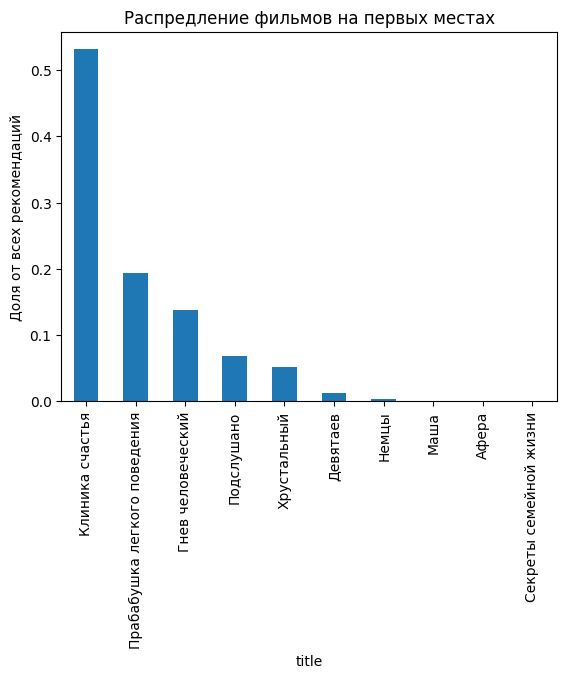

In [ ]:
first_items = pd.DataFrame([x[0] for x in test_part["als_recs"].values], columns=["item_id"])
first_items = (
    first_items.merge(items_df[["item_id", "title"]], on="item_id").groupby("title").size().sort_values(ascending=False)
)
first_items /= first_items.sum()
first_items.head(10).plot(kind="bar")
plt.ylabel("–î–æ–ª—è –æ—Ç –≤—Å–µ—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π")
plt.title("–†–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ —Ñ–∏–ª—å–º–æ–≤ –Ω–∞ –ø–µ—Ä–≤—ã—Ö –º–µ—Å—Ç–∞—Ö")
plt.show()


#### –ü–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø–æ—Ö–æ–∂–∏–µ —Ñ–∏–ª—å–º—ã –∫ —Ñ–∏–ª—å–º—É "–ì–Ω–µ–≤ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–π", —Å–æ–≥–ª–∞—Å–Ω–æ als

In [ ]:
items_df[items_df["title"] == '–ì–Ω–µ–≤ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–π']


item_id content_type              title    title_orig  release_year  \
4809     9728         film  –ì–Ω–µ–≤ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–π  Wrath of Man        2021.0   

                 genres            countries  for_kids  age_rating studios  \
4809  –±–æ–µ–≤–∏–∫–∏, —Ç—Ä–∏–ª–ª–µ—Ä—ã  –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è, –°–®–ê       NaN        18.0     NaN   

     directors                                             actors  \
4809  –ì–∞–π –†–∏—á–∏  –î–∂–µ–π—Å–æ–Ω –°—Ç—ç–π—Ç–µ–º, –•–æ–ª—Ç –ú–∞–∫–ö—ç–ª–ª–∞–Ω–∏, –î–∂–µ—Ñ—Ñ—Ä–∏ –î–æ–Ω–æ...   

                                            description  \
4809  –ì—Ä—É–∑–æ–≤–∏–∫–∏ –ª–æ—Å-–∞–Ω–¥–∂–µ–ª–µ—Å—Å–∫–æ–π –∏–Ω–∫–∞—Å—Å–∞—Ç–æ—Ä—Å–∫–æ–π –∫–æ–º–ø...   

                                               keywords  
4809  –æ–≥—Ä–∞–±–ª–µ–Ω–∏–µ, –∫—Ä–∏–º–∏–Ω–∞–ª—å–Ω—ã–π –∞–≤—Ç–æ—Ä–∏—Ç–µ—Ç, –º–µ—Å—Ç—å, –ø–µ—Ä...

In [ ]:
def get_similar_films(title, N=10):
    item_id = items_df[items_df["title"] == title]['item_id'].values[0]

    similar_encoded_ids = als_rec.model.similar_items(
        als_rec.item_encoder.transform([item_id]), N=N, filter_items=als_rec.item_encoder.transform([item_id])
    )[0][0]
    similar_ids = als_rec.item_encoder.inverse_transform(similar_encoded_ids)
    return items_df[items_df["item_id"].isin(similar_ids)]["title"]


In [ ]:
get_similar_films("–ì–Ω–µ–≤ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–π")

1120            –ú–µ—Ä—Ç–≤—ã–µ –Ω–µ —É–º–∏—Ä–∞—é—Ç
3710                 –ì–æ–ª–æ—Å –º–∞—Å—Ç–µ—Ä–∞
4070                        –¢—Ä–µ–Ω–µ—Ä
4509                  –Æ–Ω–æ—Å—Ç—å –ü–µ—Ç—Ä–∞
6013             –û—Ç—Å—Ç—Ä–µ–ª–∏–≤–∞—è —Å–æ–±–∞–∫
6284     –í—Å–µ–ª–µ–Ω–Ω–∞—è –°—Ç–∏–≤–µ–Ω–∞ –•–æ–∫–∏–Ω–≥–∞
6589            –ê–ª–∏—Å–∞ –≤ –ó–∞–∑–µ—Ä–∫–∞–ª—å–µ
10036         –£–±–∏–π—Å—Ç–≤–æ –Ω–∞ –ú–∏–¥–ª –ë–∏—á
10293                  –ü–æ—Ç—Ä–µ–ø–∞–Ω–Ω—ã–µ
10338                     –í—Å—ë –º–æ–≥—É
Name: title, dtype: object

#### –ü–æ–ª—É—á–∞–µ—Ç—Å—è, —á—Ç–æ "–ì–Ω–µ–≤ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–π" –∏ "–ê–ª–∏—Å–∞ –≤ –ó–∞–∑–µ—Ä–∫–∞–ª—å–µ" –¥–æ–≤–æ–ª—å–Ω–æ –±–ª–∏–∑–∫–∏.... –≤–æ–∑–º–æ–∂–Ω–æ, –≤–æ–∑–º–æ–∂–Ω–æ

# –î–∞–Ω–Ω—ã–µ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏

–¥–ª—è –Ω–∞—á–∞–ª–∞ –º–Ω–µ —Ö–æ—Ç–µ–ª–æ—Å—å –≤—ã–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –¥–ª—è –≤–∞–ª–∏–¥–∞—Ü–∏–∏, —á—Ç–æ–±—ã –ø—Ä–æ–≤–µ—Ä—è—Ç—å —Å–≤–æ–∏ –º–æ–¥–µ–ª–∏

–æ—Å–Ω–æ–≤–Ω—ã–µ –≤–æ–ø—Ä–æ—Å—ã, –Ω–∞ –∫–æ—Ç–æ—Ä—ã–µ –º–Ω–µ –Ω–µ —Ö–≤–∞—Ç–∞–ª–æ –æ—Ç–≤–µ—Ç–æ–≤ –∫–∞—Å–∞–ª–∏—Å—å —Ç–æ–≥–æ, –∫–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –±—ã–ª —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω `ground_truth` –≤ —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö:
- —ç—Ç–æ –ø—Ä–æ—Å—Ç–æ —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏–∏ –æ—Ç –ø–ª–∞—Ç—Ñ–æ—Ä–º—ã –∫–∏–æ–Ω?
- —ç—Ç–æ —Ñ–∏–ª—å–º—ã, –ø–æ –∫–æ—Ç–æ—Ä—ã–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –∫–ª–∏–∫–Ω—É–ª–∏ –∏ —Å–æ–≤–µ—Ä—à–∞–ª–∏ –∫–∞–∫–æ–µ-—Ç–æ –¥–µ–π—Å—Ç–≤–∏–µ —Å —Ñ–∏–ª—å–º–æ–º?
- —ç—Ç–æ —Ñ–∏–ª—å–º—ã, –∫–æ—Ç–æ—Ä—ã–µ —ç—Ç–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏?
- –µ—Å–ª–∏ —ç—Ç–æ —Ñ–∏–ª—å–º—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏, –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –ª–∏ –æ–Ω–∏ –∏—Ö –¥–æ–∫–æ–Ω—Ü–∞? –≤–µ–¥—å –µ—Å–ª–∏ –æ–Ω–∏ –æ—Ç–∫—Ä—ã–ª–∏ –∏ —á–µ—Ä–µ–∑ 10 –º–∏–Ω—É—Ç –µ–≥–æ –∑–∞–∫—Ä—ã–ª–∏, –∑–Ω–∞—á–∏—Ç —á—Ç–æ-—Ç–æ –ø–æ—à–ª–æ –Ω–µ —Ç–∞–∫
- –∑–∞ –∫–∞–∫–æ–π –ø—Ä–æ–º–µ–∂—É—Ç–æ–∫ —Å–æ–±—Ä–∞–Ω `ground_truth`? —ç—Ç–æ —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏–∏ –∑–∞ –æ–¥–∏–Ω –¥–µ–Ω—å, –º–µ—Å—è—Ü –∏–ª–∏ –Ω–µ–¥–µ–ª—é?

–≤—Å–µ —ç—Ç–∏ –≤–æ–ø—Ä–æ—Å—ã –≤–ª–∏—è—é—Ç –Ω–∞ —Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–∏–µ –≤–∞–ª–∏–¥–∞—Ü–∏–∏ –∏ –¥–∞–ª—å–Ω–µ—à–µ–µ –æ–±—É—á–µ–Ω–∏–∏ –º–æ–¥–µ–ª–µ–π

–≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ –¥–∞—Ç–∞—Å–µ—Ç–∞ –æ—Ç –∫–æ–º–∞–Ω–¥—ã –∫–∏–æ–Ω –∞–≤—Ç–æ—Ä—ã –Ω–∞–ø–∏—Å–∞–ª–∏, —á—Ç–æ –∏—Ö —Ç–µ—Å—Ç - —ç—Ç–æ —Ñ–∏–ª—å–º—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ –Ω–∞ —Å–ª–µ–¥—É—é—â–µ–π –Ω–µ–¥–µ–ª–∏, –ø–æ—Å–ª–µ –ø–æ—Å–ª–µ–¥–Ω–µ–π –¥–æ—Å—Ç—É–ø–Ω–æ–π –≤ —Ç—Ä–µ–π–Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö, –ø–æ—ç—Ç–æ–º—É —á—Ç–æ–±—ã –Ω–µ –≥–∞–¥–∞—Ç—å, —è –ø—Ä–µ–¥–ø–æ–ª–æ–∂—É —Ç–æ –∂–µ —Å–∞–º–æ–µ –¥–ª—è —Ç–µ–∫—É—â–∏—Ö —Ç–µ—Å—Ç–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

In [ ]:
train_part

user_id  item_id last_watch_dt  total_dur  watched_pct
0         176549     9506    2021-05-11     4250.0         72.0
1         699317     1659    2021-05-29     8317.0        100.0
2         656683     7107    2021-05-09       10.0          0.0
3         864613     7638    2021-07-05    14483.0        100.0
4         964868     9506    2021-04-30     6725.0        100.0
...          ...      ...           ...        ...          ...
1224555   207142    15297    2021-07-19    24915.0         88.0
1224556    63645    16373    2021-04-20    30964.0        100.0
1224557    90242    15739    2021-07-27    12265.0        100.0
1224558    32937    10954    2021-05-13       71.0          1.0
1224559   311112     4151    2021-07-06     1480.0         13.0

[1224560 rows x 5 columns]

In [ ]:
dates = train_part.last_watch_dt.unique()
dates.sort()

In [ ]:
len(dates)

141

In [ ]:
print('–∫–æ–ª–≤–æ –Ω–µ–¥–µ–ª—å ', len(dates) / 7)
print('–∫–æ–ª–≤–æ –º–µ—Å—è—Ü–µ–≤ ', len(dates) / 30)

–∫–æ–ª–≤–æ –Ω–µ–¥–µ–ª—å  20.142857142857142
–∫–æ–ª–≤–æ –º–µ—Å—è—Ü–µ–≤  4.7


In [ ]:
dates[-7:]

array(['2021-07-25T00:00:00.000000000', '2021-07-26T00:00:00.000000000',
       '2021-07-27T00:00:00.000000000', '2021-07-28T00:00:00.000000000',
       '2021-07-29T00:00:00.000000000', '2021-07-30T00:00:00.000000000',
       '2021-07-31T00:00:00.000000000'], dtype='datetime64[ns]')

In [ ]:
k=7
train_data = train_part.loc[train_part['last_watch_dt'].isin(dates[:-k])]
val_data = train_part.loc[train_part['last_watch_dt'].isin(dates[-k:])]

In [ ]:
print("–∫–æ–ª–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ —Ç–µ—Å—Ç–µ", len(test_part))

–∫–æ–ª–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –≤ —Ç–µ—Å—Ç–µ 18693


In [ ]:
val_recs = val_data.loc[val_data['watched_pct'] > 30].groupby('user_id')['item_id'].apply(list).reset_index(name='ground_truth')
val_recs['len'] = val_recs['ground_truth'].apply(lambda x: len(x))
print('—Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–≤–æ –ø—Ä–æ—Å–º–æ—Ä–µ–Ω–Ω—ã—Ö –Ω–∞ 30% –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏ —Ñ–∏–ª—å–º–æ–≤', np.mean(val_recs['len']))
print('–∫–æ–ª-–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π', len(val_recs))

—Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–≤–æ –ø—Ä–æ—Å–º–æ—Ä–µ–Ω–Ω—ã—Ö –Ω–∞ 30% –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏ —Ñ–∏–ª—å–º–æ–≤ 1.3344420107622834
–∫–æ–ª-–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π 36981


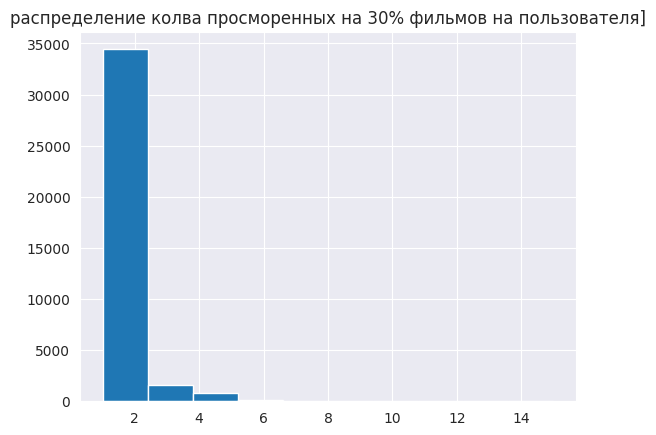

In [ ]:
plt.hist(val_recs['len'])
plt.title('—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–≤–∞ –ø—Ä–æ—Å–º–æ—Ä–µ–Ω–Ω—ã—Ö –Ω–∞ 30% —Ñ–∏–ª—å–º–æ–≤ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è]')
plt.show()

In [ ]:
val_recs['len'].value_counts()

1     29058
2      5374
3      1568
4       537
5       234
6        93
7        50
8        29
9        21
10        8
12        4
11        2
15        1
14        1
13        1
Name: len, dtype: int64

In [ ]:
test_part['len'] = test_part['ground_truth'].apply(lambda x: len(x))
print('—Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö —Ñ–∏–ª—å–º–æ–≤ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –≤ —Ç–µ—Å—Ç–µ', np.mean(test_part['len']))

—Å—Ä–µ–¥–Ω–µ–µ –∫–æ–ª–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö —Ñ–∏–ª—å–º–æ–≤ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –≤ —Ç–µ—Å—Ç–µ 4.907879955063393


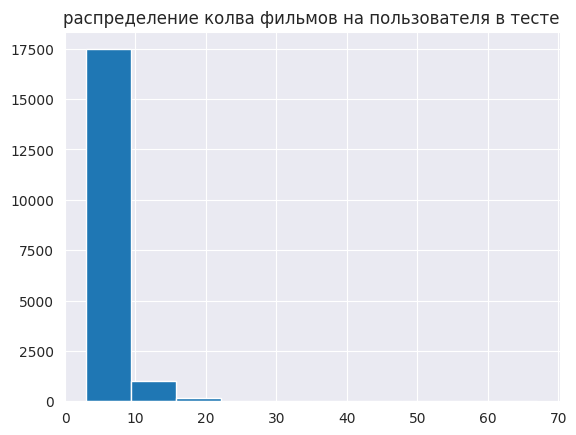

In [ ]:
plt.hist(test_part['len'])
plt.title('—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –∫–æ–ª–≤–∞ —Ñ–∏–ª—å–º–æ–≤ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è –≤ —Ç–µ—Å—Ç–µ')
plt.show()

In [ ]:
test_part['len'].value_counts()

3     7630
4     4009
5     2356
6     1476
7      923
8      637
9      435
10     313
11     221
12     164
13     117
14      96
15      78
16      44
17      38
18      27
19      24
21      17
22      17
20      11
23      10
24       7
25       4
40       4
29       4
26       4
34       3
27       3
28       2
41       2
31       2
38       2
56       2
36       1
46       1
67       1
39       1
30       1
43       1
35       1
33       1
32       1
42       1
50       1
Name: len, dtype: int64

In [ ]:
len(val_recs), len(test_part)

(36981, 18693)

–¥–∞–Ω–Ω—ã–µ –º—è–≥–∫–æ –≥–æ–≤–æ—Ä—è –Ω–µ —Å–æ–æ—Ç–Ω–æ—Å—è—Ç—Å—è, –≤ —Ç–µ—Å—Ç–µ —Å–æ–±—Ä–∞–Ω—ã–µ –∫–∞–∫–∏–µ-—Ç–æ —Å—É–ø–µ—Ä –∫–∏–Ω–æ–º–∞–Ω—ã –∫–æ—Ç–æ—Ä—ã–µ —É—Å–ø–µ–≤–∞—é—Ç –∑–∞ –Ω–µ–¥–µ–ª—é –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å 5 —Ñ–∏–ª—å–º–æ–≤. –ø–æ–∫–∞–∂–∏—Ç–µ –º–Ω–µ —Ç–∞–∫–∏—Ö –ª—é–¥–µ–π, –∫–æ—Ç–æ—Ä—ã–µ —Ä–∞–±–æ—Ç–∞—é—Ç –∏ —É—á–∞—Ç—Å—è 24/7...  –∏–∑-–∑–∞ —Ç–∞–∫–æ–π –Ω–µ—Å–æ—Å—Ç—ã–∫–æ–≤–∫–∏ –±—É–¥–µ—Ç –ø—Ä–æ–±–ª–µ–º–∞—Ç–∏—á–Ω–æ —Å—á–∏—Ç–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏
–ø—Ä–∏ —ç—Ç–æ–º —Å–∏–ª—å–Ω–æ —Ä–∞—Å—à–∏—Ä—è—Ç—å –≤–∞–ª–∏–¥–∞—Ü–∏—é –Ω–µ —Ö–æ—á–µ—Ç—Å—è, —á—Ç–æ–±—ã –æ–±—É—á–∞—Ç—å—Å—è –Ω–∞ –±–æ–ª–µ–µ –Ω–æ–≤—ã—Ö –¥–∞–Ω–Ω—ã—Ö

—è –≤—Å–µ-—Ç–∞–∫–∏ –ø–æ–∑–≤–æ–ª—é —Å–µ–±–µ —Å–¥–µ–ª–∞—Ç—å –≤–∞–ª–∏–¥–∞—Ü–∏—é –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ –ø–æ—Ö–æ–∂–µ–π –ø–æ —Å—Ç—Ä—É–∫—Ç—É—Ä–µ –Ω–∞ —Ç–µ—Å—Ç, —Ç–∞–∫ –∫–∞–∫ –≤ —Ä–µ–∞–ª—å–Ω–æ–π –∂–∏–∑–Ω–∏ —è –±—ã —Å–º–æ–≥–ª–∞ –ø–æ —Å–≤–æ–∏–º –ø—Ä–∞–≤–∏–ª–∞–º —Ä–∞–∑–¥–µ–ª–∏—Ç—å –¥–∞–Ω–Ω—ã–µ –Ω–∞ —Ç—Ä–µ–π–Ω, –≤–∞–ª–∏–¥–∞—Ü–∏—é –∏ —Ç–µ—Å—Ç –¥–ª—è –ø–æ–¥—Å—á–µ—Ç–∞ –æ—Ñ—Ñ–ª–∞–π–Ω –º–µ—Ç—Ä–∏–∫

In [ ]:
val_recs = val_data[val_data['watched_pct'] > 0].groupby('user_id')['item_id'].apply(list).reset_index(name='ground_truth')
val_recs['len'] = val_recs['ground_truth'].apply(lambda x: len(x))
val_recs = val_recs.loc[val_recs['len'] >= 3]
print('—Å—Ä–µ–¥–Ω–µ–µ –æ—Ç–∫—Ä—ã—Ç—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏ —Ñ–∏–ª—å–º–æ–≤', np.mean(val_recs['len']))
print('–∫–æ–ª-–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π', len(val_recs))

—Å—Ä–µ–¥–Ω–µ–µ –æ—Ç–∫—Ä—ã—Ç—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏ —Ñ–∏–ª—å–º–æ–≤ 3.9551812302601896
–∫–æ–ª-–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π 6649


In [ ]:
val_recs['len'].value_counts()

3     3726
4     1483
5      647
6      345
7      177
8      110
9       60
10      32
11      22
12      16
13      13
15       6
14       5
17       4
24       1
16       1
33       1
Name: len, dtype: int64

–≤–∞–ª–∏–¥–∞—Ü–∏—è –Ω–µ –∏–¥–µ–∞–ª—å–Ω–∞, –Ω–æ –≤ —Ü–µ–ª–æ–º, –Ω–µ –≤–∏–∂—É –Ω–∏—á–µ–≥–æ —Å–∏–ª—å–Ω–æ —É–∂–∞—Å–Ω–æ–≥–æ, —á—Ç–æ –≤ –Ω–µ–π –º–µ–Ω—å—à–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ —Å—Ä–µ–¥–Ω—è—è –¥–ª–∏–Ω–∞ —á—É—Ç –º–µ–Ω—å—à–µ. –∏ —è —Ä–µ—à–∏–ª–∞ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å —Ç–æ–ª—å–∫–æ —Ç–µ —Ñ–∏–ª—å–º—ã, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–∏ –ø–æ—Å–º–æ—Ç—Ä–µ–ª–∏ —Ö–æ—Ç—è –±—ã —á—É—Ç—å —á—É—Ç—å

# EDA

### items df

In [ ]:
train_data

user_id  item_id last_watch_dt  total_dur  watched_pct
0         176549     9506    2021-05-11     4250.0         72.0
1         699317     1659    2021-05-29     8317.0        100.0
2         656683     7107    2021-05-09       10.0          0.0
3         864613     7638    2021-07-05    14483.0        100.0
4         964868     9506    2021-04-30     6725.0        100.0
...          ...      ...           ...        ...          ...
1224554   160336    15171    2021-07-17       17.0          0.0
1224555   207142    15297    2021-07-19    24915.0         88.0
1224556    63645    16373    2021-04-20    30964.0        100.0
1224558    32937    10954    2021-05-13       71.0          1.0
1224559   311112     4151    2021-07-06     1480.0         13.0

[1118121 rows x 5 columns]

In [ ]:
items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12067 entries, 0 to 12066
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       12067 non-null  int64  
 1   content_type  12067 non-null  object 
 2   title         12067 non-null  object 
 3   title_orig    9144 non-null   object 
 4   release_year  12019 non-null  float64
 5   genres        12067 non-null  object 
 6   countries     12051 non-null  object 
 7   for_kids      528 non-null    float64
 8   age_rating    12066 non-null  float64
 9   studios       749 non-null    object 
 10  directors     11160 non-null  object 
 11  actors        10268 non-null  object 
 12  description   12066 non-null  object 
 13  keywords      11705 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.3+ MB


–ø–æ—Å–º–æ—Ç—Ä–∏–º –∫–∞–∫–∞—è —Å–∏—Ç—É–∞—Ü–∏—è —Å –ø—É—Å—Ç—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏

In [ ]:
items_df.isna().sum()

item_id             0
content_type        0
title               0
title_orig       2923
release_year       48
genres              0
countries          16
for_kids        11539
age_rating          1
studios         11318
directors         907
actors           1799
description         1
keywords          362
dtype: int64

In [ ]:
items_df.loc[items_df['release_year'].isna()].head()

item_id content_type                              title title_orig  \
439     11532       series                         –ô–æ–≥–∞ —Å—Ç–∞—Ä—Ç        NaN   
1141     7724       series              –ô–æ–≥–∞—Ç–µ—Ä–∞–ø–∏—è –¥–ª—è —Å–ø–∏–Ω—ã        NaN   
1225     5214         film                –Æ–Ω–∞–π—Ç–µ–¥ –°–∏—Ç–∏ - –¢—ç–≥—É        NaN   
1488    16014       series  –†–∞–±–æ—Ç–∞ —Å —Ç–µ–ª–æ–º –¥–ª—è –º–æ–ª–æ–¥–æ—Å—Ç–∏ –ª–∏—Ü–∞        NaN   
1567     3910       series                      –î–≤–æ–π–Ω–∞—è —Å—É—à–∫–∞        NaN   

      release_year         genres countries  for_kids  age_rating studios  \
439            NaN         —Ñ–∏—Ç–Ω–µ—Å    –†–æ—Å—Å–∏—è       NaN         6.0     NaN   
1141           NaN         —Ñ–∏—Ç–Ω–µ—Å    –†–æ—Å—Å–∏—è       NaN         6.0     NaN   
1225           NaN         —Ñ—É—Ç–±–æ–ª    –†–æ—Å—Å–∏—è       NaN         0.0     NaN   
1488           NaN  —Ñ–∏—Ç–Ω–µ—Å, —Å–ø–æ—Ä—Ç       NaN       NaN         6.0     NaN   
1567           NaN         —Ñ–∏—Ç–Ω–µ—Å    –†–æ—Å—Å–∏—è       NaN         6.0     NaN   

     directors actors                                        description  \
439        NaN    NaN  –ü—Ä–æ–≥—Ä–∞–º–º–∞ –æ—Ç Motify –ø–æ–¥–æ–π–¥–µ—Ç –¥–ª—è –ª—é–±–æ–≥–æ —É—Ä–æ–≤–Ω—è...   
1141       NaN    NaN  –ö–æ–º–ø–ª–µ–∫—Å –æ—Ç Motify –ø—Ä–µ–¥–Ω–∞–∑–Ω–∞—á–µ–Ω –¥–ª—è –≤—Å–µ—Ö –±–µ–∑ –æ...   
1225       NaN    NaN  –õ–∏–≥–∞ —á–µ–º–ø–∏–æ–Ω–æ–≤ AFC - —ç—Ç–æ –≥–ª–∞–≤–Ω—ã–π –∫–ª—É–±–Ω—ã–π —Ñ—É—Ç–±–æ...   
1488       NaN    NaN  –ü—Ä–æ–≥—Ä–∞–º–º–∞ –æ—Ç Motify –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–∞ –Ω–∞ —Ä–∞–±–æ—Ç—É —Å —Ç–µ–ª...   
1567       NaN    NaN  –û–±—â–µ—É–∫—Ä–µ–ø–ª—è—é—â–∏–π –∫–æ–º–ø–ª–µ–∫—Å –æ—Ç Motify –Ω–∞ –≤—Å–µ –≥—Ä—É–ø...   

                                               keywords  
439   –ô–æ–≥–∞, 2020, –†–æ—Å—Å–∏—è, —Å–ø–æ—Ä—Ç-—Ñ–∏—Ç–Ω–µ—Å, —Å–ø–æ—Ä—Ç-—Ç—Ä–µ–Ω–µ—Ä...  
1141  –ô–æ–≥–∞—Ç–µ—Ä–∞–ø–∏—è, –¥–ª—è, —Å–ø–∏–Ω—ã, 2021, –†–æ—Å—Å–∏—è, —Å–ø–æ—Ä—Ç-—Ñ...  
1225  –Æ–Ω–∞–π—Ç–µ–¥, –°–∏—Ç–∏, -, –¢—ç–≥—É, –†–æ—Å—Å–∏—è, —Å–ø–æ—Ä—Ç-—Ñ–∏—Ç–Ω–µ—Å, ...  
1488                –†–∞–±–æ—Ç–∞, —Ç–µ–ª–æ–º, –¥–ª—è, –º–æ–ª–æ–¥–æ—Å—Ç–∏, –ª–∏—Ü–∞  
1567  –î–≤–æ–π–Ω–∞—è, —Å—É—à–∫–∞, –†–æ—Å—Å–∏—è, —Å–ø–æ—Ä—Ç-—Ñ–∏—Ç–Ω–µ—Å, —Å–ø–æ—Ä—Ç-—Ç—Ä...

In [ ]:
print('–∫–æ–ª–≤–æ –∞–π—Ç–µ–º–æ–≤ —É –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –¥–∞—Ç—ã –≤—ã–ø—É—Å–∫–∞', len(items_df.loc[items_df['release_year'].isna()]))
print('–∫–æ–ª–≤–æ –∞–π—Ç–µ–º–æ–≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ñ–∏—Ç–Ω–µ—Å —É –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –¥–∞—Ç—ã –≤—ã–ø—É—Å–∫–∞', len(items_df.loc[(items_df['release_year'].isna()) & (items_df['genres'] == '—Ñ–∏—Ç–Ω–µ—Å')]))
print('–∫–æ–ª–≤–æ –∞–π—Ç–µ–º–æ–≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ñ–∏—Ç–Ω–µ—Å', len(items_df.loc[items_df['genres'] == '—Ñ–∏—Ç–Ω–µ—Å']))


–∫–æ–ª–≤–æ –∞–π—Ç–µ–º–æ–≤ —É –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –¥–∞—Ç—ã –≤—ã–ø—É—Å–∫–∞ 48
–∫–æ–ª–≤–æ –∞–π—Ç–µ–º–æ–≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ñ–∏—Ç–Ω–µ—Å —É –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –¥–∞—Ç—ã –≤—ã–ø—É—Å–∫–∞ 27
–∫–æ–ª–≤–æ –∞–π—Ç–µ–º–æ–≤ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Ñ–∏—Ç–Ω–µ—Å 165


–ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –ø—Ä–∏–∑–Ω–∞–∫ `for kids`

In [ ]:
items_df['for_kids'].value_counts()

0.0    422
1.0    106
Name: for_kids, dtype: int64

In [ ]:
items_df.loc[items_df['for_kids'] == 1]

item_id content_type                              title  \
303       7752       series       –ü—Ä–∏–∫–ª—é—á–µ–Ω–∏—è –ü–∞—Ä–æ–≤–æ–∑–∏–∫–∞ –®–æ–Ω–Ω–∏   
447       1698       series                            –ë—É–º–∞–∂–∫–∏   
721       5767       series              –ù–∞–π–¥–∏ —Å–∫—Ä—ã—Ç—ã–µ –æ–±—ä–µ–∫—Ç—ã   
778       4462         film                           –î–∏–Ω–æ–º–∞–º–∞   
864      14979       series                 –°–º–µ—à–∞—Ä–∏–∫–∏: –ü–∏–Ω-–∫–æ–¥   
...        ...          ...                                ...   
11378     7279       series  –°–∏–Ω–∏–π —Ç—Ä–∞–∫—Ç–æ—Ä –Ω–∞ –¥–µ—Ç—Å–∫–æ–π –ø–ª–æ—â–∞–¥–∫–µ   
11469     7935       series                      –ú–∞—à–∏–Ω—ã –æ–¥—ë–∂–∫–∏   
11568     3048         film                    –ü–ª—é—à–µ–≤—ã–π –º–æ–Ω—Å—Ç—Ä   
11621     2166         film             –í–æ—Ä–æ–±—å–∏—à–∫–∞-—Ö–≤–∞—Å—Ç—É–Ω–∏—à–∫–∞   
11634    13823       series                      –°–∏–Ω–∏–π —Ç—Ä–∞–∫—Ç–æ—Ä   

                             title_orig  release_year  \
303                                 NaN        2019.0   
447                                 NaN        2015.0   
721                                 NaN        2018.0   
778                                 NaN        2013.0   
864                                 NaN        2012.0   
...                                 ...           ...   
11378                               NaN        2019.0   
11469                               NaN        2015.0   
11568  Lino: Uma Aventura de Sete Vidas        2018.0   
11621                               NaN        1981.0   
11634                               NaN        2016.0   

                                               genres countries  for_kids  \
303                      —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    –†–æ—Å—Å–∏—è       1.0   
447            —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, —Ä–∞–∑–≤–∏—Ç–∏–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    –†–æ—Å—Å–∏—è       1.0   
721            —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, —Ä–∞–∑–≤–∏—Ç–∏–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    –†–æ—Å—Å–∏—è       1.0   
778                      —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    –†–æ—Å—Å–∏—è       1.0   
864            —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, —Ä–∞–∑–≤–∏—Ç–∏–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    –†–æ—Å—Å–∏—è       1.0   
...                                               ...       ...       ...   
11378          —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, —Ä–∞–∑–≤–∏—Ç–∏–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    –†–æ—Å—Å–∏—è       1.0   
11469                    —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    –†–æ—Å—Å–∏—è       1.0   
11568          —Å–µ–º–µ–π–Ω–æ–µ, —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    –†–æ—Å—Å–∏—è       1.0   
11621                    —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    –†–æ—Å—Å–∏—è       1.0   
11634  –º—É–∑—ã–∫–∞, —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, —Ä–∞–∑–≤–∏—Ç–∏–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    –†–æ—Å—Å–∏—è       1.0   

       age_rating studios                                          directors  \
303           0.0     NaN                                                NaN   
447           0.0     NaN  –í–ª–∞–¥–∏—Å–ª–∞–≤ –ë–∞–π—Ä–∞–º–≥—É–ª–æ–≤, –ê–ª–µ–∫—Å–µ–π –ú–∏—Ä–æ–Ω–æ–≤, –ê—Ä—Ç—É—Ä ...   
721           0.0     NaN                                     –ê—Ä—Ç—É—Ä –ú–µ—Ä–∫—É–ª–æ–≤   
778           0.0     NaN                            –î–∂–æ–Ω –ö–∞—Ñ–∫–∞, –ß—Ö–≤–µ –Æ–Ω-—Å–æ–∫   
864           6.0     NaN  –°–≤–µ—Ç–ª–∞–Ω–∞ –ú–∞—Ä–¥–∞–≥–æ–ª–∏–º–æ–≤–∞, –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–∞ –ê–≤–µ—Ä—å—è–Ω–æ–≤–∞,...   
...           ...     ...                                                ...   
11378         0.0     NaN                                  –ê—Ä—Ç—É—Ä –î–Ω–µ–ø—Ä–æ–≤—Å–∫–∏–π   
11469         0.0     NaN                                   –î–º–∏—Ç—Ä–∏–π –ì–æ—Ä–±—É–Ω–æ–≤   
11568         6.0     NaN                                      –†–∞—Ñ–∞—ç–ª—å –†–∏–±–∞—Å   
11621         0.0     NaN                                –ê–∫–º–∞–ª—å –ê–∫–±–∞—Ä—Ö–æ–¥–∂–∞–µ–≤   
11634         0

In [ ]:
items_df.loc[items_df['for_kids'] == 0]

item_id content_type                   title  title_orig  release_year  \
57       10871         film                   –ñ–µ–Ω—ë–∫         NaN        2017.0   
79        1575       series  –û—Ö–æ—Ç–Ω–∏–∫–∏ –∑–∞ –∏—Å–∫—É—Å—Å—Ç–≤–æ–º      Allmen        2017.0   
80       13884       series              –°—É–ø–µ—Ä –ê–π–∑–∞         NaN        2020.0   
143       5592         film      –ù–∞ –¥–∞–ª—å–Ω–∏—Ö —Ä—É–±–µ–∂–∞—Ö         NaN        2021.0   
159       7391       series                 –ò–≥—Ä—É—à–∫–∏         NaN        2010.0   
...        ...          ...                     ...         ...           ...   
12051     3060         film                    –ö–∏—Ä–µ         NaN        2019.0   
12063     2367       series                 –ù–∞–¥–µ–∂–¥–∞         NaN        2020.0   
12064    10632       series                  –°–≥–æ–≤–æ—Ä      Hassel        2017.0   
12065     4538       series            –°—Ä–µ–¥–∏ –∫–∞–º–Ω–µ–π  Darklands         2019.0   
12066     3206       series                    –ì–æ—à–∞         NaN        2019.0   

                          genres countries  for_kids  age_rating studios  \
57                         –¥—Ä–∞–º—ã    –†–æ—Å—Å–∏—è       0.0        12.0     NaN   
79           –∫—Ä–∏–º–∏–Ω–∞–ª, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã    –†–æ—Å—Å–∏—è       0.0        18.0     NaN   
80                       —Ç–æ–∫-—à–æ—É    –†–æ—Å—Å–∏—è       0.0        16.0     NaN   
143                        –¥—Ä–∞–º—ã    –†–æ—Å—Å–∏—è       0.0        18.0     NaN   
159                      –∫–æ–º–µ–¥–∏–∏    –†–æ—Å—Å–∏—è       0.0        16.0     NaN   
...                          ...       ...       ...         ...     ...   
12051                    –∫–æ–º–µ–¥–∏–∏    –†–æ—Å—Å–∏—è       0.0        12.0     NaN   
12063             –¥—Ä–∞–º—ã, –±–æ–µ–≤–∏–∫–∏    –†–æ—Å—Å–∏—è       0.0        18.0     NaN   
12064  –¥—Ä–∞–º—ã, —Ç—Ä–∏–ª–ª–µ—Ä—ã, –∫—Ä–∏–º–∏–Ω–∞–ª    –†–æ—Å—Å–∏—è       0.0        18.0     NaN   
12065     –¥—Ä–∞–º—ã, —Å–ø–æ—Ä—Ç, –∫—Ä–∏–º–∏–Ω–∞–ª    –†–æ—Å—Å–∏—è       0.0        18.0     NaN   
12066                    –∫–æ–º–µ–¥–∏–∏    –†–æ—Å—Å–∏—è       0.0        16.0     NaN   

                                   directors  \
57                         –†–∞—É—à–∞–Ω–∏—è –†–∞—Ö–∏–º–æ–≤–∞   
79                              –¢–æ–º–∞—Å –ë–µ—Ä–≥–µ—Ä   
80                                       NaN   
143                            –ú–∞–∫—Å–∏–º –î–∞—à–∫–∏–Ω   
159             –†–æ–º–∞–Ω –§–æ–∫–∏–Ω, –ò—Ä–∏–Ω–∞ –í–∞—Å–∏–ª—å–µ–≤–∞   
...                                      ...   
12051       –†—É—Å—Ç–∞–º –†–∞—à–∏—Ç–æ–≤, –ò–ª—å—Å–µ—è—Ä –î–∞–º–∞—Å–∫–∏–Ω   
12063                         –ï–ª–µ–Ω–∞ –•–∞–∑–∞–Ω–æ–≤–∞   
12064  –≠—à—Ä–µ—Ñ –†–µ–π–±—Ä—É–∫, –ê–º–∏—Ä –ö–∞–º–¥–∏–Ω, –≠—Ä–∏–∫ –≠–≥–µ—Ä   
12065          –ú–∞—Ä–∫ –û‚Äô–ö–æ–Ω–Ω–æ—Ä, –ö–æ–Ω–æ—Ä –ú–∞–∫–ú–∞—Ö–æ–Ω   
12066                         –ú–∏—Ö–∞–∏–ª –ú–∏—Ä–æ–Ω–æ–≤   

                                                  actors  \
57     –°–µ—Ä–≥–µ–π –®–Ω—ã—Ä–µ–≤, –ù–∏–∫–∞ –ó–¥–æ—Ä–∏–∫, –ï–≤–≥–µ–Ω–∏–π –ü–æ–ø–æ–≤–∏—á, –ö...   
79     –•–∞–π–Ω–æ –§–µ—Ä—Ö, –°–∞–º—É—ç–ª—å –§–∏–Ω—Ü–∏, –ê–Ω–¥—Ä–µ–∞ –û—à–≤–∞—Ä—Ç, –ò–∑–∞–±...   
80                                        –ê–π–∑–∞ –î–æ–ª–º–∞—Ç–æ–≤–∞   
143    –í–∏–∫—Ç–æ—Ä–∏—è –¢–æ–ª—Å—Ç–æ–≥–∞–Ω–æ–≤–∞, –°–µ—Ä–≥–µ–π –®–Ω—ã—Ä–µ–≤, –ê–ª–µ–∫—Å–∞–Ω–¥...   
159    –ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –ö–æ–ø–∞–Ω–æ–≤–∞, –í—Å–µ–≤–æ–ª–æ–¥ –ë–æ–ª–¥–∏–Ω, –†–æ–º–∞–Ω –ü–æ–ª...   
...                                                  ...   
12051  –ö–∞–º–∏–ª—å –õ–∞—Ä–∏–Ω, –§–∞–Ω–∏—Å –ó–∏–≥–∞–Ω—à–∏–Ω, –ì—É–∑–µ–ª—å –°–∏–±–≥–∞—Ç—É–ª–ª...   
12063  –í–∏–∫—Ç–æ—Ä–∏—è –ò—Å–∞–∫–æ–≤–∞, –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –ö—É–∑—å–º–∏–Ω, –ê–ª–µ–∫—Å–µ–π –ú...   
12064  –û–ª–∞ –†–∞–ø–∞—Å, –ê–ª–∏–µ—Ç—Ç –û—Ñ–µ–π–º, –£–∏–ª—å–º–∞ –õ–∏–¥–µ–Ω, –®–∞–Ω—Ç–∏ –†...   
12065  –î—ç–π–Ω –£–∞–π—Ç –û‚Äô–•–∞—Ä–∞, –¢–æ–º–∞—Å –ö—ç–π–Ω-–ë–∏—Ä–Ω, –î–∂—É–¥–∏—Ç –†–æ–¥–¥...   
12066                 –ú–∫—Ä—Ç—ã—á –ê—Ä–∑—É–º–∞–Ω—è–Ω, –í–∏–∫—Ç–æ—Ä–∏—è –†—É–Ω—Ü–æ–≤–∞   

                                             des

–µ—Å—Ç—å –∏–¥–µ—è, —á—Ç–æ –¥–ª—è –Ω–∞–Ω–æ–≤ –º–æ–∂–Ω–æ –≤—ã—Å—Ç–∞–≤–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ, –æ—Å–Ω–æ–≤—ã–≤–∞—è—Å—å –Ω–∞ `age_rating` –∏ `genres`

In [ ]:
for_kids = items_df.loc[items_df['for_kids'] == 1]
not_for_kids = items_df.loc[items_df['for_kids'] == 0]

In [ ]:
print('age rating –¥–ª—è –¥–µ—Ç–µ–π')
print(for_kids['age_rating'].value_counts())

age rating –¥–ª—è –¥–µ—Ç–µ–π
0.0     79
6.0     26
12.0     1
Name: age_rating, dtype: int64


In [ ]:
print('age rating –Ω–µ –¥–ª—è –¥–µ—Ç–µ–π')
print(not_for_kids['age_rating'].value_counts())

age rating –Ω–µ –¥–ª—è –¥–µ—Ç–µ–π
16.0    199
18.0    128
12.0     81
6.0      13
0.0       1
Name: age_rating, dtype: int64


In [ ]:
for_kids['genres'].unique()

array(['—Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã',
       '—Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, —Ä–∞–∑–≤–∏—Ç–∏–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã', '—Ä–∞–∑–≤–∏—Ç–∏–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã',
       '–º—É–∑—ã–∫–∞, —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã',
       '—Å–µ–º–µ–π–Ω–æ–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –∫–æ–º–µ–¥–∏–∏',
       '–º—É–∑—ã–∫–∞, —Ä–∞–∑–≤–∏—Ç–∏–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã',
       '–º—É–∑—ã–∫–∞, —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, –¥–ª—è –¥–µ—Ç–µ–π',
       '—Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, –¥–ª—è –¥–µ—Ç–µ–π, –¥–æ–∫—É–º–µ–Ω—Ç–∞–ª—å–Ω–æ–µ',
       '–º—É–∑—ã–∫–∞, —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, —Ä–∞–∑–≤–∏—Ç–∏–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã',
       '—Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, –¥–ª—è –¥–µ—Ç–µ–π, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã',
       '—Å–µ–º–µ–π–Ω–æ–µ, —Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã',
       '—Ä–∞–∑–≤–ª–µ–∫–∞—Ç–µ–ª—å–Ω—ã–µ, —Ä–∞–∑–≤–∏—Ç–∏–µ, –¥–ª—è –¥–µ—Ç–µ–π, –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã',
       '—Å–µ–º–µ–π–Ω–æ–µ, –¥–ª—è –¥–µ—Ç–µ–π

In [ ]:
not_for_kids['genres'].unique()

array(['–¥—Ä–∞–º—ã', '–∫—Ä–∏–º–∏–Ω–∞–ª, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã', '—Ç–æ–∫-—à–æ—É', '–∫–æ–º–µ–¥–∏–∏',
       '—Å–ø–æ—Ä—Ç, –¥–æ–∫—É–º–µ–Ω—Ç–∞–ª—å–Ω–æ–µ', '–¥—Ä–∞–º—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã', '—Å–µ–º–µ–π–Ω–æ–µ, –∫–æ–º–µ–¥–∏–∏',
       '–¥—Ä–∞–º—ã, —Ç—Ä–∏–ª–ª–µ—Ä—ã, –∫—Ä–∏–º–∏–Ω–∞–ª', '–º—É–∑—ã–∫–∞–ª—å–Ω—ã–µ', '–¥–æ–∫—É–º–µ–Ω—Ç–∞–ª—å–Ω–æ–µ',
       '–º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã', '–¥—Ä–∞–º—ã, –∫–æ–º–µ–¥–∏–∏', '–¥–µ—Ç–µ–∫—Ç–∏–≤—ã', '–¥—Ä–∞–º—ã, –∫—Ä–∏–º–∏–Ω–∞–ª',
       '–¥—Ä–∞–º—ã, —Ç—Ä–∏–ª–ª–µ—Ä—ã, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã', '—Å–µ–º–µ–π–Ω–æ–µ, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è', '—Ç—Ä–∏–ª–ª–µ—Ä—ã',
       '–º–æ–ª–æ–¥–µ–∂–Ω—ã–µ, –∫–æ–º–µ–¥–∏–∏', '–º–µ–ª–æ–¥—Ä–∞–º—ã',
       '–¥—Ä–∞–º—ã, –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ, –±–∏–æ–≥—Ä–∞—Ñ–∏—è', '–¥—Ä–∞–º—ã, —Ç—Ä–∏–ª–ª–µ—Ä—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã',
       '–ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –º–µ–ª–æ–¥—Ä–∞–º—ã', '—é–º–æ—Ä, —Å–µ–º–µ–π–Ω–æ–µ, –∫–æ–º–µ–¥–∏–∏',
       '–¥—Ä–∞–º—ã, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è', '–¥—Ä–∞–º—ã, –º–∏—Å—Ç–∏–∫–∞, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã',
       '–¥—Ä–∞–º—ã, –±–æ–µ–≤–∏–∫–∏', '–¥—Ä–∞–º

In [ ]:
len(for_kids), len(for_kids.loc[for_kids['genres'].str.contains('–º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã')])

(106, 100)

In [ ]:
len(not_for_kids), len(not_for_kids.loc[not_for_kids['genres'].str.contains('–º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã')])

(422, 2)

In [ ]:
not_for_kids.loc[not_for_kids['genres'].str.contains('–º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã')]

item_id content_type                        title title_orig  \
775      9584         film  –ù–æ—Å, –∏–ª–∏ –ó–∞–≥–æ–≤–æ—Ä ¬´–Ω–µ —Ç–∞–∫–∏—Ö¬ª        NaN   
7027       70       series                –ú—É–ª—å—Ç ¬´–ö—É—Ö–Ω—è¬ª        NaN   

      release_year                genres countries  for_kids  age_rating  \
775         2020.0           –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã    –†–æ—Å—Å–∏—è       0.0        16.0   
7027        2017.0  –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã, –∫–æ–º–µ–¥–∏–∏    –†–æ—Å—Å–∏—è       0.0        12.0   

     studios                                          directors  \
775      NaN                                –ê–Ω–¥—Ä–µ–π  –•—Ä–∂–∞–Ω–æ–≤—Å–∫–∏–π   
7027     NaN  –î–º–∏—Ç—Ä–∏–π –û–±—Ä–∏–∑–∞–Ω, –í–∞–ª–µ—Ä–∏—è –ú–∞–ª–∫–æ–≤–∞, –í—è—á–µ—Å–ª–∞–≤ –õ–µ–≤...   

                                                 actors  \
775                                                 NaN   
7027  –î–º–∏—Ç—Ä–∏–π –ù–∞–∑–∞—Ä–æ–≤, –ú–∞—Ä–∫ –ë–æ–≥–∞—Ç—ã—Ä–µ–≤, –î–º–∏—Ç—Ä–∏–π –ù–∞–≥–∏–µ...   

                                            description  \
775   –ê–≤–∞–Ω–≥–∞—Ä–¥–Ω–∞—è, —Å–Ω–æ–≤–∏–¥—á–µ—Å–∫–∞—è —Ä–∞–±–æ—Ç–∞ –ê–Ω–¥—Ä–µ—è –•—Ä–∂–∞–Ω–æ...   
7027  –ó–Ω–∞–∫–æ–º—ã–µ –≥–µ—Ä–æ–∏ —Å–µ—Ä–∏–∞–ª–∞ ¬´–ö—É—Ö–Ω—è¬ª, –Ω–æ —Ç–µ–ø–µ—Ä—å –≤ –Ω–∞...   

                                        keywords  
775   –ù–æ—Å, –∏–ª–∏, –ó–∞–≥–æ–≤–æ—Ä, –Ω–µ, —Ç–∞–∫–∏—Ö, 2020, –†–æ—Å—Å–∏—è  
7027                  –ú—É–ª—å—Ç, –ö—É—Ö–Ω—è, 2017, –†–æ—Å—Å–∏—è

In [ ]:
items_df.loc[items_df['genres'].str.contains('–¥–ª—è –¥–µ—Ç–µ–π'), 'age_rating'].value_counts()

0.0     307
6.0     165
12.0     49
16.0      1
Name: age_rating, dtype: int64

In [ ]:
items_df.loc[(items_df['genres'].str.contains('–¥–ª—è –¥–µ—Ç–µ–π')) & (items_df['age_rating'] == 16)]

item_id content_type                     title            title_orig  \
11922     6502         film  –†–æ–±–æ—Å–∞–ø–∏–µ–Ω: –ü–µ—Ä–µ–∑–∞–≥—Ä—É–∑–∫–∞  Robosapien: Rebooted   

       release_year                                             genres  \
11922        2013.0  —Ñ–∏–ª—å–º—ã, –¥–ª—è –¥–µ—Ç–µ–π, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –¥—Ä–∞–º—ã, –∑–∞—Ä—É–±–µ–∂...   

      countries  for_kids  age_rating studios      directors  \
11922       –°–®–ê       NaN        16.0     NaN  –®–æ–Ω –ú–∞–∫–ù–∞–º–∞—Ä–∞   

                                                  actors  \
11922  –ë–∞–¥–¥–∏ –õ—å—é–∏—Å, –ë–∏–ª–ª–∏ –°–ª–æ—Ç–µ—Ä, –ë–æ–±–±–∏ –ö–æ—É–ª–º—ç–Ω, –î–∂–µ–π...   

                                             description  \
11922  –¢–∞–ª–∞–Ω—Ç–ª–∏–≤—ã–π –¥–æ–±—Ä—ã–π —É—á–µ–Ω—ã–π —Ä–∞–∑—Ä–∞–±–∞—Ç—ã–≤–∞–µ—Ç —Ä–æ–±–æ—Ç–æ...   

                                                keywords  
11922  –†–æ–±–æ—Å–∞–ø–∏–µ–Ω, –ü–µ—Ä–µ–∑–∞–≥—Ä—É–∑–∫–∞, 2013, –°–®–ê, –±–æ—Ä—å–±–∞, —Å...

–¥—É–º–∞—é –≤—Å–µ-—Ç–∞–∫–∏ 16+ –Ω–µ —Å—Ç–æ–∏—Ç –≤–∫–ª—é—á–∞—Ç—å –≤ –∫–∞—Ç–µ–≥–æ—Ä–∏—é "–¥–ª—è –¥–µ—Ç–µ–π"

In [ ]:
cond = ((items_df['for_kids'].isna()) & (items_df['genres'].str.contains('–º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã')) & (items_df['age_rating'] <= 12))
items_df.loc[cond, 'for_kids'] = 1

In [ ]:
cond = ((items_df['for_kids'].isna()) & (items_df['genres'].str.contains('–¥–ª—è –¥–µ—Ç–µ–π')) & (items_df['age_rating'] < 16))
items_df.loc[cond, 'for_kids'] = 1

In [ ]:
items_df['for_kids'].isna().sum()

10963

–ø–æ—Å–º–æ—Ç—Ä–∏–º, —á—Ç–æ –µ—â–µ –æ—Å—Ç–∞–ª–æ—Å—å

In [ ]:
cond = ((items_df['for_kids'].isna()) & (items_df['genres'].str.contains('–º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã')))
items_df.loc[cond]

item_id content_type                title title_orig  release_year  \
9366     14409       series               –ë–∏–ë–∞–ë—É        NaN        2017.0   
11872     6967       series  –§–∞–Ω—Ç–∞—Å—Ç–∏—á–µ—Å–∫–∏–µ –¥–µ—Ç–∏        NaN        2004.0   

                                                  genres countries  for_kids  \
9366   —Ä—É—Å—Å–∫–∏–µ, —Å–µ—Ä–∏–∞–ª—ã, –¥–ª—è –¥–µ—Ç–µ–π, —Ö–æ—á—É –≤—Å—ë –∑–Ω–∞—Ç—å, —Ä...    –†–æ—Å—Å–∏—è       NaN   
11872  –∞–Ω–∏–º–µ, —Å–µ—Ä–∏–∞–ª—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, —Ñ—ç–Ω—Ç–µ–∑...    –Ø–ø–æ–Ω–∏—è       NaN   

       age_rating studios        directors                         actors  \
9366          NaN     NaN              NaN                            NaN   
11872        16.0     NaN  –¢–∞–∫–∞—Å–∏ –ù–∞–∫–∞–º—É—Ä–∞  –î–∑—é–Ω–∫–æ –ú–∏–Ω–∞–≥–∞–≤–∞, –°–∏—Ö–æ –ö–≤–∞—Ä–∞–≥–∏   

                                             description  \
9366   –í —Å–∫–∞–∑–æ—á–Ω–æ–µ –ø–æ–¥–≤–æ–¥–Ω–æ–µ —Ü–∞—Ä—Å—Ç–≤–æ –ø—Ä–∏–≥–ª–∞—à–∞—é—Ç –º–∞–ª–µ–Ω...   
11872  –í–æ—Ç —É–∂–µ 500 –ª–µ—Ç –≤ –ï–≤—Ä–æ–ø–µ —Ç–æ —Ç—É—Ç, —Ç–æ —Ç–∞–º –ø–æ—è–≤–ª—è...   

                                                keywords  
9366   –¥—Ä—É–∑—å—è, –º–∞–≥–∏—è –∏ –≤–æ–ª—à–µ–±—Å—Ç–≤–æ, —Ä—ã–±—ã, –º–æ—Ä—è –∏ –æ–∫–µ–∞–Ω...  
11872  –§–∞–Ω—Ç–∞—Å—Ç–∏—á–µ—Å–∫–∏–µ, –¥–µ—Ç–∏, 2004, –Ø–ø–æ–Ω–∏—è, –¥—Ä—É–∑—å—è, –º–∞...

In [ ]:
# —É–±–∏—Ä–∞–µ–º –Ω–∞–Ω—ã –¥–ª—è –º—É–ª—å—Ç–∏–∫–∞ –±–∏–±–∞–±—É
items_df.loc[items_df['item_id'] == 14409, 'for_kids'] = 1
items_df.loc[items_df['item_id'] == 14409, 'age_rating'] = 0

In [ ]:
cond = ((items_df['for_kids'].isna()) & (items_df['age_rating'] <= 12))
items_df.loc[cond, 'genres'].unique()

array(['—Ä—É—Å—Å–∫–∏–µ, –º–µ–ª–æ–¥—Ä–∞–º—ã',
       '—Ä—É—Å—Å–∫–∏–µ, —Å–∫–∞–∑–∫–∏, —Ñ–∏–ª—å–º—ã-—Å–ø–µ–∫—Ç–∞–∫–ª–∏, –º—é–∑–∏–∫–ª—ã, —Å–µ–º–µ–π–Ω–æ–µ',
       '–º–µ–ª–æ–¥—Ä–∞–º—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –∫—Ä–∏–º–∏–Ω–∞–ª, –∫–æ–º–µ–¥–∏–∏', ...,
       '–ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, —Å–æ–≤–µ—Ç—Å–∫–∏–µ, –∫—Ä–∏–º–∏–Ω–∞–ª, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã',
       '–∞–Ω–∏–º–µ, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã, –¥—Ä–∞–º—ã, —Ç—Ä–∏–ª–ª–µ—Ä—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã, —Ñ—ç–Ω—Ç–µ–∑–∏, –∫–æ–º–µ–¥–∏–∏',
       '—Ñ—ç–Ω—Ç–µ–∑–∏, —Å–µ–º–µ–π–Ω–æ–µ, –∫—Ä–∏–º–∏–Ω–∞–ª, –∫–æ–º–µ–¥–∏–∏'], dtype=object)

–ø—Ä–æ–≤–µ—Ä–∏–º –µ—â–µ –∂–∞–Ω—Ä "—Å–µ–º–µ–π–Ω–æ–µ"

In [ ]:
cond = ((items_df['for_kids'].isna()) & (items_df['genres'].str.contains('—Å–µ–º–µ–π–Ω–æ–µ')) & (items_df['age_rating'] <= 12))
items_df.loc[cond, 'genres'].unique()

array(['—Ä—É—Å—Å–∫–∏–µ, —Å–∫–∞–∑–∫–∏, —Ñ–∏–ª—å–º—ã-—Å–ø–µ–∫—Ç–∞–∫–ª–∏, –º—é–∑–∏–∫–ª—ã, —Å–µ–º–µ–π–Ω–æ–µ',
       '—Å–µ–º–µ–π–Ω–æ–µ, –∫–æ–º–µ–¥–∏–∏', '–º–µ–ª–æ–¥—Ä–∞–º—ã, —Å–µ–º–µ–π–Ω–æ–µ, –∫–æ–º–µ–¥–∏–∏',
       '–ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, –±–æ–µ–≤–∏–∫–∏, —Å–µ–º–µ–π–Ω–æ–µ, –∫–æ–º–µ–¥–∏–∏',
       '–º—É–ª—å—Ç—Ñ–∏–ª—å–º, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, —Å–µ–º–µ–π–Ω–æ–µ, —Ñ—ç–Ω—Ç–µ–∑–∏',
       '—Ñ–∏–ª—å–º—ã, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, —Å–æ–≤–µ—Ç—Å–∫–∏–µ, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, —Å–µ–º–µ–π–Ω–æ–µ, –∫–æ–º–µ–¥–∏–∏',
       '—Å–µ–º–µ–π–Ω–æ–µ, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –¥–æ–∫—É–º–µ–Ω—Ç–∞–ª—å–Ω–æ–µ',
       '–ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –¥—Ä–∞–º—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –±–æ–µ–≤–∏–∫–∏, —Å–µ–º–µ–π–Ω–æ–µ, –∫–æ–º–µ–¥–∏–∏',
       '–ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –¥—Ä–∞–º—ã, —Å–µ–º–µ–π–Ω–æ–µ, —Ñ—ç–Ω—Ç–µ–∑–∏, –∫–æ–º–µ–¥–∏–∏', '—Å–µ–º–µ–π–Ω–æ–µ',
       '—Å–µ–º–µ–π–Ω–æ–µ, –≤–æ–µ–Ω–Ω—ã–µ, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –º–µ–ª–æ–¥—Ä–∞–º—ã',
       '—Å–µ–º–µ–π–Ω–æ–µ, —Ä—É—Å—Å

–∫–∞–∂–µ—Ç—Å—è —ç—Ç–æ –Ω–µ —Ç–∞–∫–æ–π –æ—á–µ–≤–∏–¥–Ω—ã–π —Ñ–∏–ª—å—Ç—Ä, –∫–∞–∫ –ø—Ä–µ–¥—ã–¥—É—â–∏–µ, –ø–æ—ç—Ç–æ–º—É –ø–æ–∫–∞ –Ω–µ –±—É–¥–µ–º –µ–≥–æ –ø—Ä–∏–º–µ–Ω—è—Ç—å

In [ ]:
cond = ((items_df['for_kids'].isna()) & ~((items_df['genres'].str.contains('—Å–µ–º–µ–π–Ω–æ–µ')) & (items_df['age_rating'] <= 12)))
items_df.loc[cond, 'for_kids'] = 0

In [ ]:
items_df['for_kids'].isna().sum()

502

–æ—Å—Ç–∞–ª—å–Ω—ã–µ –∫–∞—Ç–µ–≥–æ—Ä–∏–∏ —Å –Ω–∞–Ω–∞–º–∏ –æ—Å–æ–±–æ –Ω–µ –≤–æ—Å—Å—Ç–∞–≤–Ω–æ–≤–∏—à—å –±–µ–∑ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ–π –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏, –∏ –≤ —Ü–µ–ª–æ–º —ç—Ç–æ –ø–æ–∫–∞ –Ω–µ —Å–∞–º–∞—è –≤–∞–∂–Ω–∞—è —á–∞—Å—Ç—å

In [ ]:
items_df.head()

item_id content_type                                  title  \
0    10711         film                         –ü–æ–≥–æ–≤–æ—Ä–∏ —Å –Ω–µ–π   
1     2508         film                            –ì–æ–ª—ã–µ –ø–µ—Ä—Ü—ã   
2    10716         film                       –¢–∞–∫—Ç–∏—á–µ—Å–∫–∞—è —Å–∏–ª–∞   
3     7868         film                                 45 –ª–µ—Ç   
4    11114         film  –ü—Ä–∏–Ω—Ü–µ—Å—Å–∞ –õ–µ–±–µ–¥—å: –ü–∏—Ä–∞—Ç –∏–ª–∏ –ø—Ä–∏–Ω—Ü–µ—Å—Å–∞   

                                          title_orig  release_year  \
0                                     Hable con ella        2002.0   
1                                       Search Party        2014.0   
2                                     Tactical Force        2011.0   
3                                           45 Years        2015.0   
4  The Swan Princess: Princess Tomorrow, Pirate T...        2016.0   

                                              genres       countries  \
0            –¥—Ä–∞–º—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã         –ò—Å–ø–∞–Ω–∏—è   
1                   –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –∫–æ–º–µ–¥–∏–∏             –°–®–ê   
2   –∫—Ä–∏–º–∏–Ω–∞–ª, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, —Ç—Ä–∏–ª–ª–µ—Ä—ã, –±–æ–µ–≤–∏–∫–∏, –∫–æ–º–µ–¥–∏–∏          –ö–∞–Ω–∞–¥–∞   
3                       –¥—Ä–∞–º—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –º–µ–ª–æ–¥—Ä–∞–º—ã  –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è   
4  –¥–ª—è –¥–µ—Ç–µ–π, —Å–∫–∞–∑–∫–∏, –ø–æ–ª–Ω–æ–º–µ—Ç—Ä–∞–∂–Ω—ã–µ, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ,...             –°–®–ê   

   for_kids  age_rating        studios         directors  \
0       0.0        16.0            NaN  –ü–µ–¥—Ä–æ –ê–ª—å–º–æ–¥–æ–≤–∞—Ä   
1       0.0        16.0            NaN    –°–∫–æ—Ç –ê—Ä–º—Å—Ç—Ä–æ–Ω–≥   
2       0.0        16.0            NaN  –ê–¥–∞–º –ü. –ö–∞–ª—Ç—Ä–∞—Ä–æ   
3       0.0        16.0            NaN         –≠–Ω–¥—Ä—é –•—ç–π   
4       1.0         6.0  Sony Pictures        –†–∏—á–∞—Ä–¥ –†–∏—á   

                                              actors  \
0  –ê–¥–æ–ª—å—Ñ–æ –§–µ—Ä–Ω–∞–Ω–¥–µ—Å, –ê–Ω–∞ –§–µ—Ä–Ω–∞–Ω–¥–µ—Å, –î–∞—Ä–∏–æ –ì—Ä–∞–Ω–¥–∏...   
1  –ê–¥–∞–º –ü–∞–ª–ª–∏, –ë—Ä–∞–π–∞–Ω –•–∞—Å–∫–∏, –î–∂.–ë. –°–º—É–≤, –î–∂–µ–π—Å–æ–Ω ...   
2  –ê–¥—Ä–∏–∞–Ω –•–æ–ª–º—Å, –î–∞—Ä—Ä–µ–Ω –®–∞–ª–∞–≤–∏, –î–∂–µ—Ä—Ä–∏ –í–∞—Å—Å–µ—Ä–º–∞–Ω,...   
3  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä–∞ –†–∏–¥–¥–ª—Å—Ç–æ–Ω-–ë–∞—Ä—Ä–µ—Ç—Ç, –î–∂–µ—Ä–∞–ª—å–¥–∏–Ω –î–∂–µ–π–º...   
4  –ë—Ä–∞–π–∞–Ω –ù–∏—Å—Å–µ–Ω, –ì–∞—Ä–¥–Ω–µ—Ä –î–∂–∞—ç—Å, –ì—Ä–∞–Ω—Ç –î—É—Ä–∞–∑–∑–æ, –î...   

                                         description  \
0  –ú–µ–ª–æ–¥—Ä–∞–º–∞ –ª–µ–≥–µ–Ω–¥–∞—Ä–Ω–æ–≥–æ –ü–µ–¥—Ä–æ –ê–ª—å–º–æ–¥–æ–≤–∞—Ä–∞ ¬´–ü–æ–≥–æ...   
1  –£–º–æ—Ä–∏—Ç–µ–ª—å–Ω–∞—è —Å–æ–≤—Ä–µ–º–µ–Ω–Ω–∞—è –∫–æ–º–µ–¥–∏—è –Ω–∞ –ø–æ–ø—É–ª—è—Ä–Ω—É—é...   
2  –ü—Ä–æ—Ñ–µ—Å—Å–∏–æ–Ω–∞–ª—å–Ω—ã–π —Ä–µ—Å—Ç–ª–µ—Ä –°—Ç–∏–≤ –û—Å—Ç–∏–Ω (¬´–í—Å–µ –∏–ª–∏ ...   
3  –®–∞—Ä–ª–æ—Ç—Ç–∞ –†—ç–º–ø–ª–∏–Ω–≥, –¢–æ–º –ö–æ—Ä—Ç–Ω–∏, –î–∂–µ—Ä–∞–ª—å–¥–∏–Ω –î–∂–µ–π...   
4  –ê–Ω–∏–º–∞—Ü–∏–æ–Ω–Ω–∞—è —Å–∫–∞–∑–∫–∞ –æ –Ω–µ–ø–æ—Å–µ–¥–ª–∏–≤–æ–π –ø—Ä–∏–Ω—Ü–µ—Å—Å–µ –≠...   

                                            keywords  
0  –ü–æ–≥–æ–≤–æ—Ä–∏, –Ω–µ–π, 2002, –ò—Å–ø–∞–Ω–∏—è, –¥—Ä—É–∑—å—è, –ª—é–±–æ–≤—å, ...  
1  –ì–æ–ª—ã–µ, –ø–µ—Ä—Ü—ã, 2014, –°–®–ê, –¥—Ä—É–∑—å—è, —Å–≤–∞–¥—å–±—ã, –ø—Ä–µ–æ...  
2  –¢–∞–∫—Ç–∏—á–µ—Å–∫–∞—è, —Å–∏–ª–∞, 2011, –ö–∞–Ω–∞–¥–∞, –±–∞–Ω–¥–∏—Ç—ã, –≥–∞–Ω–≥...  
3  45, –ª–µ—Ç, 2015, –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è, –±—Ä–∞–∫, –∂–∏–∑–Ω—å, –ª—é...  
4  –ü—Ä–∏–Ω—Ü–µ—Å—Å–∞, –õ–µ–±–µ–¥—å, –ü–∏—Ä–∞—Ç, –∏–ª–∏, –ø—Ä–∏–Ω—Ü–µ—Å—Å–∞, 2016...

In [ ]:
# –≥–æ–¥–∞, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –ø—Ä–∏—Å—É—Ç—Å–≤—É–µ—Ç –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ —Ñ–∏–ª—å–º–æ–≤ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ
items_df['release_year'].value_counts().keys()[:10]

Float64Index([2020.0, 2019.0, 2018.0, 2017.0, 2016.0, 2015.0, 2014.0, 2013.0,
              2012.0, 2011.0],
             dtype='float64')

In [ ]:
# –∫–æ–ª–≤–æ —É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –∑–∞–ø–∏—Å–µ–π —Å—Ç—Ä–∞–Ω
print(items_df['countries'].nunique())

# —Ç–æ–ø —Å—Ç—Ä–∞–Ω
print()
print(items_df['countries'].value_counts().keys()[:20])

636

Index(['–°–®–ê', '–†–æ—Å—Å–∏—è', '–§—Ä–∞–Ω—Ü–∏—è', '–°–°–°–†', '–í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è', '–ò—Ç–∞–ª–∏—è',
       '–†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–æ—Ä–µ—è', '–£–∫—Ä–∞–∏–Ω–∞', '–ö–∞–Ω–∞–¥–∞', '–ò—Å–ø–∞–Ω–∏—è', '–ì–µ—Ä–º–∞–Ω–∏—è',
       '–®–≤–µ—Ü–∏—è', '–í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è, –°–®–ê', '–Ø–ø–æ–Ω–∏—è', '–ê–≤—Å—Ç—Ä–∞–ª–∏—è', '–°–®–ê, –ö–∞–Ω–∞–¥–∞',
       '–°–®–ê, –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è', '–ß–µ—Ö–∏—è', '–ö–∏—Ç–∞–π', '–ö–∞–∑–∞—Ö—Å—Ç–∞–Ω'],
      dtype='object')


–Ω–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ —ç—Ç–æ –Ω–µ —Å–∞–º–∞—è –∞–∫—Ç—É–∞–ª—å–Ω–∞—è —á–∞—Å—Ç—å, –Ω–æ –µ—Å–ª–∏ –Ω–∞–¥–æ –±—É–¥–µ—Ç —è–≤–Ω–æ –∏—Å–æ–ø–ª—å–∑–æ–≤–∞—Ç—å –≤ –º–æ–¥–µ–ª—è—Ö –ø—Ä–∏–∑–Ω–∞–∫–∏ —Ñ–∏–ª—å–º–æ–≤, –Ω–∞–¥–æ –±—É–¥–µ—Ç –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∑–∞–∫–æ–¥–∏—Ä–æ–≤–∞—Ç—å one-hot –≤–µ–∫—Ç–æ—Ä–∞–º–∏ —Å—Ç—Ä–∞–Ω—ã —Å–æ–∑–¥–∞–Ω–∏—è –∏ –∂–∞–Ω—Ä—ã

### users df

In [ ]:
users_df.isna().sum()

user_id        0
age         3582
income      3349
sex         4061
kids_flg       0
dtype: int64

In [ ]:
len(users_df[(users_df['age'].isna()) | (users_df['income'].isna()) | (users_df['sex'].isna())])

4786

–ø–æ–∫–∞ —Å –ø—Ä–æ–ø—É—Å–∫–∞–º–∏ –¥–µ–ª–∞—Ç—å –Ω–∏—á–µ–≥–æ –Ω–µ –±—É–¥–µ–º, –ø–æ—Å–º–æ—Ç—Ä–∏–º –¥–∞–ª—å—à–µ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∞–ª–≥–æ—Ä–∏—Ç–º–∞

In [ ]:
print('—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π')
print(users_df['age'].value_counts(normalize=True))

—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
age_25_34     0.290795
age_35_44     0.268685
age_45_54     0.169832
age_18_24     0.144486
age_55_64     0.075428
age_65_inf    0.050774
Name: age, dtype: float64


In [ ]:
print('—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –¥–æ—Ö–æ–¥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π')
print(users_df['income'].value_counts(normalize=True))

—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –¥–æ—Ö–æ–¥—É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π
income_20_40      0.559620
income_40_60      0.308472
income_60_90      0.087016
income_0_20       0.025553
income_90_150     0.017977
income_150_inf    0.001362
Name: income, dtype: float64


In [ ]:
print('—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –ø–æ–ª—É')
print(users_df['sex'].value_counts(normalize=True))

—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –ø–æ–ª—É
–ñ    0.507501
–ú    0.492499
Name: sex, dtype: float64


In [ ]:
print('—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –Ω–∞–ª–∏—á–∏—é –¥–µ—Ç–µ–π')
print(users_df['kids_flg'].value_counts(normalize=True))

—Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –ø–æ –Ω–∞–ª–∏—á–∏—é –¥–µ—Ç–µ–π
0    0.675428
1    0.324572
Name: kids_flg, dtype: float64


### train df

In [ ]:
train_data.isna().sum()

user_id            0
item_id            0
last_watch_dt      0
total_dur          0
watched_pct      265
dtype: int64

[]

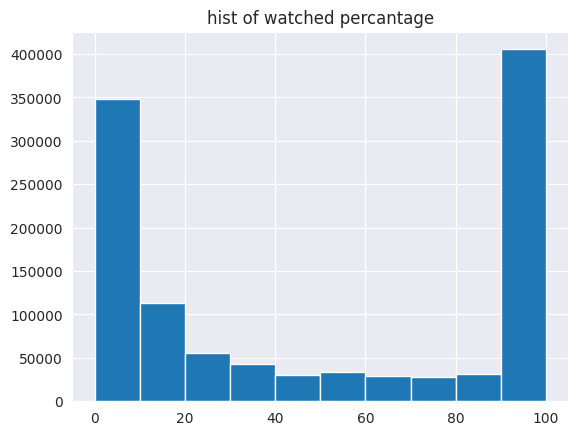

In [ ]:
plt.hist(train_data['watched_pct'])
plt.title('hist of watched percantage')
plt.plot()

In [ ]:
len(train_data[train_data['watched_pct'] == 0]) / len(train_data)

0.1286810640351089

–º–Ω–µ –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, –ø—Ä–∞–≤–∏–ª—å–Ω–æ –ª–∏ —è –ø–æ–Ω–∏–º–∞—é, —á—Ç–æ –µ—Å–ª–∏ —É –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è 0% –ø—Ä–æ—Å–º–æ—Ç—Ä–∞, —Ç–æ –∑–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä —ç—Ç–æ –¥–µ–π—Å—Ç–≤–∏–µ —Å—á–∏—Ç–∞—Ç—å –Ω–µ —Å—Ç–æ–∏—Ç, –∏ —ç—Ç–æ —Ç–∏–ø–∞ –¥–µ–π—Å—Ç–≤–∏–µ "–æ—Ç–∫—Ä—ã–ª –∫–∞—Ä—Ç–æ—á–∫—É —Ñ–∏–ª—å–º–∞"?..

–ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ñ–∏–ª—å–º—ã –∏ —á—Ç–æ –∏–∑ —Å–µ–±—è –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Ç–æ–ø100 –ø–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞–º

In [ ]:
top100movies = train_data.loc[train_data['watched_pct'] > 0, 'item_id'].value_counts().keys()[:100]
top100movies

Int64Index([15297, 10440, 13865,  9728,  4151,  3734,  2657,   142,  6809,
             4880,  4740,  8636, 11237,  1844,  7571,  9996, 12995, 14741,
            14431,  4457,  7417, 14703,  4495,  4436,   849,  7102,  5658,
            13018,  7107, 12192, 11778,  1819,  7626, 12173, 14470,   101,
             1132, 12981, 10464,  3935, 16166,  9169,  1916, 14317, 11310,
            12463,  3076,  7829, 12501,  6402, 14901, 16228,   657, 16361,
            15464,  3182,  9194,  1287, 12324, 10772,  5693, 10942,  6626,
            13915, 14359, 14461, 10077, 15531,  8447,  8373, 12770,  8618,
             1449,  5424, 11754,  1785, 11640,  5287,  5732, 12743,  4382,
             6443,  6192,  5250,  7582, 12841, 15915, 10761,  5411,  7210,
             3071, 16270,  5803, 10436,    14,    24, 13243,  1554,  6455,
             1053],
           dtype='int64')

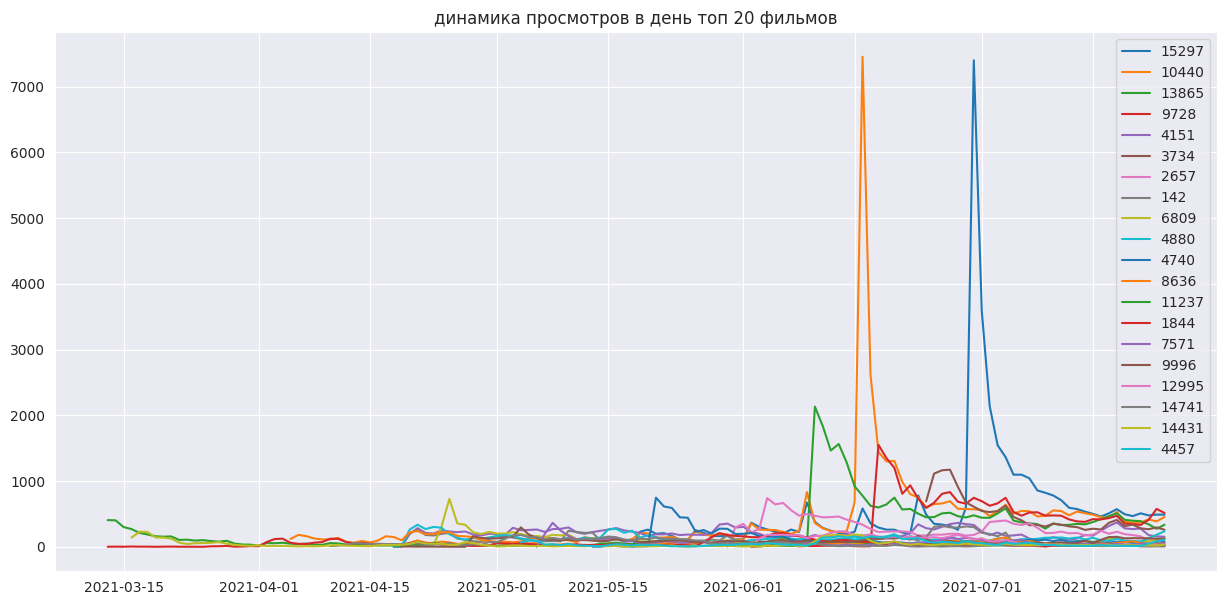

In [ ]:
k = 20
plt.figure(figsize=(15, 7))
for movie in top100movies[:k]:
    movie_watches = train_data.loc[train_data['item_id'] == movie].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})
    plt.plot(movie_watches['last_watch_dt'], movie_watches['cnt'], label=str(movie))
plt.legend()
plt.title('–¥–∏–Ω–∞–º–∏–∫–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –≤ –¥–µ–Ω—å —Ç–æ–ø 20 —Ñ–∏–ª—å–º–æ–≤')
plt.show()

–≤–æ–ø—Ä–æ—Å—ã:
- —á—Ç–æ —ç—Ç–æ –∑–∞ –≤—ã–±—Ä–æ—Å—ã –≤ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞—Ö –∏ —Å —á–µ–º —ç—Ç–æ —Å–≤—è–∑–∞–Ω–æ?
- –ø—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ –≤ —Å—Ä–µ–¥–Ω–µ–º –ø–∏–∫ –∫–æ–ª-–≤–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ —Ñ–∏–ª—å–º–∞ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –≤ —Ç–µ—á–µ–Ω–∏–∏ –ø–∞—Ä—ã –Ω–µ–¥–µ–ª—å –ø–æ—Å–ª–µ –µ–≥–æ —Ä–µ–ª–∏–∑–∞ –∏–ª–∏ —Ä–µ–ª–∏–∑–∞ –∏–º–µ–Ω–Ω–æ –Ω–∞ –ø–ª–∞—Ç—Ñ–æ—Ä–º–µ?

In [ ]:
items_df.loc[items_df['item_id'] == 10440]

item_id content_type        title    title_orig  release_year  \
1429    10440       series  –•—Ä—É—Å—Ç–∞–ª—å–Ω—ã–π  Khrustal'nyy        2021.0   

                   genres countries  for_kids  age_rating studios  \
1429  —Ç—Ä–∏–ª–ª–µ—Ä—ã, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã    –†–æ—Å—Å–∏—è       0.0        18.0     NaN   

           directors                                             actors  \
1429  –î—É—à–∞–Ω –ì–ª–∏–≥–æ—Ä–æ–≤  –ê–Ω—Ç–æ–Ω –í–∞—Å–∏–ª—å–µ–≤, –ù–∏–∫–æ–ª–∞–π –®—Ä–∞–π–±–µ—Ä, –ï–∫–∞—Ç–µ—Ä–∏–Ω–∞ –û–ª—å...   

                                            description  \
1429  –°–µ—Ä–≥–µ–π –°–º–∏—Ä–Ω–æ–≤ ‚Äî –æ–¥–∏–Ω –∏–∑ –ª—É—á—à–∏—Ö ¬´–æ—Ö–æ—Ç–Ω–∏–∫–æ–≤ –Ω–∞ ...   

                                               keywords  
1429  —Ö—Ä—É—Å—Ç, —Ö—Ä—É—Å—Ç–∞–ª—å, —Ö—Ä—É—Å—Ç–∞, —Ö—Ä—É—Å, –ø–æ–ª–∏—Ü–µ–π—Å–∫–∏–π, –ø–µ...

In [ ]:
movie = 10440
chrust_watches = train_data.loc[train_data['item_id'] == movie].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})

In [ ]:
chrust_watches.iloc[chrust_watches['cnt'].idxmax()]

last_watch_dt    2021-06-16 00:00:00
cnt                             7456
item_id                         7456
total_dur                       7456
watched_pct                     7456
Name: 59, dtype: object

–¥–∞—Ç–∞ –ø–∏–∫–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å –≤—ã—Ö–æ–¥–æ–º –ø–æ—Å–ª–µ–¥–Ω–µ–π —Å–µ—Ä–∏–∏ —Å–µ—Ä–∏–∞–ª–∞

In [ ]:
movie = 15297
items_df.loc[items_df['item_id'] == movie]

item_id content_type            title         title_orig  release_year  \
572    15297       series  –ö–ª–∏–Ω–∏–∫–∞ —Å—á–∞—Å—Ç—å—è  Klinika schast'ya        2021.0   

               genres countries  for_kids  age_rating studios  \
572  –¥—Ä–∞–º—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã    –†–æ—Å—Å–∏—è       0.0        18.0     NaN   

              directors                                             actors  \
572  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä –ö–∏—Ä–∏–µ–Ω–∫–æ  –î–∞—Ä—å—è –ú–æ—Ä–æ–∑, –ê–Ω–∞—Ç–æ–ª–∏–π –ë–µ–ª—ã–π, –î–∞–Ω–∏–ª –ê–∫—É—Ç–∏–Ω, –ú–∞—Ä...   

                                           description  \
572  –£—Å–ø–µ—à–Ω—ã–π —Å–µ–∫—Å–æ–ª–æ–≥ –ê–ª–µ–Ω–∞ —É–≤–µ—Ä–µ–Ω–∞, —á—Ç–æ –Ω–∞—à–ª–∞ —Ñ–æ—Ä...   

                                              keywords  
572  –ö–ª–∏–Ω–∏–∫–∞ —Å—á–∞—Å—Ç—å—è, –ö–ª–∏–Ω–∏–∫–∞, –°—á–∞—Å—Ç—å–µ, –ö–ª–∏–Ω–∏–∫–∞ —Å—á–∞...

In [ ]:
happy_clinic = train_data.loc[train_data['item_id'] == movie].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})
happy_clinic.iloc[happy_clinic['cnt'].idxmax()]

last_watch_dt    2021-06-30 00:00:00
cnt                             7403
item_id                         7403
total_dur                       7403
watched_pct                     7403
Name: 43, dtype: object

—Ç–æ–∂–µ —Å–∞–º–æ–µ - –ø–∏–∫ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –≤ –ø–æ—Å–ª–µ–¥–Ω–∏–π –¥–µ–Ω—å

In [ ]:
movie = 13865
items_df.loc[items_df['item_id'] == movie]

item_id content_type     title            title_orig  release_year  \
4921    13865         film  –î–µ–≤—è—Ç–∞–µ–≤  V2. Escape from Hell        2021.0   

                           genres countries  for_kids  age_rating studios  \
4921  –¥—Ä–∞–º—ã, –≤–æ–µ–Ω–Ω—ã–µ, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è    –†–æ—Å—Å–∏—è       0.0        12.0     NaN   

              directors                                             actors  \
4921  –¢–∏–º—É—Ä –ë–µ–∫–º–∞–º–±–µ—Ç–æ–≤  –ü–∞–≤–µ–ª –ü—Ä–∏–ª—É—á–Ω—ã–π, –ü–∞–≤–µ–ª –ß–∏–Ω–∞—Ä—ë–≤, –¢–∏–º–æ—Ñ–µ–π –¢—Ä–∏–±—É–Ω...   

                                            description  \
4921  –í–æ–µ–Ω–Ω–æ-–∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–π –±–ª–æ–∫–±–∞—Å—Ç–µ—Ä –æ—Ç —Ä–µ–∂–∏—Å—Å—ë—Ä–æ–≤ –¢...   

                                               keywords  
4921  –î–µ–≤—è—Ç–∞–µ–≤, –î–µ–≤—è—Ç–∞–µ–≤–∞, –î–µ–≤—è—Ç, –î–µ–≤—è, –î–µ–≤—è—Ç–∞, –î–µ–≤—è...

In [ ]:
devyataev = train_data.loc[train_data['item_id'] == movie].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})
devyataev.iloc[devyataev['cnt'].idxmax()]

last_watch_dt    2021-06-10 00:00:00
cnt                             2133
item_id                         2133
total_dur                       2133
watched_pct                     2133
Name: 6, dtype: object

—É –¥–µ–≤—è—Ç–∞–µ–≤–∞ —Ü–∏—Ñ—Ä–æ–≤–æ–π —Ä–µ–ª–∏–∑ –Ω–∞ –∫–∏–æ–Ω–µ –∫–∞–∫ —Ä–∞–∑ 10 –∏—é–Ω—è. —ç—Ç–æ—Ç –∫–µ–π—Å —É–∂–µ —Å–∫–æ—Ä–µ–µ –æ—Ç–Ω–æ—Å–∏—Ç—Å—è –∫–æ –≤—Ç–æ—Ä–æ–º—É –≤–æ–ø—Ä–æ—Å—É

–ø–æ –ø–µ—Ä–≤–æ–º—É –≤–æ–ø—Ä–æ—Å—É –∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –Ω–∞ –≥—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ —Å–µ—Ä–∏–∞–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã—à–ª–∏ –≤ 2021 –≥–æ–¥—É

In [ ]:
top_2021_series = items_df.loc[((items_df['content_type'] == 'series') & (items_df['release_year'] == 2021) & (items_df['item_id'].isin(top100movies))), 'item_id']

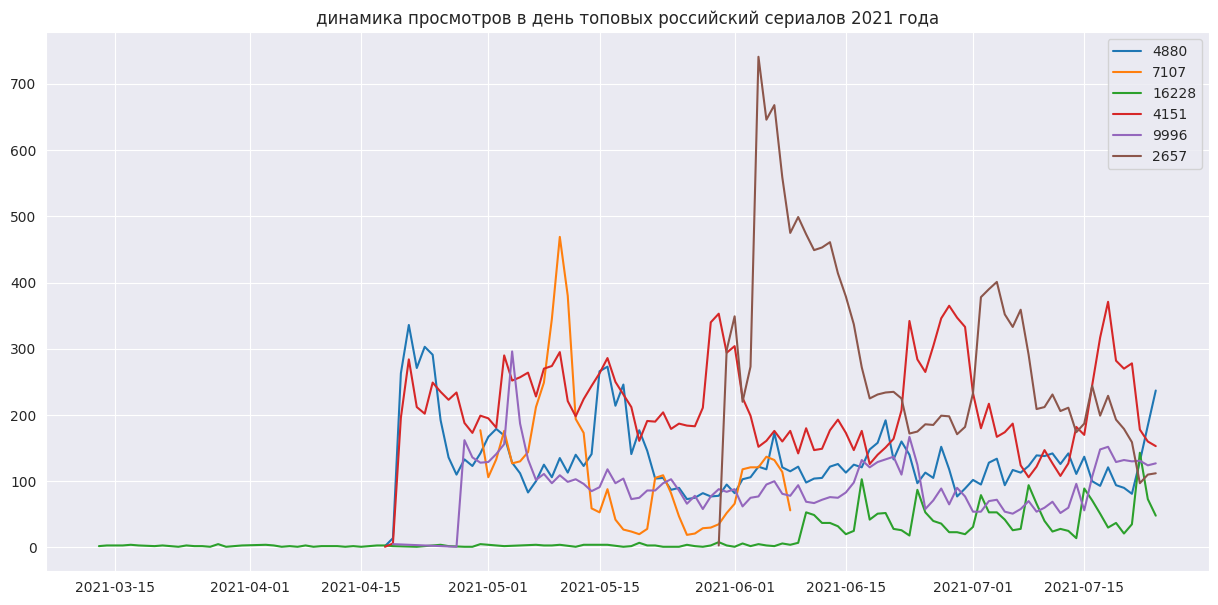

In [ ]:
k = 20
plt.figure(figsize=(15, 7))
for series in top_2021_series:
    if series == 10440 or series == 15297:
        continue    # —É–±–µ—Ä–µ–º —ç—Ç–∏ –≤—ã–±—Ä–æ—Å—ã —á—Ç–æ–±—ã –≥—Ä–∞—Ñ–∏–∫ –ª–µ–≥—á–µ —á–∏—Ç–∞–ª—Å—è
    series_watches = train_data.loc[train_data['item_id'] == series].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})
    plt.plot(series_watches['last_watch_dt'], series_watches['cnt'], label=str(series))
plt.legend()
plt.title('–¥–∏–Ω–∞–º–∏–∫–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –≤ –¥–µ–Ω—å —Ç–æ–ø–æ–≤—ã—Ö —Ä–æ—Å—Å–∏–π—Å–∫–∏–π —Å–µ—Ä–∏–∞–ª–æ–≤ 2021 –≥–æ–¥–∞')
plt.show()

In [ ]:
item = 2657
items_df.loc[items_df['item_id'] == item]

item_id content_type       title   title_orig  release_year  \
10305     2657       series  –ü–æ–¥—Å–ª—É—à–∞–Ω–æ  Podslushano        2021.0   

                genres countries  for_kids  age_rating studios     directors  \
10305  –¥—Ä–∞–º—ã, —Ç—Ä–∏–ª–ª–µ—Ä—ã    –†–æ—Å—Å–∏—è       NaN        16.0     NaN  –ò–ª—å—è –ö—É–ª–∏–∫–æ–≤   

                                                  actors  \
10305  –ê–ª–µ–∫—Å–∞–Ω–¥—Ä H–æ–≤–∏–∫–æ–≤, –í–∞–ª–µ–Ω—Ç–∏–Ω–∞ –õ—è–ø–∏–Ω–∞, –ù–∏–∫–∏—Ç–∞ –ü–∞...   

                                             description  \
10305  –°–º–æ—Ç—Ä–∏:- –∫–∞–∫ –∫–∏–Ω–æ- –∫–∞–∫ —Å–µ—Ä–∏–∞–ª–ü–æ–¥—Ä–æ—Å—Ç–∫–æ–≤—ã–π –ø—Å–∏—Ö...   

                                                keywords  
10305  –ø–æ–¥—Å–ª—É—à–∞–Ω–æ, –ø–æ–¥—Å–ª—É—à–∞–Ω–æ –≤ –∫–æ–Ω—Ç–∞–∫—Ç–µ, —Å–æ—Ü–∏–∞–ª—å–Ω–∞—è ...

In [ ]:
item_data = train_data.loc[train_data['item_id'] == item].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})
item_data.iloc[item_data['cnt'].idxmax()]

last_watch_dt    2021-06-04 00:00:00
cnt                              741
item_id                          741
total_dur                        741
watched_pct                      741
Name: 5, dtype: object

–ø–∏–∫ –≤ –¥–µ–Ω—å –ø–æ—Å–ª–µ–¥–Ω–µ–π —Å–µ—Ä–∏–∏

In [ ]:
item = 7107
items_df.loc[items_df['item_id'] == item]

item_id content_type     title            title_orig  release_year  \
863     7107       series  –î–µ–≤—è—Ç–∞–µ–≤  V2. Escape from Hell        2021.0   

                          genres countries  for_kids  age_rating studios  \
863  –¥—Ä–∞–º—ã, –≤–æ–µ–Ω–Ω—ã–µ, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è    –†–æ—Å—Å–∏—è       NaN        12.0     NaN   

             directors                                             actors  \
863  –¢–∏–º—É—Ä –ë–µ–∫–º–∞–º–±–µ—Ç–æ–≤  –ü–∞–≤–µ–ª –ü—Ä–∏–ª—É—á–Ω—ã–π, –ü–∞–≤–µ–ª –ß–∏–Ω–∞—Ä—ë–≤, –¢–∏–º–æ—Ñ–µ–π –¢—Ä–∏–±—É–Ω...   

                                           description keywords  
863  –í–æ–µ–Ω–Ω–æ-–∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–π –±–ª–æ–∫–±–∞—Å—Ç–µ—Ä –æ—Ç —Ä–µ–∂–∏—Å—Å—ë—Ä–æ–≤ –¢...      NaN

In [ ]:
item_data = train_data.loc[train_data['item_id'] == item].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})
item_data.iloc[item_data['cnt'].idxmax()]

last_watch_dt    2021-05-10 00:00:00
cnt                              469
item_id                          469
total_dur                        469
watched_pct                      469
Name: 10, dtype: object

–Ω–∞—à–µ–ª—Å—è –∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π –¥—É–±–ª—å))

In [ ]:
item = 16228
items_df.loc[items_df['item_id'] == item]

item_id content_type       title title_orig  release_year    genres  \
1149    16228       series  –°–æ–¥–µ—Ä–∂–∞–Ω–∫–∏        NaN        2021.0  —Ç—Ä–∏–ª–ª–µ—Ä—ã   

     countries  for_kids  age_rating studios  \
1149    –†–æ—Å—Å–∏—è       0.0        18.0     NaN   

                                        directors  \
1149  –ö–æ–Ω—Å—Ç–∞–Ω—Ç–∏–Ω –ë–æ–≥–æ–º–æ–ª–æ–≤, –î–∞—Ä—å—è –ñ—É–∫, –Æ—Ä–∏–π –ú–æ—Ä–æ–∑   

                                                 actors  \
1149  –î–∞—Ä—å—è –ú–æ—Ä–æ–∑, –°–æ—Ñ—å—è –≠—Ä–Ω—Å—Ç, –°–µ—Ä–≥–µ–π –ë—É—Ä—É–Ω–æ–≤, –í–ª–∞–¥...   

                                            description  \
1149  –¢–æ–Ω–∫–æ–µ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏–µ —Ç–æ–≥–æ, –∫–∞–∫ –∏ —á–µ–º –∂–∏–≤—ë—Ç —Å—Ç–æ–ª...   

                      keywords  
1149  –°–æ–¥–µ—Ä–∂–∞–Ω–∫–∏, 2021, –†–æ—Å—Å–∏—è

In [ ]:
item_data = train_data.loc[train_data['item_id'] == item].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})
item_data.iloc[item_data['cnt'].idxmax()]

last_watch_dt    2021-07-22 00:00:00
cnt                              143
item_id                          143
total_dur                        143
watched_pct                      143
Name: 117, dtype: object

—Å–µ—Ä–∏–∞–ª —É –∫–æ—Ç–æ—Ä–æ–≥–æ –≤ –∏—é–Ω–µ –≤—ã—à–µ–ª –Ω–æ–≤—ã–π —Å–µ–∑–æ–Ω –∏ –≤–∏–¥–∏–º–æ —Å–µ—Ä–∏–∏ –ø–æ–∫–∞–∑—ã–≤–∞–ª–∏—Å—å –ø–æ –æ–¥–Ω–æ–º—É —Ä–∞–∑—É –≤ –Ω–µ–¥–µ–ª—é

–µ—â–µ –ø–æ—Å–º–æ—Ç—Ä–∏–º –≥—Ä–∞—Ñ–∏–∫–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ —Ç–æ–ª—å–∫–æ –¥–ª—è —Ñ–∏–ª—å–º–æ–≤ –∏–∑ —Ç–æ–ø100

—ç—Ç–æ —Å–∫–æ—Ä–µ–µ —Å—Ç–æ–∏—Ç –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä–æ–≤–∞—Ç—å –∫–∞–∫ –∫–æ–ª–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ –ø–æ—Å–ª–µ–¥–Ω–∏–π —Ä–∞–∑ —Å–º–æ—Ç—Ä–µ–ª–∏ –¥–∞–Ω–Ω—ã–π —Å–µ—Ä–∏–∞–ª

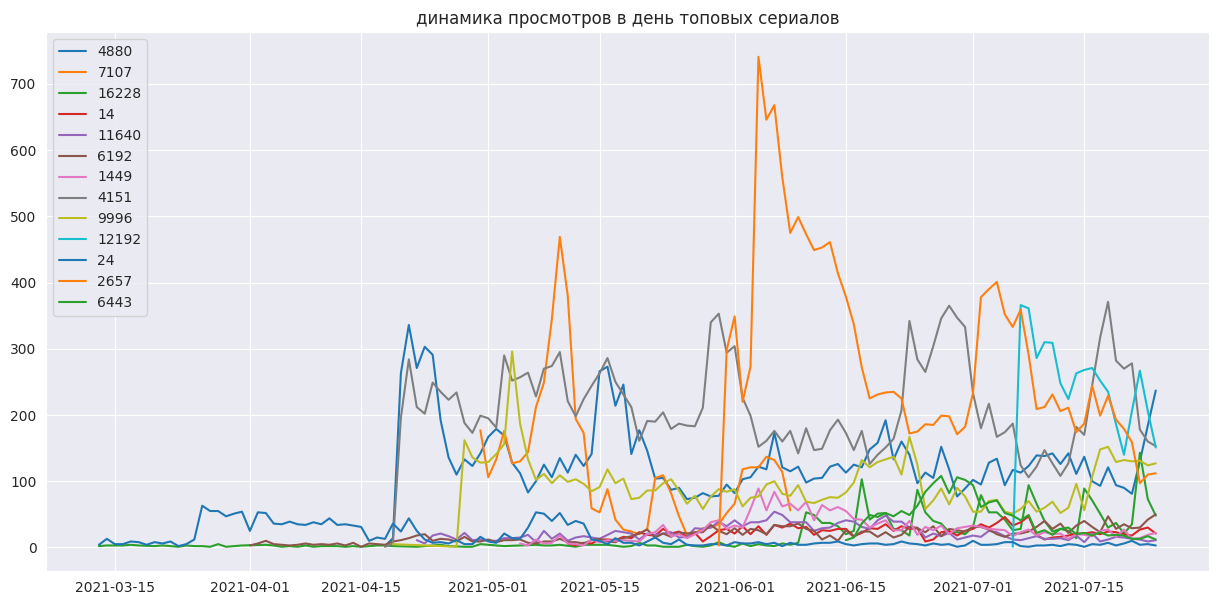

In [ ]:
top_series = items_df.loc[((items_df['content_type'] == 'series') & (items_df['item_id'].isin(top100movies))), 'item_id']
k = 20
plt.figure(figsize=(15, 7))
for series in top_series:
    if series == 10440 or series == 15297:
        continue    # —É–±–µ—Ä–µ–º —ç—Ç–∏ –≤—ã–±—Ä–æ—Å—ã —á—Ç–æ–±—ã –≥—Ä–∞—Ñ–∏–∫ –ª–µ–≥—á–µ —á–∏—Ç–∞–ª—Å—è
    series_watches = train_data.loc[train_data['item_id'] == series].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})
    plt.plot(series_watches['last_watch_dt'], series_watches['cnt'], label=str(series))
plt.legend()
plt.title('–¥–∏–Ω–∞–º–∏–∫–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –≤ –¥–µ–Ω—å —Ç–æ–ø–æ–≤—ã—Ö —Å–µ—Ä–∏–∞–ª–æ–≤')
plt.show()

–º–æ–∂–Ω–æ —Å–∫–∞–∑–∞—Ç—å, —á—Ç–æ –¥–ª—è —Å–µ—Ä–∏–∞–ª–æ–≤, –∫–æ—Ç–æ—Ä—ã–µ –≤—ã—Ö–æ–¥–∏–ª–∏ –≤ –ø–µ—Ä–∏–æ–¥ —Å–±–æ—Ä–∞ –¥–∞–Ω–Ω—ã—Ö, –≤–∏–¥–Ω–µ–µ—Ç—Å—è –¥–∏–Ω–∞–º–∏–∫–∞, –≥–¥–µ —Å –≤—ã—Ö–æ–¥–æ–º –∫–∞–∂–¥–æ–π –Ω–æ–≤–æ–π —Å–µ—Ä–∏–∏ –æ—Ç–º–µ—á–∞–µ—Ç—Å—è –ø–∏–∫ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤, –∏ —Å–∞–º—ã–π –±–æ–ª—å—à–æ–π –ø–∏–∫ –ø—Ä–∏—Ö–æ–¥–∏—Ç—Å—è –Ω–∞ —Ñ–∏–Ω–∞–ª.

–¥–ª—è —Å–µ—Ä–∏–∞–ª–æ–≤ –±–µ–∑ –æ–±–Ω–æ–≤–ª–µ–Ω–∏—è –≥—Ä–∞—Ñ–∏–∫–∏ –±–æ–ª–µ–µ –ø–ª–∞–≤–Ω—ã–µ

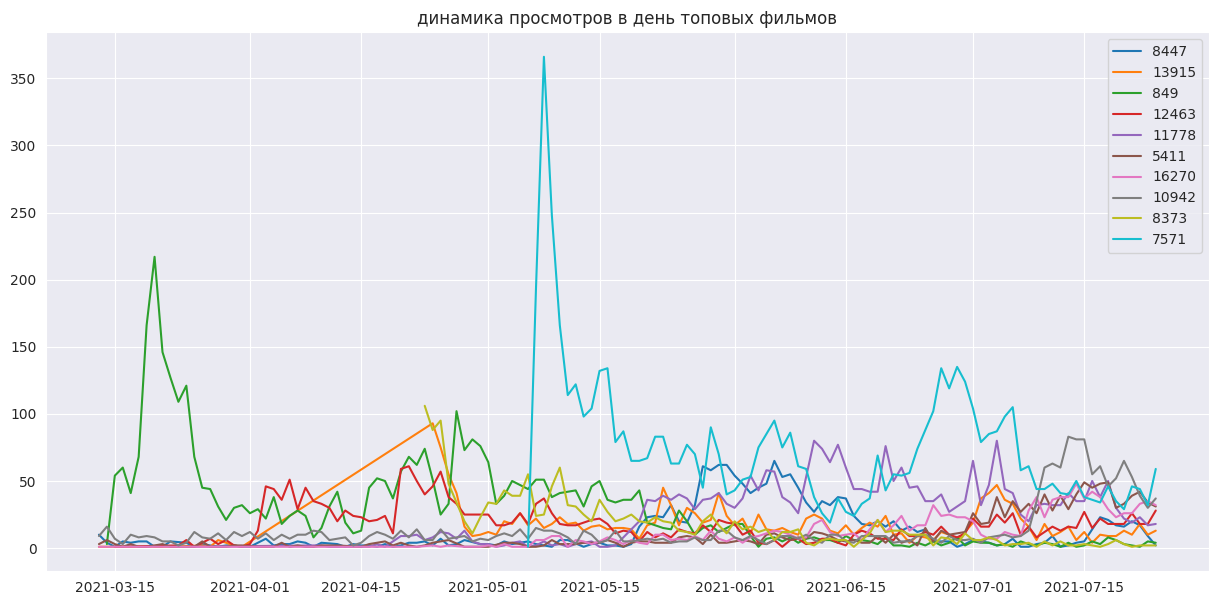

In [ ]:
top_movies = items_df.loc[((items_df['content_type'] == 'film') & (items_df['item_id'].isin(top100movies))), 'item_id']
k = 10
plt.figure(figsize=(15, 7))
for movie in top_movies[:k]:
    movies_watches = train_data.loc[train_data['item_id'] == movie].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})
    plt.plot(movies_watches['last_watch_dt'], movies_watches['cnt'], label=str(movie))
plt.legend()
plt.title('–¥–∏–Ω–∞–º–∏–∫–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –≤ –¥–µ–Ω—å —Ç–æ–ø–æ–≤—ã—Ö —Ñ–∏–ª—å–º–æ–≤')
plt.show()

In [ ]:
item = 7571
items_df.loc[items_df['item_id'] == item]

item_id content_type      title title_orig  release_year  \
1400     7571         film  100% –≤–æ–ª–∫  100% Wolf        2020.0   

                                                 genres           countries  \
1400  –º—É–ª—å—Ç—Ñ–∏–ª—å–º, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, —Å–µ–º–µ–π–Ω–æ–µ, —Ñ—ç–Ω—Ç–µ–∑–∏, –∫–æ...  –ê–≤—Å—Ç—Ä–∞–ª–∏—è, –ë–µ–ª—å–≥–∏—è   

      for_kids  age_rating studios         directors  \
1400       NaN         6.0     NaN  –ê–ª–µ–∫—Å –°—Ç–∞–¥–µ—Ä–º–∞–Ω–Ω   

                                                 actors  \
1400  –ò–ª–∞–π –°—É–∏–Ω–¥–µ–ª–ª—Å, –°–∞–º–∞—Ä–∞ –£–∏–≤–∏–Ω–≥, –î–∂–∞–π –ö–æ—Ä—Ç–Ω–∏, –†—É...   

                                            description  \
1400  –ù–∞—Å–ª–µ–¥–Ω–∏–∫ —Å–µ–º—å–∏ –æ–±–æ—Ä–æ—Ç–Ω–µ–π –§—Ä–µ–¥–¥–∏ –õ—é–ø–∏–Ω –æ—Ç—á–∞—è–Ω–Ω...   

                                               keywords  
1400  –ø—É–¥–µ–ª—å, –ø–æ–¥—Ä–æ—Å—Ç–∫–æ–≤–∞—è —Ç—Ä–µ–≤–æ–≥–∞, –æ–±–æ—Ä–æ—Ç–µ–Ω—å, –ø—Ä–∏–Ω—è...

In [ ]:
item_data = train_data.loc[train_data['item_id'] == item].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})
item_data.iloc[item_data['cnt'].idxmax()]

last_watch_dt    2021-05-08 00:00:00
cnt                              366
item_id                          366
total_dur                        366
watched_pct                      366
Name: 2, dtype: object

—Ä–µ–∑–∏–∑ –≤ —Ä–æ—Å—Å–∏–∏ –≤ –∫–∏–Ω–æ –±—ã–ª 8 –∞–ø—Ä–µ–ª—è, –ø—Ä–µ–¥–ø–æ–ª–æ–∂—É —á—Ç–æ 8 –º–∞—è –±—ã–ª —Ä–µ–ª–∏–∑ –Ω–∞ –∫–∏–æ–Ω–µ

In [ ]:
item = 849
items_df.loc[items_df['item_id'] == item]

item_id content_type    title   title_orig  release_year  \
211      849         film  –î–µ–±–æ—à–∏—Ä  The Brawler        2018.0   

                                                genres countries  for_kids  \
211  –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–æ–µ, –±–∏–æ–≥—Ä–∞—Ñ–∏—è, –∫—Ä–∏–º–∏–Ω–∞–ª, –¥—Ä–∞–º—ã, —Å–ø–æ—Ä...       –°–®–ê       0.0   

     age_rating studios   directors  \
211        18.0     NaN  –ö–µ–Ω –ö—É—à–Ω–µ—Ä   

                                                actors  \
211  –ó—ç–∫ –ú–∞–∫–≥–æ—É–Ω, –≠–º–∏ –°–º–∞—Ä—Ç, –î–∂–æ –ü–∞–Ω—Ç–æ–ª—å—è–Ω–æ, –¢—ç—Ä–∏–Ω ...   

                                           description  \
211  –õ–µ–≥–µ–Ω–¥–∞—Ä–Ω—ã–π –±–æ–∫—Å—ë—Ä –ß–∞–∫ –í–µ–ø–Ω–µ—Ä (–Ω–∞ —ç–∫—Ä–∞–Ω–µ –µ–≥–æ –∏...   

                             keywords  
211  2018, —Å–æ–µ–¥–∏–Ω–µ–Ω–Ω—ã–µ —à—Ç–∞—Ç—ã, –¥–µ–±–æ—à–∏—Ä

In [ ]:
item_data = train_data.loc[train_data['item_id'] == item].groupby('last_watch_dt').count().reset_index().rename(columns={'user_id': 'cnt'})
item_data.iloc[item_data['cnt'].idxmax()]

last_watch_dt    2021-03-20 00:00:00
cnt                              217
item_id                          217
total_dur                        217
watched_pct                      217
Name: 6, dtype: object

–∑–∞–º–µ—Ç–Ω–æ, —É –Ω–æ–≤—ã—Ö —Ä–µ–ª–∏–∑–Ω—É—Ç—ã—Ö —Ñ–∏–ª—å–º–æ–≤ —Å–∏–ª—å–Ω–æ —Ä–∞—Å—Ç—É—Ç –ø—Ä–æ—Å–º–æ—Ç—Ä—ã –≤ –ø–µ—Ä–≤—ã–µ –¥–Ω–∏. —É —Å—Ç–∞—Ä—ã—Ö —Ñ–∏–ª—å–º–æ–≤ –≤—Å–µ —Å—Ç–∞–±–∏–ª—å–Ω–æ

**–≤—ã–≤–æ–¥:**
- –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É—á–∏—Ç—ã–≤–∞—Ç—å –∏—Å—Ç–æ—Ä–∏—é –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–µ –ø–∞—Ä—É –¥–Ω–µ–π, –Ω–µ–¥–µ–ª—é –∏ –º–µ—Å—è—Ü, —á—Ç–æ–±—ã –≤–≤–µ—Å—Ç–∏ –¥–ª—è –º–æ–¥–µ–ª–∏ –∫–∞–∫–∏–µ-—Ç–æ –∑–Ω–∞–∫–∏ —á—Ç–æ —Å–µ–π—á–∞—Å –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —Å —Ñ–∏–ª—å–º–æ–º/—Å–µ—Ä–∏–∞–ª–æ–º
- –∫–∞–∂–µ—Ç—Å—è –Ω–µ–ø–ª–æ—Ö–æ–π –∏–¥–µ–π –¥–æ–±–∞–≤–∏—Ç—å –¥–∞—Ç—É —Ä–µ–ª–∏–∑–∞ —Ñ–∏–ª—å–º–∞ –∏ –≤—ã—Ö–æ–¥–∞ –ø–æ—Å–ª–µ–¥–Ω–µ–π —Å–µ—Ä–∏–∏ –¥–ª—è —Å–µ—Ä–∏–∞–ª–∞, –Ω–æ —ç—Ç–æ –Ω–∞–¥–æ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω–æ –ø–∞—Ä—Å–∏—Ç—å –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é
- –¥–∞–ª—å—à–µ –Ω–∞–¥–æ –∞–∫–∫—É—Ä—Ç–Ω–æ –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –¥–≤–∞ —Å—É–ø–µ—Ä –≤—ã–±—Ä–æ—Å–∞

–ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –¥–∞–Ω–Ω—ã–µ —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π

In [ ]:
print('–∫–æ–ª–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–π –≤ —Ç—Ä–µ–π–Ω–µ', train_data['user_id'].nunique())
print('–∫–æ–ª–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –∏–∑–≤–µ—Å—Ç–Ω—ã –º–µ—Ç–∞ –¥–∞–Ω–Ω—ã–µ', users_df['user_id'].nunique())

–∫–æ–ª–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–π –≤ —Ç—Ä–µ–π–Ω–µ 425949
–∫–æ–ª–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –∏–∑–≤–µ—Å—Ç–Ω—ã –º–µ—Ç–∞ –¥–∞–Ω–Ω—ã–µ 366088


In [ ]:
cnt_items_per_user = train_data.loc[train_data['watched_pct'] > 0].groupby('user_id')['item_id'].count().sort_values(ascending=False).reset_index().rename(columns={'item_id': 'cnt_items'})

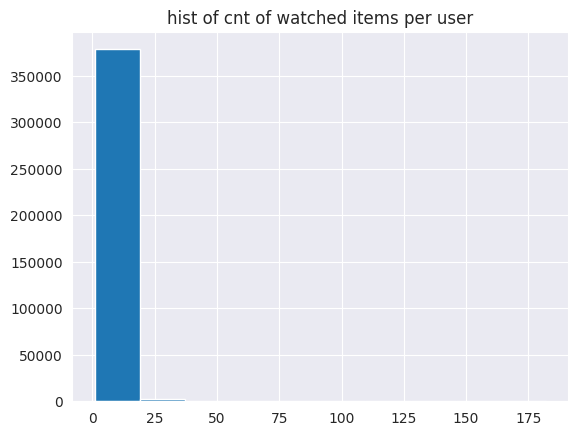

In [ ]:
plt.hist(cnt_items_per_user['cnt_items'])
plt.title('hist of cnt of watched items per user')
plt.show()

In [ ]:
cnt_items_per_user['cnt_items'].value_counts(normalize=True)

1      0.524390
2      0.193571
3      0.098481
4      0.056074
5      0.034837
         ...   
83     0.000003
82     0.000003
79     0.000003
76     0.000003
182    0.000003
Name: cnt_items, Length: 97, dtype: float64

—É –º–µ–Ω—è –±—ã–ª–∞ –º—ã—Å–ª—å –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∫–æ–ª–ª–∞–±–æ—Ä–∞—Ç–∏–≤–Ω—É—é —Ñ–∏–ª—å—Ç—Ä–∞—Ü–∏—é –∫–æ—Ç–æ—Ä–∞—è –∏—â–µ—Ç –ø–æ—Ö–æ–∂–∏—Ö –ø–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–º —Ñ–∏–ª—å–º–∞–º –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –Ω–æ —Å —É—á–µ—Ç–æ–º —Ç–æ–≥–æ, —á—Ç–æ –±–æ–ª—å—à–µ —á–µ–º —É –ø–æ–ª–æ–≤–∏–Ω—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –æ—Ç–º–µ—á–µ–Ω —Ç–æ–ª—å–∫–æ –æ–¥–∏–Ω —Ñ–∏–ª—å–º, –º–∞–ª–æ–≤–µ—Ä–æ—è—Ç–Ω–æ —á—Ç–æ –¥–∞–Ω–Ω—ã–π –ø–æ–¥—Ö–æ–¥ —Å–º–æ–∂–µ—Ç —á—Ç–æ-—Ç–æ –Ω–æ—Ä–º–∞–ª—å–Ω–æ –ø—Ä–µ–¥—Å–∫–∞–∑–∞—Ç—å

In [ ]:
# –æ—á–µ–Ω—å –∏–Ω—Ç–µ—Ä–µ—Å–Ω–∞—è –≤—ã–±–∏–≤–∞—é—â–∞—è—Å—è –∑–∞–ø–∏—Å—å
cnt_items_per_user.loc[cnt_items_per_user['cnt_items'] == 182]

user_id  cnt_items
0    11526        182

In [ ]:
weird_ppl = train_data.loc[train_data['user_id'] == 11526].sort_values('last_watch_dt')
weird_ppl

user_id  item_id last_watch_dt  total_dur  watched_pct
1024676    11526    14504    2021-03-15       52.0          1.0
1017858    11526      112    2021-03-22      329.0          6.0
231795     11526     2766    2021-03-22      725.0         12.0
930824     11526     6949    2021-03-23       28.0          1.0
1016529    11526     5854    2021-03-23      241.0          5.0
...          ...      ...           ...        ...          ...
4695       11526    14959    2021-07-12      581.0         10.0
730719     11526    12695    2021-07-15     1763.0         24.0
1041621    11526    14826    2021-07-15    18189.0        100.0
1119195    11526     5252    2021-07-17     5430.0        100.0
830939     11526    16509    2021-07-18    36455.0          5.0

[187 rows x 5 columns]

(array([85., 37., 20., 12.,  6.,  5.,  4.,  1.,  3., 14.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

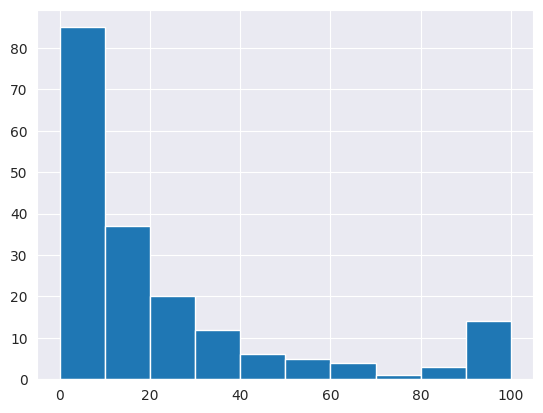

In [ ]:
plt.hist(weird_ppl['watched_pct'])

In [ ]:
items_df.loc[items_df['item_id'].isin([12695, 14826])]

item_id content_type      title    title_orig  release_year  \
528    12695         film  –ú—É–ª–µ–Ω –†—É–∂  Moulin Rouge        2001.0   
704    14826         film   –¢–æ–ª—Å—Ç—è–∫–∏        Gordos        2009.0   

                        genres       countries  for_kids  age_rating studios  \
528  –¥—Ä–∞–º—ã, –º—é–∑–∏–∫–ª—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã  –ê–≤—Å—Ç—Ä–∞–ª–∏—è, –°–®–ê       0.0        16.0     NaN   
704             –¥—Ä–∞–º—ã, –∫–æ–º–µ–¥–∏–∏         –ò—Å–ø–∞–Ω–∏—è       0.0        18.0     NaN   

                  directors  \
528              –ë–∞–∑ –õ—É—Ä–º–∞–Ω   
704  –î–∞–Ω–∏—ç–ª—å –°–∞–Ω—á–µ—Å –ê—Ä–µ–≤–∞–ª–æ   

                                                actors  \
528  –ù–∏–∫–æ–ª—å –ö–∏–¥–º–∞–Ω, –Æ—ç–Ω –ú–∞–∫–ì—Ä–µ–≥–æ—Ä, –î–∂–æ–Ω –õ–µ–≥—É–∏–∑–∞–º–æ, ...   
704  –ê–Ω—Ç–æ–Ω–∏–æ –¥–µ –ª–∞ –¢–æ—Ä—Ä–µ, –†–æ–±–µ—Ä—Ç–æ –≠–Ω—Ä–∏–∫–µ—Å, –í–µ—Ä–æ–Ω–∏–∫–∞...   

                                           description  \
528  –î–µ–π—Å—Ç–≤–∏–µ —Ñ–∏–ª—å–º–∞ —Ä–∞–∑–≤–æ—Ä–∞—á–∏–≤–∞–µ—Ç—Å—è –≤ 1899 –≥–æ–¥—É –≤ ...   
704  –ú—ã –Ω–∞—Ö–æ–¥–∏–º—Å—è –≤ –≥—Ä—É–ø–ø–µ –ø–æ–¥–¥–µ—Ä–∂–∫–∏ –ª—é–¥–µ–π —Å –∏–∑–±—ã—Ç–æ...   

                                              keywords  
528  —Ñ–µ—è, –≥–µ—Ä—Ü–æ–≥, –º—é–∑–∏–∫–ª, –ø–∏—Å–∞—Ç–µ–ª—å—Å–∫–∏–π –±–ª–æ–∫, –º—É–∑—ã–∫–∞...  
704  —Ç–æ–ª—Å—Ç—ã–π –º—É–∂—á–∏–Ω–∞, –ø–æ–ª–Ω–∞—è –∂–µ–Ω—â–∏–Ω–∞, –≥–µ–π-—Ç–µ–º–∞, 200...

In [ ]:
users_df.loc[users_df['user_id'] == 11526]

user_id        age        income sex  kids_flg
346287    11526  age_25_34  income_40_60   –ú         0

ü§îü§îü§î

–º–Ω–µ –∫–∞–∂–µ—Ç—Å—è —ç—Ç–æ –≤—ã–±—Ä–æ—Å –∏ —Å—Ç–æ–∏—Ç —É–±—Ä–∞—Ç—å –∑–∞–ø–∏—Å–∏ —ç—Ç–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞

In [ ]:
train_data.drop(train_data.loc[train_data['user_id'] == 11526].index, inplace=True)

In [ ]:
len(train_data)

1117934

–ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ –≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–µ–µ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã–µ —Å–º–æ—Ç—Ä—è—Ç —Ñ–∏–ª—å–º—ã

In [ ]:
users_df['income'].unique(), users_df['age'].unique()

(array(['income_60_90', 'income_20_40', 'income_40_60', 'income_90_150',
        'income_0_20', nan, 'income_150_inf'], dtype=object),
 array(['age_25_34', 'age_18_24', 'age_45_54', 'age_35_44', 'age_55_64',
        'age_65_inf', nan], dtype=object))

In [ ]:
# –¥–ª—è —É–¥–æ–±–Ω–æ–≥–æ —Å–±–æ—Ä–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –º–µ–¥–∏–∞–Ω –∏ –ø–µ—Ä—Ü–µ–Ω—Ç–∏–ª–µ–π

income_mapping = {
    'income_0_20': 0,
    'income_20_40': 1,
    'income_40_60': 2,
    'income_60_90': 3,
    'income_90_150': 4,
    'income_150_inf': 5
}

income_int_maping = dict()
for (k, v) in income_mapping.items():
    income_int_maping[v] = k

age_mapping = {
    'age_18_24': 0,
    'age_25_34': 1,
    'age_35_44': 2,
    'age_45_54': 3,
    'age_55_64': 4,
    'age_65_inf': 5
}

age_int_maping = dict()
for (k, v) in age_mapping.items():
    age_int_maping[v] = k

users_df['income_int'] = users_df['income'].map(income_mapping)
users_df['age_int'] = users_df['age'].map(age_mapping)

In [ ]:
female_key = '–ñ'
male_key = '–ú'

for item_id in tqdm(items_df['item_id'].unique()):
    users = train_data.loc[train_data['item_id'] == item_id, 'user_id'].values
    users_data = users_df.loc[users_df['user_id'].isin(users)]
    cnt_users = len(users)

    all_sex = users_data.loc[users_data['sex'].notna(), 'sex']
    cnt_users_with_sex = len(all_sex)
    if cnt_users_with_sex > 0:
        all_sex = all_sex.value_counts(normalize=True)
        if female_key in all_sex:
            female_r = all_sex[female_key]
        else:
            female_r = 0
        if male_key in all_sex:
            male_r = all_sex[male_key]
        else:
          male_r = 0
    else:
        female_r = None
        male_r = None

    all_age = users_data.loc[users_data['age'].notna(), 'age']
    if len(all_age) > 0:
        majority_age = all_age.value_counts().keys()[0]
        median_age_int = int(users_data.loc[users_data['age_int'].notna(), 'age_int'].median())
        median_age = age_int_maping[median_age_int]
    else:
        majority_age = None
        median_age = None

    all_income = users_data.loc[users_data['income'].notna(), 'income']
    if len(all_income) > 0:
        majority_income = all_income.value_counts().keys()[0]
        median_income_int = int(users_data.loc[users_data['income_int'].notna(), 'income_int'].median())
        median_income = income_int_maping[median_income_int]
    else:
        majority_income = None
        median_income = None

    new_cols = ['cnt_users', 'cnt_users_with_sex', 'female_r', 'male_r', 'age_major', 'age_median', 'income_major', 'income_median']
    new_vals = [cnt_users, cnt_users_with_sex, female_r, male_r, majority_age, median_age, majority_income, median_income]
    items_df.loc[items_df['item_id'] == item_id, new_cols] = new_vals

  0%|          | 0/12067 [00:00<?, ?it/s]

In [ ]:
items_df.isna().sum()

item_id                   0
content_type              0
title                     0
title_orig             2923
release_year             48
genres                    0
countries                16
for_kids                502
age_rating                1
studios               11318
directors               907
actors                 1799
description               1
keywords                362
cnt_users                 0
cnt_users_with_sex        0
female_r               1113
male_r                 1113
age_major              1115
age_median             1115
income_major           1110
income_median          1110
dtype: int64

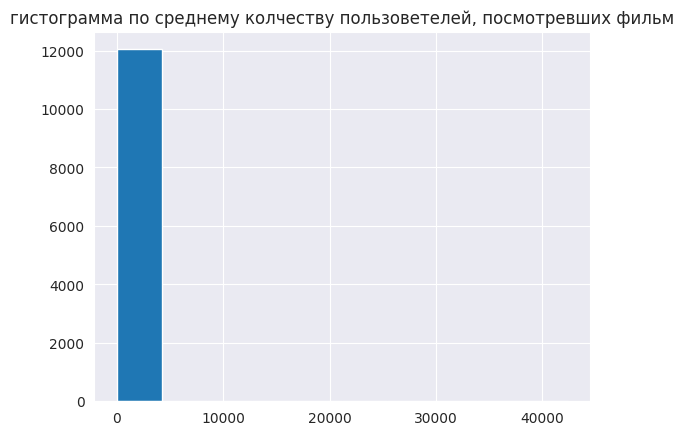

In [ ]:
plt.hist(items_df['cnt_users'])
plt.title('–≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –ø–æ —Å—Ä–µ–¥–Ω–µ–º—É –∫–æ–ª—á–µ—Å—Ç–≤—É –ø–æ–ª—å–∑–æ–≤–µ—Ç–µ–ª–µ–π, –ø–æ—Å–º–æ—Ç—Ä–µ–≤—à–∏—Ö —Ñ–∏–ª—å–º')
plt.show()

–≤–∏–¥–∏–º –æ—á–µ–Ω—å —Ç—è–∂–µ–ª—ã–π —Ö–≤–æ—Å—Ç, –Ω–µ –∑–∞–±—ã–≤–∞–µ–º —á—Ç–æ —É –Ω–∞—Å –µ—â–µ –µ—Å—Ç—å –ø–∞—Ä—É –≤—ã–±—Ä–æ—Å–æ–≤ —Å –∫—É—á–µ–π –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤

In [ ]:
print('—Å—Ä–µ–¥–Ω–∏–µ –ø–æ –¥–æ–ª—è–º –∂–µ–Ω—â–∏–Ω –∏ –º—É–∂—á–∏–Ω')
print(items_df[['female_r', 'male_r']].mean())

—Å—Ä–µ–¥–Ω–∏–µ –ø–æ –¥–æ–ª—è–º –∂–µ–Ω—â–∏–Ω –∏ –º—É–∂—á–∏–Ω
female_r    0.510833
male_r      0.489167
dtype: float64


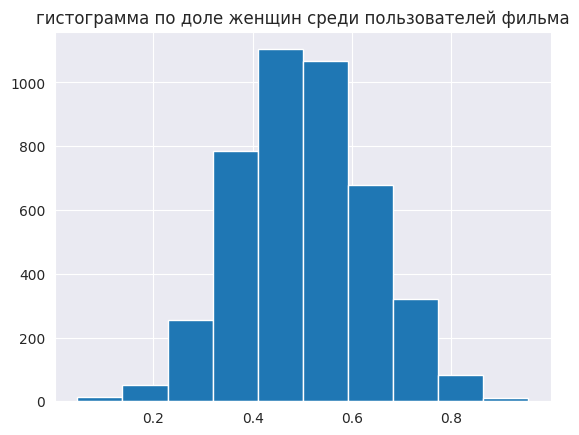

In [ ]:
plt.hist(items_df.loc[items_df['cnt_users_with_sex'] > 10, 'female_r'])
plt.title('–≥–∏—Å—Ç–æ–≥—Ä–∞–º–º–∞ –ø–æ –¥–æ–ª–µ –∂–µ–Ω—â–∏–Ω —Å—Ä–µ–¥–∏ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π —Ñ–∏–ª—å–º–∞')
plt.show()

In [ ]:
print('—Ñ–∏–ª—å–º—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–º–æ—Ç—Ä—è—Ç –∂–µ–Ω—â–∏–Ω—ã')
items_df.loc[items_df['cnt_users_with_sex'] > 10].sort_values('female_r', ascending=False).head(10)

—Ñ–∏–ª—å–º—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–º–æ—Ç—Ä—è—Ç –∂–µ–Ω—â–∏–Ω—ã


item_id content_type                         title  \
2016      5400       series             –ß–∞—Å—Ç–∏—Ü–∞ –≤—Å–µ–ª–µ–Ω–Ω–æ–π   
10830    15413       series                 –¢–µ–Ω–∏ –ø—Ä–æ—à–ª–æ–≥–æ   
10697     5227         film                 –ü–∏–æ–Ω–µ—Ä—ã-–≥–µ—Ä–æ–∏   
3760     11851         film                      –ö–∞—Ä–∞–Ω—Ç–∏–Ω   
4651     12411       series                   –ß—É–∂–∏–µ –º–µ—á—Ç—ã   
6545      5237       series                  –õ–∏—á–Ω–∞—è –∂–∏–∑–Ω—å   
3461      7423         film                         –í—ã–±–æ—Ä   
11705     6863         film              –ú–æ–π –µ–¥–∏–Ω—Å—Ç–≤–µ–Ω–Ω—ã–π   
2083     11397       series                    –ò—Å—á–µ–∑–∞—é—â–∞—è   
8086      4131       series  –£—á–∏—Ç–µ–ª—å –ö–∏–º, –¥–æ–∫—Ç–æ—Ä –†–æ–º–∞–Ω—Ç–∏–∫   

                             title_orig  release_year  \
2016                                NaN        2017.0   
10830                    Teni proshlogo        2014.0   
10697                     Pionery-geroi        2015.0   
3760                           Karantin        1983.0   
4651                     Chuzhie mechty        2011.0   
6545                          Love Life        2020.0   
3461                         The Choice        2016.0   
11705                   My One and Only        2009.0   
2083   Das Verschwinden (The Vanishing)        2017.0   
8086                       Dr. Romantic        2016.0   

                                                  genres         countries  \
2016                                    –¥—Ä–∞–º—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã            –†–æ—Å—Å–∏—è   
10830                                          –º–µ–ª–æ–¥—Ä–∞–º—ã            –†–æ—Å—Å–∏—è   
10697                                              –¥—Ä–∞–º—ã            –†–æ—Å—Å–∏—è   
3760                      —Å–µ–º–µ–π–Ω–æ–µ, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –∫–æ–º–µ–¥–∏–∏              –°–°–°–†   
4651                                           –º–µ–ª–æ–¥—Ä–∞–º—ã            –†–æ—Å—Å–∏—è   
6545                                  –º–µ–ª–æ–¥—Ä–∞–º—ã, –∫–æ–º–µ–¥–∏–∏               –°–®–ê   
3461                        –¥—Ä–∞–º—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –º–µ–ª–æ–¥—Ä–∞–º—ã               –°–®–ê   
11705  –±–∏–æ–≥—Ä–∞—Ñ–∏—è, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –¥—Ä–∞–º—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã, –∫–æ–º–µ–¥–∏–∏               –°–®–ê   
2083                           –¥—Ä–∞–º—ã, –º–∏—Å—Ç–∏–∫–∞, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã            –†–æ—Å—Å–∏—è   
8086                                    –¥—Ä–∞–º—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã  –†–µ—Å–ø—É–±–ª–∏–∫–∞ –ö–æ—Ä–µ—è   

       for_kids  age_rating studios  ...  \
2016        0.0        16.0     NaN  ...   
10830       0.0        12.0     NaN  ...   
10697       0.0        16.0     NaN  ...   
3760        NaN         6.0     NaN  ...   
4651        0.0        12.0     NaN  ...   
6545        0.0        18.0     NaN  ...   
3461        0.0        16.0     NaN  ...   
11705       0.0        16.0     NaN  ...   
2083        0.0        18.0     NaN  ...   
8086        0.0        16.0     NaN  ...   

                                             description  \
2016   –≠–∫–∏–ø–∞–∂ —Ä–æ—Å—Å–∏–π—Å–∫–∏—Ö –∏ –∞–º–µ—Ä–∏–∫–∞–Ω—Å–∫–∏—Ö –∫–æ—Å–º–æ–Ω–∞–≤—Ç–æ–≤ –≥...   
10830  –î–ª—è –≥–ª–∞–≤–Ω–æ–π –≥–µ—Ä–æ–∏–Ω–∏ –ö—Å–µ–Ω–∏–∏, —Å–µ–º—å—è –±—ã–ª–∞ —Ç–∏—Ö–æ–π –≥...   
10697  –û–ª—å–≥–∞, –ö–∞—Ç—è –∏ –ê–Ω–¥—Ä–µ–π –¥–∞–≤–Ω–æ –ø—Ä–∏–µ—Ö–∞–ª–∏ –≤ –ú–æ—Å–∫–≤—É, ...   
3760   –ö–æ–≥–¥–∞ –≤ –¥–µ—Ç—Å–∫–æ–º —Å–∞–¥—É –æ–±—ä—è–≤–∏–ª–∏ –∫–∞—Ä–∞–Ω—Ç–∏–Ω, –æ–∫–∞–∑–∞–ª...   
4651   –û–¥–Ω–∞–∂–¥—ã –≤ –æ—Ç–¥–µ–ª–µ–Ω–∏–µ —Ç—Ä–∞–≤–º–∞—Ç–æ–ª–æ–≥–∏–∏, –≥–¥–µ —Ä–∞–±–æ—Ç–∞–µ...   
6545   –°–µ—Ä–∏–∞–ª-–∞–Ω—Ç–æ–ª–æ–≥–∏—è –æ —Å–∞–º–æ–º –≥–ª–∞–≤–Ω–æ–º —á—É–≤—Å—Ç–≤–µ. –í –ø–µ...   
3461   –ó–∞–∫–æ—Ä–µ–Ω–µ–ª—ã–π —Ö–æ–ª–æ—Å—Ç—è–∫ –¢—Ä–µ–≤–∏—Å –ü–∞—Ä–∫–µ—Ä –Ω–µ –≤–µ—Ä–∏—Ç –≤ ...   
11705  –ì–ª–∞–º—É—Ä–Ω–∞—è –ê–Ω–Ω –î–µ–≤–µ—Ä–æ –∫–∞—Ç–∏—Ç –ø–æ –≤–æ—Å—Ç–æ—á–Ω–æ–º—É –ø–æ–±–µ—Ä...   
2083   –î–≤–∞–¥—Ü–∞—Ç–∏–ª–µ—Ç–Ω—è—è –¥–µ–≤—É—à–∫–∞ –∏—Å—á–µ–∑–∞–µ—Ç –∏–∑ –Ω–µ–±–æ–ª—å—à–æ–≥–æ ...   
8086   –ü—É –Å–Ω-–¥–∂—É –∫–æ–≥–¥–∞-—Ç–æ –±—ã–ª –∏–∑

In [ ]:
print('—Ñ–∏–ª—å–º—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–º–æ—Ç—Ä—è—Ç –º—É–∂—á–∏–Ω—ã')
items_df.loc[items_df['cnt_users_with_sex'] > 10].sort_values('male_r', ascending=False).head(10)

—Ñ–∏–ª—å–º—ã, –∫–æ—Ç–æ—Ä—ã–µ –≤ –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–µ —Å–º–æ—Ç—Ä—è—Ç –º—É–∂—á–∏–Ω—ã


item_id content_type                                  title  \
7397      5651         film            –ê–Ω–≥–µ–ª—ã –ª—É–Ω—ã (–ø–æ–ª–Ω–∞—è –≤–µ—Ä—Å–∏—è)   
5552     14777         film                       –ì–∏–±–∫–∞—è —Å—Ç—É–¥–µ–Ω—Ç–∫–∞   
1064      5887       series                  –°–Ω–∞–π–ø–µ—Ä. –û—Ñ–∏—Ü–µ—Ä –°–ú–ï–†–®   
2530      2417         film                  –¢–∞—Ä–∑–∞–Ω  –∏ –µ–≥–æ –ø–æ–¥—Ä—É–≥–∞   
3553       400         film       –ü—Ä–∞–∑–¥–Ω–∏–∫ –ö–ª–∞—É–¥–∏–∏ (–ø–æ–ª–Ω–∞—è –≤–µ—Ä—Å–∏—è)   
421       8278         film                  –ò—Å–∫—É—Å—Å—Ç–≤–æ —Å–æ–±–ª–∞–∑–Ω–µ–Ω–∏—è   
11079    10808       series                                   –í–æ–∏–Ω   
8173     12327         film                           –õ—é–±–∏—Ç–µ–ª–∏ –Ω–æ–≥   
10096      252         film               [4k] –°—Ç–∞—Ä—Ç—Ä–µ–∫: –í–æ–∑–º–µ–∑–¥–∏–µ   
6208     13625         film  –ò—Å—Ç–æ—Ä–∏—è –∏–≥—Ä—É—à–µ–∫: –ú–∞–ª—å—á–∏–∫–∏ –Ω–µ –≤–∫–ª—é—á–µ–Ω—ã   

                             title_orig  release_year  \
7397       Luna's angels (Full version)        2007.0   
5552                Stretched Coed Pink        2015.0   
1064                                NaN        2018.0   
2530                Tarzan and His Mate        1934.0   
3553   Claudia's holiday (Full version)        2006.0   
421                The art of seduction        2019.0   
11079                           Warrior        2019.0   
8173                        Foot Lovers        2018.0   
10096          Star Trek: Into Darkness        2013.0   
6208     Toy Stories: Boys Not Included        2011.0   

                                             genres       countries  for_kids  \
7397                                   –¥–ª—è –≤–∑—Ä–æ—Å–ª—ã—Ö          –ò—Ç–∞–ª–∏—è       0.0   
5552                                   –¥–ª—è –≤–∑—Ä–æ—Å–ª—ã—Ö             –°–®–ê       0.0   
1064                    —Ä—É—Å—Å–∫–∏–µ, –≤–æ–µ–Ω–Ω—ã–µ, –º–µ–ª–æ–¥—Ä–∞–º—ã          –†–æ—Å—Å–∏—è       0.0   
2530                           –±–æ–µ–≤–∏–∫–∏, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è             –°–®–ê       0.0   
3553                                   –¥–ª—è –≤–∑—Ä–æ—Å–ª—ã—Ö          –ò—Ç–∞–ª–∏—è       0.0   
421                                    –¥–ª—è –≤–∑—Ä–æ—Å–ª—ã—Ö             –°–®–ê       0.0   
11079                         –±–æ–µ–≤–∏–∫–∏, –∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–µ             –°–®–ê       0.0   
8173                                   –¥–ª—è –≤–∑—Ä–æ—Å–ª—ã—Ö           –ß–µ—Ö–∏—è       0.0   
10096  –±–æ–µ–≤–∏–∫–∏, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è             –°–®–ê       0.0   
6208                                   –¥–ª—è –≤–∑—Ä–æ—Å–ª—ã—Ö  –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è       0.0   

       age_rating    studios  ...  \
7397         21.0        NaN  ...   
5552         21.0        NaN  ...   
1064         12.0        NaN  ...   
2530         12.0        NaN  ...   
3553         21.0        NaN  ...   
421          21.0        NaN  ...   
11079        18.0    Cinemax  ...   
8173         21.0        NaN  ...   
10096        12.0  Paramount  ...   
6208         21.0        NaN  ...   

                                             description  \
7397   –°—É–ø–µ—Ä–∞–≥–µ–Ω—Ç—ã-–∫—Ä–∞—Å–∞–≤–∏—Ü—ã –≤ –±–∏–∫–∏–Ω–∏ –ø–æ–ª—É—á–∞—é—Ç –∑–∞–¥–∞–Ω–∏...   
5552   –û—á–∞—Ä–æ–≤–∞—Ç–µ–ª—å–Ω—ã–µ –¥–µ–≤—É—à–∫–∏ –≤—ã–±—Ä–∞–ª–∏—Å—å –∑–∞ –≥–æ—Ä–æ–¥, —á—Ç–æ...   
1064   –í –æ—Å–∞–∂–¥–µ–Ω–Ω–æ–º –°—Ç–∞–ª–∏–Ω–≥—Ä–∞–¥–µ –ø–µ—Ä–µ—Å–µ–∫–ª–∏—Å—å –ø—É—Ç–∏ –¥–≤—É—Ö...   
2530   –ú–∞—Ä—Ç–∏–Ω –∏ –ì–∞—Ä–∏ –æ—Ç–ø—Ä–∞–≤–ª—è—é—Ç—Å—è –≤ —ç–∫—Å–ø–µ–¥–∏—Ü–∏—é –∑–∞ —Å–ª–æ...   
3553   –ò–±–∏—Ü–∞ ‚Äì –º–µ—Å—Ç–æ –¥–ª—è –∂–∞—Ä–∫–∏—Ö –≤–µ—á–µ—Ä–∏–Ω–æ–∫, –∫—É—Ä–æ—Ä—Ç–Ω—ã—Ö ...   
421    –û–ø—ã—Ç–Ω—ã–µ –∫—Ä–∞—Å–æ—Ç–∫–∏ –∑–Ω–∞—é—Ç –≤—Å—ë –æ–± –∏—Å–∫—É—Å—Å—Ç–≤–µ —Å–æ–±–ª–∞–∑...   
11079  –≠–∫—à–µ–Ω-—Å–µ—Ä–∏–∞–ª, —Å–æ–∑–¥–∞–Ω–Ω—ã–π —à–æ—É—Ä–∞–Ω–Ω–µ—Ä–æ–º –ø—Ä–æ–µ–∫—Ç–∞ ¬´–ë...   
8173   –ù–æ–≥–∏ ‚Äì —ç—Ç–æ –æ–¥–Ω–∞ –∏–∑ —Å–∞–º—ã—Ö —Å–µ–∫—Å—É–∞–ª—å–Ω—ã—Ö —á–∞—Å—Ç–µ–π —Ç–µ...   
10096  –°–º–æ—Ç—Ä–∏—Ç–µ –≤ 4–ö! –ü–µ—Ä–µ–∑–∞–≥—Ä—É

In [ ]:
items_df['age_major'].value_counts(normalize=True)

age_25_34     0.367695
age_35_44     0.324233
age_45_54     0.135683
age_18_24     0.099160
age_55_64     0.041271
age_65_inf    0.031958
Name: age_major, dtype: float64

In [ ]:
items_df['income_major'].value_counts(normalize=True)

income_20_40      0.683855
income_40_60      0.225153
income_60_90      0.055672
income_90_150     0.022360
income_0_20       0.011408
income_150_inf    0.001552
Name: income_major, dtype: float64

# –û–±—É—á–µ–Ω–∏–µ

### ALS

In [ ]:
users = train_data['user_id'].unique()
users.sort()
len(users), users

(425948, array([      0,       2,       3, ..., 1097550, 1097554, 1097555]))

–¥–ª—è –Ω–∞—á–∞–ª–∞ –ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ–¥—Ö–æ–¥ ALS. —è —Ä–µ—à–∏–ª–∞ –æ—Å—Ç–∞–≤–∏—Ç—å –∏—Å—Ö–æ–¥–Ω—ã–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã, —Ç–∞–∫ –∫–∞–∫ –º–Ω–µ –∫–∞–∂–µ—Ç—Å—è —á—Ç–æ –∫–æ–ª–≤–æ –∏—Ç–µ—Ä–∞—Ü–∏–π = 1 –∏ –∫–æ–ª–≤–æ –ª–∞—Ç–µ–Ω—Ç–Ω—ã—Ö —Ñ–∞–∫—Ç–æ—Ä–æ–≤ 100 –º–∞–ª–æ–≤–∞—Ç–æ

In [ ]:
als_base = ALS()
als_base.fit(train_data)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
print('–∫–æ–ª-–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ')
print(len(np.setdiff1d(val_recs['user_id'].values, train_data['user_id'].unique())))

–∫–æ–ª-–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π, –∫–æ—Ç–æ—Ä—ã—Ö –Ω–µ—Ç –≤ —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ
2140


—Å–µ–π—á–∞—Å –¥–ª—è –æ—Ü–µ–Ω–∫–∏ —á–∏—Å—Ç–æ —Ä–∞–±–æ—Ç—ã –º–æ–¥–µ–ª–∏ ALS, –º–æ–∂–Ω–æ –ø–æ—Å—á–∏—Ç–∞—Ç—å –º–µ—Ç—Ä–∏–∫–∏ –±–µ–∑ —É—á–µ—Ç–∞ —ç—Ç–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. –¥–∞–ª–µ–µ –º–æ–∂–Ω–æ –ø—Ä–∏–¥—É–º–∞—Ç—å –¥–ª—è –Ω–∏—Ö —ç–≤—Ä–∏—Å—Ç–∏–∫–∏ - —Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∏–ª–∏ –Ω–∞—Ö–æ–¥–∏—Ç—å –ø–æ—Ö–æ–∂–∏—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π (–Ω–∞–ø—Ä–∏–º–µ—Ä –ø–æ –≤–æ–∑—Ä–∞—Å—Ç—É, –ø–æ–ª—É –∏ –¥–æ—Ö–æ–¥—É) –∏ —Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å —á—Ç–æ-—Ç–æ –∏—Ö –∏–∑ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤

In [ ]:
train_users = np.intersect1d(train_data['user_id'].unique(), val_recs['user_id'].values)
print(len(train_users))

4509


In [ ]:
recs = als_base.predict(val_recs[val_recs['user_id'].isin(train_users)])

predicting:   0%|          | 0/4509 [00:00<?, ?it/s]

In [ ]:
val_recs_train = val_recs.loc[val_recs['user_id'].isin(train_users)].copy()
val_recs_train['als_base_recs'] = recs
print('val score:', evaluate_recommender(val_recs_train, model_preds_col="als_base_recs"))

val score: {'ndcg': 0.04335098304662682, 'recall': 0.01852089718024515}


In [ ]:
train_test_users = np.intersect1d(train_data['user_id'].unique(), test_part['user_id'].values)
test_recs = als_base.predict(test_part[test_part['user_id'].isin(train_test_users)], to_filter=val_recs)
test_recs_train = test_part.loc[test_part['user_id'].isin(train_test_users)].copy()
test_recs_train['als_base_recs'] = test_recs
print('test score:', evaluate_recommender(test_recs_train, model_preds_col="als_base_recs"))

predicting:   0%|          | 0/15474 [00:00<?, ?it/s]

test score: {'ndcg': 0.04630831459127934, 'recall': 0.017435196357614636}


–ø–æ–ø—Ä–æ–±—É–µ–º –ø–æ–Ω—è—Ç—å, —á—Ç–æ –Ω–µ —Ç–∞–∫. –≤–æ-–ø–µ—Ä–≤—ã—Ö –µ—Å—Ç—å –ø—Ä–µ–¥–ø–æ–ª–æ–∂–µ–Ω–∏–µ, —á—Ç–æ –∑–∞ –ø–æ—Å–ª–µ–¥–Ω—é—é –Ω–µ–¥–µ–ª—é, –∫–æ—Ç–æ—Ä–∞—è –ø–µ—Ä–µ—à–ª–∞ –≤ –≤–∞–ª–∏–¥–∞—Ü–∏—é, –ø–æ—Ç–µ—Ä—è–ª–æ—Å—å –º–Ω–æ–≥–æ –¥–∞–Ω–Ω—ã—Ö –¥–ª—è —Ç—Ä–µ–π–Ω–∞. –ø–æ—ç—Ç–æ–º—É –ø–æ–ø—Ä–æ–±—É–µ–º –æ–±—É—á–∏—Ç—å —Ç–∞–∫—É—é –∂–µ –º–æ–¥–µ–ª—å, –Ω–æ –Ω–∞ –≤—Å–µ–º —Ç—Ä–µ–Ω–∏—Ä–æ–≤–æ—á–Ω–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ

In [ ]:
als_base_big = ALS()
als_base_big.fit(train_part)
test_part["als_base_rect"] = als_base_big.predict(test_part)
print('als base big model, test score:', evaluate_recommender(test_part, model_preds_col="als_base_rect"))


  0%|          | 0/5 [00:00<?, ?it/s]

predicting:   0%|          | 0/18693 [00:00<?, ?it/s]

als base big model, test score: {'ndcg': 0.05319202875148974, 'recall': 0.020605472501701437}


—É–ª—É—á—à–µ–Ω–∏–µ –µ—Å—Ç—å, –Ω–æ –≤—Å–µ —Ä–∞–≤–Ω–æ –µ—Å—Ç—å –ø–æ–¥–æ–∑—Ä–µ–Ω–∏–µ —á—Ç–æ –¥–µ–ª–æ –Ω–µ —Ç–æ–ª—å–∫–æ –≤ –¥–∞–Ω–Ω—ã—Ö

–¥–∞–ª—å—à–µ —É –º–µ–Ω—è –±—ã–ª –≤–æ–ø—Ä–æ—Å, –ø–æ—è–≤–ª—è—é—Ç—Å—è –ª–∏ –≤ —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏—è—Ö —Ñ–∏–ª—å–º—ã, –∫–æ—Ç–æ—Ä—ã–µ —É–∂–µ –±—ã–ª–∏ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–º? –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏ imlicit –µ—Å—Ç—å –ø–∞—Ä–º–µ—Ç—Ä –¥–ª—è —Ç–∞–∫–æ–π –æ–ø—Ü–∏–∏, –∏ —É –Ω–∞—Å –æ–Ω –≤—ã—Å—Ç–∞–≤–ª–µ–Ω

In [ ]:
users_and_cnts = train_data[train_data['user_id'].isin(train_users)].groupby('user_id')['item_id'].count().reset_index().rename(columns={'item_id':'cnt_items'})
users_and_cnts[users_and_cnts['cnt_items'] > 10]

user_id  cnt_items
1         858         16
6        1823         26
8        2099         12
11       2676         20
24       5915         14
...       ...        ...
4500  1095381         20
4501  1095385         13
4506  1096947         12
4507  1097060         36
4508  1097513         13

[1059 rows x 2 columns]

–ø–æ—Å–º–æ—Ç—Ä–∏–º —é–∑–µ—Ä–∞ 5915

In [ ]:
user = 5915
users_df.loc[users_df['user_id'] == user]

user_id        age        income sex  kids_flg  income_int  age_int
12194     5915  age_35_44  income_20_40   –ú         0         1.0      2.0

In [ ]:
train_data.loc[train_data['user_id'] == user].sort_values('last_watch_dt')

user_id  item_id last_watch_dt  total_dur  watched_pct
754171      5915    12299    2021-03-17     4116.0         51.0
725231      5915     8636    2021-04-16    14504.0        100.0
333910      5915    15715    2021-04-18     6732.0         90.0
593126      5915     2237    2021-04-18     8451.0        100.0
655490      5915      945    2021-04-21    10179.0        100.0
774478      5915     4024    2021-04-26     7475.0        100.0
730924      5915     2696    2021-05-30     7985.0        100.0
1043682     5915     1819    2021-05-31     8166.0        100.0
433104      5915     7807    2021-06-16      777.0         15.0
633459      5915      147    2021-06-22     7470.0        100.0
686165      5915     8350    2021-06-22     7291.0        100.0
470325      5915     1785    2021-06-29     8809.0        100.0
819633      5915     2954    2021-07-13     7171.0        100.0
553610      5915     1743    2021-07-14     5886.0        100.0

In [ ]:
movies = train_data.loc[train_data['user_id'] == user].sort_values('last_watch_dt')['item_id']
items_df.loc[items_df['item_id'].isin(movies)]

item_id content_type                                           title  \
547       2696         film                               –í–æ—Å—Ç–æ—á–Ω—ã–π –≤–µ—Ç–µ—Ä 2   
910       7807         film                                     –í–æ–π–Ω–∞ –ø–æ–ª–æ–≤   
964      12299         film          –ù–æ–≤—ã–π –ß–µ–ª–æ–≤–µ–∫-–ø–∞—É–∫: –í—ã—Å–æ–∫–æ–µ –Ω–∞–ø—Ä—è–∂–µ–Ω–∏–µ   
1175      1743         film                                     –ú–∞–ª–µ—Ñ–∏—Å–µ–Ω—Ç–∞   
4248      4024         film                                        –Ø, —Ä–æ–±–æ—Ç   
4447     15715         film                                       –®—É–≥–∞–ª–µ–π 2   
4578       147         film                                        –ï–¥–∏–Ω–∏—á–∫–∞   
4677       945         film  –•—Ä–æ–Ω–∏–∫–∏ –ù–∞—Ä–Ω–∏–∏: –õ–µ–≤, –∫–æ–ª–¥—É–Ω—å—è –∏ –≤–æ–ª—à–µ–±–Ω—ã–π —à–∫–∞—Ñ   
5678      8636         film                                      –ë–µ–ª—ã–π —Å–Ω–µ–≥   
6282      2954         film                                         –ú–∏–Ω—å–æ–Ω—ã   
6395      8350         film                                      –ü–µ—Ä–µ–≤–æ–∑—á–∏–∫   
7108      1785         film                                  –ß—ë—Ä–Ω–∞—è –ø–∞–Ω—Ç–µ—Ä–∞   
10498     1819         film                            –ù–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ –ö–∞—Ö–∞   
12033     2237         film                                           –ö–æ–¥ 8   

                                              title_orig  release_year  \
547                                            Ostwind 2        2015.0   
910                                          Voyna polov        2015.0   
964                             The Amazing Spider-Man 2        2014.0   
1175                                          Maleficent        2014.0   
4248                                            I, Robot        2004.0   
4447                                          Shugaley 2        2020.0   
4578                                           Edinichka        2015.0   
4677   The Chronicles of Narnia: The Lion, the Witch ...        2005.0   
5678                                          Belyy sneg        2021.0   
6282                                             Minions        2015.0   
6395                                     The Transporter        2002.0   
7108                                       BLACK PANTHER        2018.0   
10498                              Neposredstvenno Kakha        2020.0   
12033                                             Code 8        2019.0   

                                             genres            countries  \
547         –¥—Ä–∞–º—ã, —Å–µ–º–µ–π–Ω–æ–µ, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –º–µ–ª–æ–¥—Ä–∞–º—ã             –ì–µ—Ä–º–∞–Ω–∏—è   
910                                         –∫–æ–º–µ–¥–∏–∏               –†–æ—Å—Å–∏—è   
964                –±–æ–µ–≤–∏–∫–∏, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è                  –°–®–ê   
1175      —Å–µ–º–µ–π–Ω–æ–µ, —Ñ—ç–Ω—Ç–µ–∑–∏, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –º–µ–ª–æ–¥—Ä–∞–º—ã                  –°–®–ê   
4248           –±–æ–µ–≤–∏–∫–∏, –¥—Ä–∞–º—ã, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, —Ç—Ä–∏–ª–ª–µ—Ä—ã        –°–®–ê, –ì–µ—Ä–º–∞–Ω–∏—è   
4447                           –±–æ–µ–≤–∏–∫–∏, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è               –†–æ—Å—Å–∏—è   
4578                                 –¥—Ä–∞–º—ã, –≤–æ–µ–Ω–Ω—ã–µ               –†–æ—Å—Å–∏—è   
4677                 —Å–µ–º–µ–π–Ω–æ–µ, —Ñ—ç–Ω—Ç–µ–∑–∏, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è  –°–®–ê, –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è   
5678                                   –¥—Ä–∞–º—ã, —Å–ø–æ—Ä—Ç               –†–æ—Å—Å–∏—è   
6282   —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, –º—É–ª—å—Ç—Ñ–∏–ª—å–º, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –∫–æ–º–µ–¥–∏–∏                  –°–®–ê   
6395                    –±–æ–µ–≤–∏–∫–∏, —Ç—Ä–∏–ª–ª–µ—Ä—ã, –∫—Ä–∏–º–∏–Ω–∞–ª         –§—Ä–∞–Ω—Ü–∏—è, –°–®–ê   
7108               –±–æ–µ–≤–∏–∫–∏, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è                  –°–®–ê   
10498                                       –∫–æ–º–µ–¥–∏–∏               –†–æ—Å—Å–∏—è   
12033                           –±–æ–µ–≤–∏–∫–∏, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞       

In [ ]:
rec_movies = val_recs_train.loc[val_recs_train['user_id'] == user, 'als_base_recs'].values[0]
items_df.loc[items_df['item_id'].isin(rec_movies)]

item_id content_type                     title  \
117      13915         film                    –í–ø–µ—Ä—ë–¥   
2117     12841         film          –°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏   
3061      5754         film            –î–æ–∫—Ç–æ—Ä –°—Ç—Ä—ç–Ω–¥–∂   
3237      5693         film       –ê–ª–∏—Ç–∞: –ë–æ–µ–≤–æ–π –∞–Ω–≥–µ–ª   
5605      3095         film         –¢–æ—Ä: –¶–∞—Ä—Å—Ç–≤–æ —Ç—å–º—ã   
7590      5250         film           –ó–æ–ª–æ—Ç–æ –¥–∂—É–Ω–≥–ª–µ–π   
9077     12324         film  –ü–∞—Ç—Ä—É–ª—å: –ü–æ –∑–∞–∫–æ–Ω–∞–º —É–ª–∏—Ü   
10127     5424         film           –ú–∞—Ä–∞—Ñ–æ–Ω –∂–µ–ª–∞–Ω–∏–π   
10584     3587         film          –ñ–µ–ª–µ–∑–Ω—ã–π —á–µ–ª–æ–≤–µ–∫   
11498    15531         film     –°–µ–∫—Å–∞ –º–Ω–æ–≥–æ –Ω–µ –±—ã–≤–∞–µ—Ç   

                    title_orig  release_year  \
117                     Onward        2020.0   
2117   GUARDIANS OF THE GALAXY        2014.0   
3061            DOCTOR STRANGE        2016.0   
3237       Alita: Battle Angel        2019.0   
5605      THOR: THE DARK WORLD        2013.0   
7590                       Oro        2017.0   
9077                    Shorta        2020.0   
10127         Marafon zhelaniy        2020.0   
10584                 IRON MAN        2008.0   
11498     Un heureux √©v√©nement        2011.0   

                                                  genres    countries  \
117    –¥–ª—è –¥–µ—Ç–µ–π, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, —Å–µ–º–µ–π–Ω–æ–µ, —Ñ—ç–Ω—Ç–µ–∑–∏, –∫–æ–º...          –°–®–ê   
2117           –±–æ–µ–≤–∏–∫–∏, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –∫–æ–º–µ–¥–∏–∏          –°–®–ê   
3061           –±–æ–µ–≤–∏–∫–∏, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, —Ñ—ç–Ω—Ç–µ–∑–∏, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è          –°–®–ê   
3237          –±–æ–µ–≤–∏–∫–∏, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, —Ç—Ä–∏–ª–ª–µ—Ä—ã, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è          –°–®–ê   
5605                       –±–æ–µ–≤–∏–∫–∏, —Ñ—ç–Ω—Ç–µ–∑–∏, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è          –°–®–ê   
7590                                  –¥—Ä–∞–º—ã, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è      –ò—Å–ø–∞–Ω–∏—è   
9077                                             –±–æ–µ–≤–∏–∫–∏        –î–∞–Ω–∏—è   
10127                                 –º–µ–ª–æ–¥—Ä–∞–º—ã, –∫–æ–º–µ–¥–∏–∏       –†–æ—Å—Å–∏—è   
10584                   –±–æ–µ–≤–∏–∫–∏, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è  –°–®–ê, –ö–∞–Ω–∞–¥–∞   
11498                                     –¥—Ä–∞–º—ã, –∫–æ–º–µ–¥–∏–∏      –§—Ä–∞–Ω—Ü–∏—è   

       for_kids  age_rating studios  ...  \
117         1.0         6.0     NaN  ...   
2117        0.0        12.0     NaN  ...   
3061        0.0        16.0     NaN  ...   
3237        0.0        16.0     NaN  ...   
5605        0.0        12.0     NaN  ...   
7590        0.0        18.0     NaN  ...   
9077        0.0        18.0     NaN  ...   
10127       0.0        16.0     NaN  ...   
10584       0.0        12.0     NaN  ...   
11498       0.0        18.0     NaN  ...   

                                             description  \
117    –ö–æ–≥–¥–∞-—Ç–æ –¥–∞–≤–Ω–æ –≤¬†—Å–∫–∞–∑–æ—á–Ω–æ–º –º–∏—Ä–µ —Ü–∞—Ä–∏–ª–∞ –º–∞–≥–∏—è, ...   
2117   –û—Ç–≤–∞–∂–Ω–æ–º—É –ø—É—Ç–µ—à–µ—Å—Ç–≤–µ–Ω–Ω–∏–∫—É –ü–∏—Ç–µ—Ä—É –ö–≤–∏–ª–ª—É –ø–æ–ø–∞–¥–∞...   
3061   –°—Ç—Ä–∞—à–Ω–∞—è –∞–≤—Ç–æ–∫–∞—Ç–∞—Å—Ç—Ä–æ—Ñ–∞ –ø–æ—Å—Ç–∞–≤–∏–ª–∞ –∫—Ä–µ—Å—Ç –Ω–∞ –∫–∞—Ä...   
3237   –î–µ–π—Å—Ç–≤–∏–µ —Ñ–∏–ª—å–º–∞ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —á–µ—Ä–µ–∑ 300 –ª–µ—Ç –ø–æ—Å–ª–µ...   
5605   –ú–æ–≥—É—á–µ–º—É –¢–æ—Ä—É –ø—Ä–µ–¥—Å—Ç–æ–∏—Ç –≤–Ω–æ–≤—å —Å—Ä–∞–∑–∏—Ç—å—Å—è –∑–∞ –≤–æ—Å...   
7590   1538 –≥–æ–¥. –ö–æ—Ä–æ–ª—å –ò—Å–ø–∞–Ω–∏–∏ –∏ –∏–º–ø–µ—Ä–∞—Ç–æ—Ä —Å–≤—è—â–µ–Ω–Ω–æ–π...   
9077   –ü–æ–ª–∏—Ü–µ–π—Å–∫–∏–µ –ô–µ–Ω—Å –∏¬†–ú–∞–π–∫ —Ä–µ–≥—É–ª—è—Ä–Ω–æ –ø–∞—Ç—Ä—É–ª–∏—Ä—É—é—Ç ...   
10127  ¬´–Ø —Ö–æ—á—É –Ω–∏–∂–Ω–µ–µ –±–µ–ª—å–µ –∏–∑ –æ–¥–Ω–æ–≥–æ –∫–æ–º–ø–ª–µ–∫—Ç–∞. –Ø —Ö–æ...   
10584  –ú–∏–ª–ª–∏–∞—Ä–¥–µ—Ä-–∏–∑–æ–±—Ä–µ—Ç–∞—Ç–µ–ª—å –¢–æ–Ω–∏ –°—Ç–∞—Ä–∫ –ø–æ–ø–∞–¥–∞–µ—Ç –≤ ...   
11498  –ë–∞—Ä–±–∞—Ä–∞ –∏¬†–ù–∏–∫–æ–ª–∞—Å –∑–Ω–∞–∫–æ–º—è—Ç—Å—è –≤¬†–≤–∏–¥–µ–æ–º–∞–≥–∞–∑–∏–Ω–µ. ...   

                                                keywords cnt_user

–Ω–∞ –ø–µ—Ä–≤—ã–π –≤–∑–≥–ª—è–¥ –∫–∞–∂–µ—Ç—Å—è —á—Ç–æ —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏–∏ –¥–æ–≤–æ–ª—å–Ω–æ —É–¥–∞—á–Ω—ã–µ - –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –ª—é–±–∏—Ç –º–µ–π–Ω—Å—Ç—Ä–∏–º–Ω—ã–µ —Ñ–µ–Ω—Ç–µ–∑–∏, –±–æ–µ–≤–∏–∫–∏, –∫–æ–º–µ–¥–∏–∏

–ø–æ—Å–º–æ—Ç—Ä–∏–º —á—Ç–æ –±—ã–ª–æ –≤ —Ä–µ–∞–ª—å–Ω–æ—Å—Ç–∏

In [ ]:
truth_movies = val_recs_train.loc[val_recs_train['user_id'] == user, 'ground_truth'].values[0]
items_df.loc[items_df['item_id'].isin(truth_movies)]

item_id content_type                           title  \
3067     8386         film  –í–∞–ª–µ—Ä–∏–∞–Ω –∏ –≥–æ—Ä–æ–¥ —Ç—ã—Å—è—á–∏ –ø–ª–∞–Ω–µ—Ç   
3237     5693         film             –ê–ª–∏—Ç–∞: –ë–æ–µ–≤–æ–π –∞–Ω–≥–µ–ª   
7343     4621         film                   –õ—é–¥–∏ –≤ —á—ë—Ä–Ω–æ–º   

                                       title_orig  release_year  \
3067  Valerian and the City of a Thousand Planets        2017.0   
3237                          Alita: Battle Angel        2019.0   
7343                                 Men in Black        1997.0   

                                          genres countries  for_kids  \
3067   –±–æ–µ–≤–∏–∫–∏, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, —Ñ—ç–Ω—Ç–µ–∑–∏, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è   –§—Ä–∞–Ω—Ü–∏—è       0.0   
3237  –±–æ–µ–≤–∏–∫–∏, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, —Ç—Ä–∏–ª–ª–µ—Ä—ã, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è       –°–®–ê       0.0   
7343   –±–æ–µ–≤–∏–∫–∏, —Ñ–∞–Ω—Ç–∞—Å—Ç–∏–∫–∞, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è, –∫–æ–º–µ–¥–∏–∏       –°–®–ê       0.0   

      age_rating studios  ...  \
3067        12.0     NaN  ...   
3237        16.0     NaN  ...   
7343        12.0     NaN  ...   

                                            description  \
3067  –î–∞–ª—ë–∫–æ–µ –±—É–¥—É—â–µ–µ. –ö–æ—Å–º–∏—á–µ—Å–∫–∏–µ —Å–ø–µ—Ü–∞–≥–µ–Ω—Ç—ã –í–∞–ª–µ—Ä–∏...   
3237  –î–µ–π—Å—Ç–≤–∏–µ —Ñ–∏–ª—å–º–∞ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç —á–µ—Ä–µ–∑ 300 –ª–µ—Ç –ø–æ—Å–ª–µ...   
7343  –û–Ω–∏ ‚Äî —Å–∞–º—ã–π –±–æ–ª—å—à–æ–π —Å–µ–∫—Ä–µ—Ç –ó–µ–º–ª–∏. –û–Ω–∏ —Ä–∞–±–æ—Ç–∞—é—Ç...   

                                               keywords cnt_users  \
3067  –∏–∑–º–µ–Ω–µ–Ω–∏–µ —Ñ–æ—Ä–º—ã, –±—É–¥—É—â–µ–µ, —É—Ç–æ–ø–∏—è, –∫–æ—Å–º–∏—á–µ—Å–∫–æ–µ ...     427.0   
3237  –±–æ–µ–≤—ã–µ –∏—Å–∫—É—Å—Å—Ç–≤–∞, –æ—Ö–æ—Ç–Ω–∏–∫ –∑–∞ –≥–æ–ª–æ–≤–∞–º–∏, —ç–∫—Å—Ç—Ä–µ–º...    1788.0   
7343  –ø–æ–¥ –ø—Ä–∏–∫—Ä—ã—Ç–∏–µ–º, –∫–æ—Å–º–∏—á–µ—Å–∫–∏–π –¥–µ—Å–∞–Ω—Ç, –Ω–µ–ª–µ–≥–∞–ª—å–Ω–∞...     275.0   

     cnt_users_with_sex  female_r    male_r  age_major  age_median  \
3067              377.0  0.381963  0.618037  age_25_34   age_35_44   
3237             1621.0  0.388032  0.611968  age_35_44   age_35_44   
7343              235.0  0.425532  0.574468  age_25_34   age_35_44   

      income_major income_median  
3067  income_20_40  income_20_40  
3237  income_20_40  income_20_40  
7343  income_20_40  income_20_40  

[3 rows x 22 columns]

—è –±—ã —Å–∫–∞–∑–∞–ª–∞ —á—Ç–æ –≤–∞–π–± –ø–æ—Ö–æ–∂–∏–π, –Ω–æ —Ç–æ—á–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å —Ñ–∏–ª—å–º—ã –Ω–µ —É–¥–∞–ª–æ—Å—å)

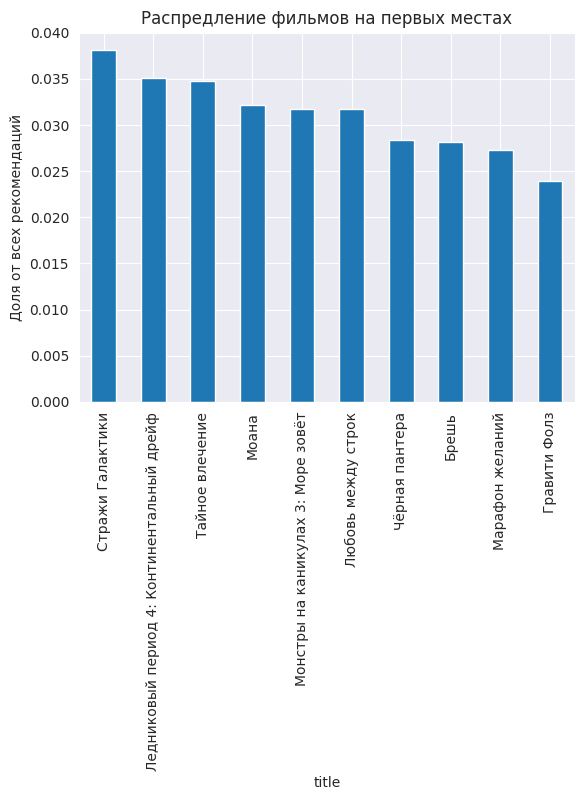

In [ ]:
first_items = pd.DataFrame([x[0] for x in val_recs_train["als_base_recs"].values], columns=["item_id"])
first_items = (
    first_items.merge(items_df[["item_id", "title"]], on="item_id").groupby("title").size().sort_values(ascending=False)
)
first_items /= first_items.sum()
first_items.head(10).plot(kind="bar")
plt.ylabel("–î–æ–ª—è –æ—Ç –≤—Å–µ—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π")
plt.title("–†–∞—Å–ø—Ä–µ–¥–ª–µ–Ω–∏–µ —Ñ–∏–ª—å–º–æ–≤ –Ω–∞ –ø–µ—Ä–≤—ã—Ö –º–µ—Å—Ç–∞—Ö")
plt.show()


In [ ]:
def get_similar_films(model, title, N=10):
    item_id = items_df[items_df["title"] == title]['item_id'].values[0]

    similar_encoded_ids = model.model.similar_items(
        model.item_encoder.transform([item_id]), N=N, filter_items=model.item_encoder.transform([item_id])
    )[0][0]
    similar_ids = model.item_encoder.inverse_transform(similar_encoded_ids)
    return items_df[items_df["item_id"].isin(similar_ids)]["title"]


In [ ]:
get_similar_films(als_base, "–°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏")

607                      –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å
2699                      –ö–∞–ø–∏—Ç–∞–Ω –ú–∞—Ä–≤–µ–ª
3061                      –î–æ–∫—Ç–æ—Ä –°—Ç—Ä—ç–Ω–¥–∂
3361     –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –ü—Ä–æ—Ç–∏–≤–æ—Å—Ç–æ—è–Ω–∏–µ
4376              –ú—Å—Ç–∏—Ç–µ–ª–∏: –≠—Ä–∞ –ê–ª—å—Ç—Ä–æ–Ω–∞
8525       –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –î—Ä—É–≥–∞—è –≤–æ–π–Ω–∞
8950                         –ú–æ—Ä—Å–∫–æ–π –±–æ–π
9903                                 –¢–æ—Ä
10537          –°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏. –ß–∞—Å—Ç—å 2
11377                         –¶–≤–µ—Ç–æ–∫ –∑–ª–∞
Name: title, dtype: object

In [ ]:
get_similar_films(als_base, "–õ–∞-–ª–∞ –ª–µ–Ω–¥")

410                  –ê—Ä–≤–µ–Ω—Ç—É—Ä
795            –£—Ç–∏–Ω—ã–µ –∏—Å—Ç–æ—Ä–∏–∏
1279      –í–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ –ë—É–¥—É–ª–∞—è
1538                 –ú–∞–ª–∞–≤–∏—Ç–∞
2628           –ü–æ—á—Ç–∏ –∑–Ω–∞–º–µ–Ω–∏—Ç
4881     –í –Ω–∞—á–∞–ª–µ —Å–ª–∞–≤–Ω—ã—Ö –¥–µ–ª
5223         –ö–æ—Ä–ø–æ—Ä–∞—Ü–∏—è ¬´–ï–¥–∞¬ª
9324                    –í—Ä–∞—á–∏
10337       –î–≤–æ–µ –≤–æ –í—Å–µ–ª–µ–Ω–Ω–æ–π
11138           –î—Ä—É–≥–æ–π –≤–∑–≥–ª—è–¥
Name: title, dtype: object

–°–æ "–°—Ç—Ä–∞–∂–∞–º–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏" –º–æ–¥–µ–ª—å —Å–ø—Ä–∞–≤–∏–ª–∞—Å—å –Ω–µ–ø–ª–æ—Ö–æ, –∞ –≤–æ—Ç "–£—Ç–∏–Ω—ã–µ –∏—Å—Ç–æ—Ä–∏–∏" –∏ "–õ–∞-–ª–∞ –ª–µ–Ω–¥" –º–∞–ª–æ –ø–æ—Ö–æ–∂–∏

—Ö–æ—á—É –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ø–æ–¥–æ–±—Ä–∞—Ç—å –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã. —Å—Ä–∞–≤–Ω–∏–≤–∞—Ç—å –±—É–¥—É –ø–æ recall, –ø–æ—Ç–æ–º—É —á—Ç–æ —Ö–æ—á—É –≤ –Ω–∞—á–∞–ª–µ —Ö–æ—Ç—è –±—ã –æ—Ç–±–∏—Ä–∞—Ç—å –≤ —Ç–æ–ø10 –∫–∞–∫ –º–æ–∂–Ω–æ –±–æ–ª—å—à–µ –ø–æ—Ö–æ–∂–∏—Ö

In [ ]:
factors = [2, 4, 8, 32, 64, 128, 256, 512]
iters = [1, 5, 10, 25]
regularizations = [1e-3, 1e-2, 1e-1, 0]

best_score = -1
best_model = None
best_params = dict()

history = []

train_users_df = val_recs[val_recs['user_id'].isin(train_users)]
val_recs_train = val_recs.loc[val_recs['user_id'].isin(train_users)].copy()

for factor in factors:
    for n_iters in iters:
        for reg in regularizations:
            als = ALS(factors=factor, iterations=n_iters, regularization=reg)
            als.fit(train_data)

            recs = als.predict(train_users_df)
            val_recs_train['recs'] = recs
            score = evaluate_recommender(val_recs_train, model_preds_col="recs")['recall']

            params = {
                'factors': factor,
                'iterations': n_iters,
                'regularization': reg,
            }

            history.append({'params': params, 'score': score})

            if score > best_score:
                best_score = score
                best_params = params
                best_model = als

            print('best pararms:', best_params)
            print('best score:', best_score)

            best_model.model.save('/content/drive/MyDrive/ml_tink/best_als_model')
            with open('/content/drive/MyDrive/ml_tink/history_als_model', 'wb') as f:
                np.save(f, np.array(history))

In [ ]:
history = []
with open('/content/drive/MyDrive/ml_tink/history_als_model', 'rb') as f:
      history = np.load(f, allow_pickle=True)

In [ ]:
best_score = 0
best_params = None
for val in history:
    if val['score'] > best_score:
        best_score = val['score']
        best_params = val['params']

print("best score:", best_score)
print('best params:', best_params)

best score: 0.06306749646638496
best params: {'factors': 2, 'iterations': 5, 'regularization': 0}


In [ ]:
als_base_tuned = ALS(factors=2, iterations=5, regularization=0, random_state=42)
als_base_tuned.fit(train_data)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
recs = als_base_tuned.predict(train_users_df)
val_recs_train['recs'] = recs
score = evaluate_recommender(val_recs_train, model_preds_col="recs")
print('als base tuned model, val score:', score)

predicting:   0%|          | 0/4509 [00:00<?, ?it/s]

als base tuned model, val score: {'ndcg': 0.13113836099615236, 'recall': 0.06171474261862113}


In [ ]:
train_test_users = np.intersect1d(train_data['user_id'].unique(), test_part['user_id'].values)
test_recs = als_base_tuned.predict(test_part[test_part['user_id'].isin(train_test_users)], to_filter=val_recs)
test_recs_train = test_part.loc[test_part['user_id'].isin(train_test_users)].copy()
test_recs_train['als_base_tuned_recs'] = test_recs
print('als base tuned model, test score:', evaluate_recommender(test_recs_train, model_preds_col="als_base_tuned_recs"))

predicting:   0%|          | 0/15474 [00:00<?, ?it/s]

als base tuned model, test score: {'ndcg': 0.1580153457309521, 'recall': 0.07096839799573373}


–ø–æ—Å–º–æ—Ç—Ä–∏–º –Ω–∞ —Ä–µ–∫–æ–º–º–µ–Ω–¥–∞—Ü–∏–∏ –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è 5915

In [ ]:
user = 5915
rec_movies = val_recs_train.loc[val_recs_train['user_id'] == user, 'recs'].values[0]
items_df.loc[items_df['item_id'].isin(rec_movies)]

item_id content_type                         title  \
158       4880       series                         –ê—Ñ–µ—Ä–∞   
572      15297       series               –ö–ª–∏–Ω–∏–∫–∞ —Å—á–∞—Å—Ç—å—è   
1429     10440       series                   –•—Ä—É—Å—Ç–∞–ª—å–Ω—ã–π   
4809      9728         film             –ì–Ω–µ–≤ —á–µ–ª–æ–≤–µ—á–µ—Å–∫–∏–π   
4921     13865         film                      –î–µ–≤—è—Ç–∞–µ–≤   
5064      4151       series        –°–µ–∫—Ä–µ—Ç—ã —Å–µ–º–µ–π–Ω–æ–π –∂–∏–∑–Ω–∏   
5522      9996       series                         –ù–µ–º—Ü—ã   
9137      3734         film  –ü—Ä–∞–±–∞–±—É—à–∫–∞ –ª–µ–≥–∫–æ–≥–æ –ø–æ–≤–µ–¥–µ–Ω–∏—è   
10305     2657       series                    –ü–æ–¥—Å–ª—É—à–∞–Ω–æ   
11506      142         film                          –ú–∞—à–∞   

                            title_orig  release_year  \
158                              Afera        2021.0   
572                  Klinika schast'ya        2021.0   
1429                      Khrustal'nyy        2021.0   
4809                      Wrath of Man        2021.0   
4921              V2. Escape from Hell        2021.0   
5064                               NaN        2021.0   
5522                            Nemtsy        2021.0   
9137   Prababushka lyogkogo povedeniya        2021.0   
10305                      Podslushano        2021.0   
11506                            Masha        2020.0   

                            genres            countries  for_kids  age_rating  \
158                        –∫–æ–º–µ–¥–∏–∏               –†–æ—Å—Å–∏—è       0.0        18.0   
572               –¥—Ä–∞–º—ã, –º–µ–ª–æ–¥—Ä–∞–º—ã               –†–æ—Å—Å–∏—è       0.0        18.0   
1429           —Ç—Ä–∏–ª–ª–µ—Ä—ã, –¥–µ—Ç–µ–∫—Ç–∏–≤—ã               –†–æ—Å—Å–∏—è       0.0        18.0   
4809             –±–æ–µ–≤–∏–∫–∏, —Ç—Ä–∏–ª–ª–µ—Ä—ã  –í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è, –°–®–ê       0.0        18.0   
4921   –¥—Ä–∞–º—ã, –≤–æ–µ–Ω–Ω—ã–µ, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è               –†–æ—Å—Å–∏—è       0.0        12.0   
5064                       –∫–æ–º–µ–¥–∏–∏               –†–æ—Å—Å–∏—è       0.0        18.0   
5522                         –¥—Ä–∞–º—ã               –†–æ—Å—Å–∏—è       0.0        16.0   
9137                       –∫–æ–º–µ–¥–∏–∏               –†–æ—Å—Å–∏—è       0.0        16.0   
10305              –¥—Ä–∞–º—ã, —Ç—Ä–∏–ª–ª–µ—Ä—ã               –†–æ—Å—Å–∏—è       0.0        16.0   
11506              –¥—Ä–∞–º—ã, —Ç—Ä–∏–ª–ª–µ—Ä—ã               –†–æ—Å—Å–∏—è       0.0        16.0   

      studios  ...                                        description  \
158       NaN  ...  –°–º–æ—Ç—Ä–∏:- –∫–∞–∫ –∫–∏–Ω–æ- –∫–∞–∫ —Å–µ—Ä–∏–∞–ª–ö–∞—Ä–∞–Ω—Ç–∏–Ω –æ–∫–æ–Ω—á–µ–Ω,...   
572       NaN  ...  –£—Å–ø–µ—à–Ω—ã–π —Å–µ–∫—Å–æ–ª–æ–≥ –ê–ª–µ–Ω–∞ —É–≤–µ—Ä–µ–Ω–∞, —á—Ç–æ –Ω–∞—à–ª–∞ —Ñ–æ—Ä...   
1429      NaN  ...  –°–µ—Ä–≥–µ–π –°–º–∏—Ä–Ω–æ–≤ ‚Äî –æ–¥–∏–Ω –∏–∑ –ª—É—á—à–∏—Ö ¬´–æ—Ö–æ—Ç–Ω–∏–∫–æ–≤ –Ω–∞ ...   
4809      NaN  ...  –ì—Ä—É–∑–æ–≤–∏–∫–∏ –ª–æ—Å-–∞–Ω–¥–∂–µ–ª–µ—Å—Å–∫–æ–π –∏–Ω–∫–∞—Å—Å–∞—Ç–æ—Ä—Å–∫–æ–π –∫–æ–º–ø...   
4921      NaN  ...  –í–æ–µ–Ω–Ω–æ-–∏—Å—Ç–æ—Ä–∏—á–µ—Å–∫–∏–π –±–ª–æ–∫–±–∞—Å—Ç–µ—Ä –æ—Ç —Ä–µ–∂–∏—Å—Å—ë—Ä–æ–≤ –¢...   
5064      NaN  ...  –£ –ù–∏–∫–∏—Ç—ã –∏ –ü–æ–ª–∏–Ω—ã –≤—Å—ë –Ω–∞—á–∏–Ω–∞–ª–æ—Å—å –ø—Ä–µ–∫—Ä–∞—Å–Ω–æ: –æ–±...   
5522      NaN  ...  –ù–∞ –∂—É—Ä–Ω–∞–ª–∏—Å—Ç–∞-–æ–ø–ø–æ–∑–∏—Ü–∏–æ–Ω–µ—Ä–∞ –ê–Ω—Ç–æ–Ω–∞ –≠–±–µ—Ä–≥–∞—Ä–¥–∞ —Å...   
9137      NaN  ...  1980 –≥–æ–¥, –≤—Å—è —Å—Ç—Ä–∞–Ω–∞ —Å–ª–µ–¥–∏—Ç –∑–∞ —Å–æ–±—ã—Ç–∏—è–º–∏ –º–æ—Å–∫–æ...   
10305     NaN  ...  –°–º–æ—Ç—Ä–∏:- –∫–∞–∫ –∫–∏–Ω–æ- –∫–∞–∫ —Å–µ—Ä–∏–∞–ª–ü–æ–¥—Ä–æ—Å—Ç–∫–æ–≤—ã–π –ø—Å–∏—Ö...   
11506     NaN  ...  13-–ª–µ—Ç–Ω—è—è –ú–∞—à–∞ —Ä–∞—Å—Ç—ë—Ç –º–µ–∂–¥—É –±–æ–∫—Å—ë—Ä—Å–∫–∏–º —Ä–∏–Ω–≥–æ–º ...   

                                                keywords cnt_users  \
158    –ê—Ñ–µ—Ä–∞, –ê—Ñ–µ—Ä–∏—Å—Ç—ã, –ö–∞—Ä–∞–Ω—Ç–∏–Ω, –ü–∞–Ω–¥–µ–º–∏—è, –ö–∞—Ä–∞–Ω—Ç–∏–Ω ...   13095.0   
572    –ö–ª–∏–Ω–∏–∫–∞ —Å—á–∞—Å—Ç—å—è, –ö–ª–∏–Ω–∏–∫–∞, –°—á–∞—Å—Ç—å–µ, –ö–ª–∏–Ω–∏–∫–∞ —Å—á–∞...   40997.0   
1429   —Ö—Ä—É—Å—Ç, —Ö—Ä—É—Å—Ç–∞–ª—å, —Ö—

–∫–∞–∂–µ—Ç—Å—è —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–∏ —Å—Ç–∞–ª–∏ –µ—â–µ —Ö—É–∂–µ, —á–µ–º —Å –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª—å—é

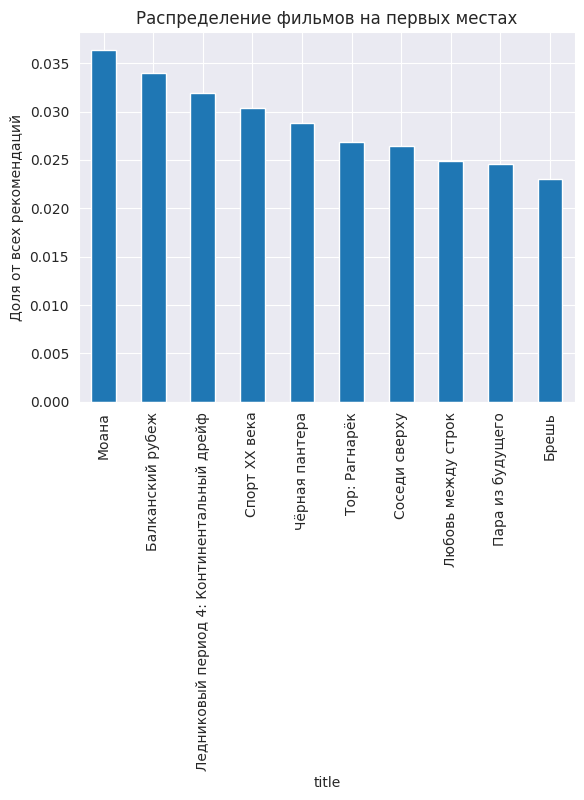

In [ ]:
first_items = pd.DataFrame([x[0] for x in val_recs_train["als_base_recs"].values], columns=["item_id"])
first_items = (
    first_items.merge(items_df[["item_id", "title"]], on="item_id").groupby("title").size().sort_values(ascending=False)
)
first_items /= first_items.sum()
first_items.head(10).plot(kind="bar")
plt.ylabel("–î–æ–ª—è –æ—Ç –≤—Å–µ—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π")
plt.title("–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —Ñ–∏–ª—å–º–æ–≤ –Ω–∞ –ø–µ—Ä–≤—ã—Ö –º–µ—Å—Ç–∞—Ö")
plt.show()


In [ ]:
get_similar_films(als_base_tuned, "–°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏")

868                                       –í–µ–∑—É—á–∞—è
1858                                  –î–∏—Ç—è —Ä–æ–±–æ—Ç–∞
4654                            –î–∂–∏–ø–µ—Ä—Å –ö—Ä–∏–ø–µ—Ä—Å 3
5064                       –°–µ–∫—Ä–µ—Ç—ã —Å–µ–º–µ–π–Ω–æ–π –∂–∏–∑–Ω–∏
5392                          –ë–æ–ª—å—à–æ–µ –ø—É—Ç–µ—à–µ—Å—Ç–≤–∏–µ
6557                          –ü–µ—Ç–µ—Ä–±—É—Ä–≥—Å–∫–∏–µ —Ç–∞–π–Ω—ã
10764              ¬´–î–∏–∫–∞—è –ú—è—Ç–∞¬ª. –û–Ω–ª–∞–π–Ω-—Ñ–µ—Å—Ç–∏–≤–∞–ª—å
10870                                 –ü–æ–∑–∞ –ª–æ—Ç–æ—Å–∞
10927                                 –ñ–∏–≤–æ–π —Ç–æ–≤–∞—Ä
11546    –ë–µ–≥—É—â–∏–π –≤ –ª–∞–±–∏—Ä–∏–Ω—Ç–µ: –õ–µ–∫–∞—Ä—Å—Ç–≤–æ –æ—Ç —Å–º–µ—Ä—Ç–∏
Name: title, dtype: object

In [ ]:
get_similar_films(als_base_tuned, "–õ–∞-–ª–∞ –ª–µ–Ω–¥")

3155                               –í—Å—è –Ω–∞—à–∞ –Ω–∞–¥–µ–∂–¥–∞
3574                       –°–µ–ª—Ñ–∏. –•–∞–æ—Å –∏ —Ç–≤–æ—Ä—á–µ—Å—Ç–≤–æ
3693                                       –ü–∞—Ä–∞–Ω–æ–π—è
3977                               –ë–µ–∑ –æ–±—è–∑–∞—Ç–µ–ª—å—Å—Ç–≤
6927     –í –≤–∏–Ω–Ω–æ–º –æ—Ç—Ä–∞–∂–µ–Ω–∏–∏ (—Å —Ä—É—Å—Å–∫–∏–º–∏ —Å—É–±—Ç–∏—Ç—Ä–∞–º–∏)
7978                            –£ —Ä–µ–∫–∏ –¥–≤–∞ –±–µ—Ä–µ–≥–∞ 2
8281                              –†–µ–π—Å –≤ –æ–¥–∏–Ω –∫–æ–Ω–µ—Ü
8832                             –°–∫—Ä—é—á–µ–Ω–Ω—ã–π –¥–æ–º–∏—à–∫–æ
9745                                   –ó–∞–∫—Ä–æ–π –≥–ª–∞–∑–∞
10853                                –î—Ä—É–≥–∞—è –∂–µ–Ω—â–∏–Ω–∞
Name: title, dtype: object

In [ ]:
# to do: –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –∫–∞–∫ —á–∞—Å—Ç–æ —Å–æ–≤–µ—Ç—É–µ–º –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∞–π—Ç–µ–º—ã

In [ ]:
val_recs_train['als_base_recs']
top100movies

In [ ]:
top100movies

Int64Index([15297, 10440, 13865,  9728,  4151,  3734,  2657,   142,  6809,
             4880,  4740,  8636, 11237,  1844,  7571,  9996, 12995, 14741,
            14431,  4457,  7417, 14703,  4495,  4436,   849,  7102,  5658,
            13018,  7107, 12192, 11778,  1819,  7626, 12173, 14470,   101,
             1132, 12981, 10464,  3935, 16166,  9169,  1916, 14317, 11310,
            12463,  3076,  7829, 12501,  6402, 14901, 16228,   657, 16361,
            15464,  3182,  9194,  1287, 12324, 10772,  5693, 10942,  6626,
            13915, 14359, 14461, 10077, 15531,  8447,  8373, 12770,  8618,
             1449,  5424, 11754,  1785, 11640,  5287,  5732, 12743,  4382,
             6443,  6192,  5250,  7582, 12841, 15915, 10761,  5411,  7210,
             3071, 16270,  5803, 10436,    14,    24, 13243,  1554,  6455,
             1053],
           dtype='int64')

In [ ]:
top100movies_in_recs = dict()
for recs in val_recs_train['als_base_recs'].values:
    for rec in recs:
        if rec in top100movies:
            if rec in top100movies_in_recs:
                top100movies_in_recs[rec] += 1
            else:
                top100movies_in_recs[rec] = 1

In [ ]:
top100movies_als_base_stats = []
for movie in top100movies:
    if movie in top100movies_in_recs:
        top100movies_als_base_stats.append((movie, top100movies_in_recs[movie] / len(val_recs_train)))
top100movies_als_base_stats[:10]

[(15297, 0.005988023952095809),
 (10440, 0.026169882457307607),
 (13865, 0.015746285207363053),
 (9728, 0.004879130627633622),
 (4151, 0.009536482590374805),
 (3734, 0.023730317143490796),
 (2657, 0.021956087824351298),
 (142, 0.009314703925482368),
 (6809, 0.010201818585052118),
 (4880, 0.018851186515857175)]

In [ ]:
top100movies_in_tuned_recs = dict()
for recs in val_recs_train['recs'].values:
    for rec in recs:
        if rec in top100movies:
            if rec in top100movies_in_tuned_recs:
                top100movies_in_tuned_recs[rec] += 1
            else:
                top100movies_in_tuned_recs[rec] = 1

top100movies_als_base_tuned_stats = []
for movie in top100movies:
    if movie in top100movies_in_tuned_recs:
        top100movies_als_base_tuned_stats.append((movie, top100movies_in_tuned_recs[movie] / len(val_recs_train)))
top100movies_als_base_tuned_stats[:10]

[(15297, 0.5555555555555556),
 (10440, 0.8966511421601242),
 (13865, 0.8664892437347527),
 (9728, 0.8673763583943225),
 (4151, 0.9441117764471058),
 (3734, 0.9270348192503881),
 (2657, 0.9580838323353293),
 (142, 0.9631847416278554),
 (6809, 0.18984253714792637),
 (4880, 0.9534264803725881)]

**–≤—ã–≤–æ–¥:**

–ø–æ—Å–ª–µ —Ç—é–Ω–∞ —Å—Ç–∞–ª–∏ –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –±–æ–ª–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Ñ–∏–ª—å–º—ã, –ø–æ—ç—Ç–æ–º—É —Å–∫–æ—Ä —Å–ª–µ–≥–∫–∞ –ø–æ–¥—Ä–æ—Å –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏, –Ω–æ –≤–µ—Ä–æ—è—Ç–Ω–æ –∏–∑-–∑–∞ —Ç–æ–≥–æ, —á—Ç–æ –≤ –∑–∞—Ç—é–Ω–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏ —Ç–æ–ª—å–∫–æ –¥–≤–∞ –ª–∞—Ç–µ–Ω—Ç–Ω—ã—Ö —Ñ–∞–∫—Ç–æ—Ä–∞, –º–æ–¥–µ–ª–∏ –Ω–µ —É–¥–∞–µ—Ç—Å—è –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞—Ç—å –±–æ–ª–µ–µ –∏–Ω–¥–∏–≤–∏–¥—É–∞–ª—å–Ω—ã–µ –ø–æ—Ö–æ–∂–∏–µ, –∞ –æ–Ω–∞ –ø—Ä–æ—Å—Ç–æ —É—Ö–∞–¥–∏—Ç –≤ —Å–∞–º–æ–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ–µ. —É –±–∞–∑–æ–≤–æ–π –º–æ–¥–µ–ª–∏ —Å–æ —Å—Ç–∞ –ª–∞—Ç–µ–Ω—Ç—ã–º–∏ —Ñ–∞–∫—Ç–æ—Ä–∞–º–∏ —É–¥–∞–µ—Ç—Å—è –Ω–∞—Ö–æ–¥–∏—Ç—å –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –±–æ–ª–µ–µ –ø–æ—Ö–æ–∂–∏–µ –∞–π—Ç–µ–º—ã, –Ω–æ –∏–∑-–∑–∞ –±–æ–ª—å—à–æ–≥–æ –∫–æ–ª-–≤–∞ —Ñ–∏–ª—å–º–æ–≤ –∏ –º–∞–ª–µ–Ω—å–∫–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ –ø—Ä–æ—Å–∞–∂–∏–≤–∞–µ—Ç—Å—è –∑–Ω–∞—á–µ–Ω–∏–µ –º–µ—Ç—Ä–∏–∫–∏

—è –¥—É–º–∞—é –¥–∞–ª–µ–∫–æ —Ç–æ–ª—å–∫–æ –Ω–∞ –æ–¥–Ω–æ–π –º–æ–¥–µ–ª–∏ ALS –Ω–µ —É–µ–¥–µ—à—å, –∏ –µ—â–µ —Å–µ–π—á–∞—Å –º–Ω–µ –∫–∞–∂–µ—Ç—Å—è –±–æ–ª—å—à–∏–º —É–ø—É—â–µ–Ω–∏–µ–º –Ω–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –∫—É—á—É –¥–∞–Ω–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∏ —Ñ–∏–ª—å–º–æ–≤, –∞ —Ñ–æ–∫—É—Å–∏—Ä–æ–≤–∞—Ç—å—Å—è —Ç–æ–ª—å–∫–æ –Ω–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–∞—Ö, –∫–æ—Ç–æ—Ä—ã–µ –Ω–µ—Å—É—Ç –º–∞–ª–æ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–∏

—è —Ö–æ—á—É –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –¥–≤—É—Ö —Å—Ç—É–ø–µ–Ω—á–∞—Ç—É—é –º–æ–¥–µ–ª—å. –Ω–∞ –ø–µ—Ä–≤–æ–º —ç—Ç–∞–ø–µ –æ–±—É—á–∏–º –º–æ–¥–µ–ª—å, –∫–æ—Ç–æ—Ä–∞—è –±—É–¥–µ—Ç –ø–æ–∫–∞–∑—ã–≤–∞—Ç—å –ø–æ—Ö–æ–∂–µ—Å—Ç—å –∞–π—Ç–µ–º–æ–≤. –≤ –∏—Ç–æ–≥–µ –ø–æ–ª—É—á–∏–º –≤–µ–∫—Ç–æ—Ä–∞ –∞–π—Ç–µ–º–æ–≤ - –∏—Ö –º–æ–∂–Ω–æ –≤–∑—è—Ç—å –∏–ª–∏ –∏–∑ ALS, –∏–ª–∏ –º–æ–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –æ–±—É—á–∏—Ç implicit knn.

–¥–∞–ª–µ–µ –Ω–∞ –≤—Ç–æ—Ä–æ–º —ç—Ç–∞–ø–µ –æ–±—É—á–∏–º –∫–∞—Ç–±—É—Å—Ç –Ω–∞ tupels (—é–∑–µ—Ä, –∞–π—Ç–µ–º, –∏ –≤—Å–ø–æ–º–æ–≥–∞—Ç–µ–ª—å–Ω—ã–µ –¥–∞–Ω–Ω—ã–µ) –Ω–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ —é–∑–µ—Ä –ø–æ—Å–º–æ—Ç—Ä–∏—Ç –¥–∞–Ω–Ω—ã–π –∞–π—Ç–µ–º. –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã–π –∫–∞–Ω–¥–∏–¥–æ—Ç–æ–≤ –º–æ–∂–Ω–æ –±—Ä–∞—Ç—å –∏–∑ –ø–µ—Ä–≤–æ–≥–æ —ç—Ç–∞–ø–∞ –æ—Ç—Å–µ–∫–∞—è –ø–æ –∫–æ—Å–∏–Ω—É—Å—É –º–µ–∂–¥—É –≤–µ–∫—Ç–æ—Ä–∞–º–∏ —é–∑–µ—Ä–∞ –∏ –∞–π—Ç–µ–º–∞, –∞ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã–µ –Ω–∞—Å—Å–µ–º–ø–ª–∏—Ä–æ–≤–∞—Ç—å –∏–∑ —Ç–æ–≥–æ, —á—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å —Ç–æ—á–Ω–æ –Ω–µ –±—É–¥–µ—Ç —Å–º–æ—Ç—Ä–µ—Ç—å


### —Ä–∞–∑–±–∏–µ–Ω–∏–µ –Ω–∞ —Ç—Ä–µ–π–Ω –¥–ª—è –¥–≤—É—Ö —ç—Ç–∞–ø–æ–≤

—Å–¥–µ–ª–∞–µ–º —Ç–∞–∫–æ–µ —Ä–∞–∑–±–∏–µ–Ω–∏–µ:
- 1 –Ω–µ–¥–µ–ª—è —Å –∫–æ–Ω—Ü–∞ (–ø–æ—Å–ª–µ–¥–Ω—è—è) - –≤–∞–ª–∏–¥–∞—Ü–∏—è
- 2 –∏ 3 –Ω–µ–¥–µ–ª–∏ —Å –∫–æ–Ω—Ü–∞ - –æ–±—É—á–µ–Ω–∏–µ –±—É—Å—Ç–∏–Ω–≥–∞
- 4 –Ω–µ–¥–µ–ª—è —Å –∫–æ–Ω—Ü–∞ - –≤–∞–ª–∏–¥–∞—Ü–∏–∏ 1-–æ–≥–æ —ç—Ç–∞–ø–∞
- 5 –∏ –¥–∞–ª–µ–µ - –æ–±—É—á–µ–Ω–∏–µ item-item

In [ ]:
train2 = train_part.loc[train_part['last_watch_dt'].isin(dates[-21:-7])].copy()
len(train2)

188015

In [ ]:
print('–∫–æ–ª–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–º —Ñ–∏–ª—å–º–æ–≤ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∑–∞ 2 –∏ 3 –Ω–µ–¥–µ–ª—é —Å –∫–æ–Ω—Ü–∞')
cnt_items = train2.loc[train2['watched_pct'] > 0].groupby('user_id')['item_id'].count().reset_index().rename(columns={'item_id': 'cnt'}).sort_values('cnt')
cnt_items['cnt'].value_counts(normalize=True)[:21]

–∫–æ–ª–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–º —Ñ–∏–ª—å–º–æ–≤ –Ω–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∑–∞ 2 –∏ 3 –Ω–µ–¥–µ–ª—é —Å –∫–æ–Ω—Ü–∞


1     0.663481
2     0.187772
3     0.073708
4     0.032603
5     0.017239
6     0.009874
7     0.005367
8     0.003216
9     0.001946
10    0.001454
11    0.000830
12    0.000645
13    0.000533
14    0.000328
16    0.000236
15    0.000205
18    0.000082
20    0.000072
19    0.000072
17    0.000061
22    0.000051
Name: cnt, dtype: float64

In [ ]:
val_data = train_part.loc[train_part['last_watch_dt'].isin(dates[-28:-21])]
val_recs1 = val_data[val_data['watched_pct'] > 0].groupby('user_id')['item_id'].apply(list).reset_index(name='ground_truth')
val_recs1['len'] = val_recs1['ground_truth'].apply(lambda x: len(x))
val_recs1 = val_recs1.loc[val_recs1['len'] >= 3]
print('—Å—Ä–µ–¥–Ω–µ–µ –æ—Ç–∫—Ä—ã—Ç—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏ —Ñ–∏–ª—å–º–æ–≤', np.mean(val_recs1['len']))
print('–∫–æ–ª-–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π', len(val_recs1))

—Å—Ä–µ–¥–Ω–µ–µ –æ—Ç–∫—Ä—ã—Ç—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏ —Ñ–∏–ª—å–º–æ–≤ 3.9176493710691824
–∫–æ–ª-–≤–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π 5088


In [ ]:
val_recs1['len'].value_counts()

3     2955
4     1106
5      489
6      230
7      126
8       68
9       39
10      19
11      17
13       8
12       7
16       6
14       5
15       2
19       2
17       2
18       1
36       1
29       1
20       1
61       1
22       1
23       1
Name: len, dtype: int64

In [ ]:
train1 = train_part.loc[train_part['last_watch_dt'].isin(dates[:-28])]

### 1 —ç—Ç–∞–ø

**als**

In [ ]:
als = ALS()
als.fit(train1)

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
intersect_train_val_users1 = np.intersect1d(train1['user_id'].unique(), val_recs1['user_id'].values)
print(len(intersect_train_val_users1))

3497


In [ ]:
recs = als.predict(val_recs1[val_recs1['user_id'].isin(intersect_train_val_users1)])
intersect_train_val_recs1 = val_recs1.loc[val_recs1['user_id'].isin(intersect_train_val_users1)].copy()
intersect_train_val_recs1['als'] = recs
print('val score:', evaluate_recommender(intersect_train_val_recs1, model_preds_col="als"))

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

val score: {'ndcg': 0.038716527280013305, 'recall': 0.016919942209476093}


In [ ]:
get_similar_films(als, "–°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏")

607                      –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å
2517                  –ñ–µ–ª–µ–∑–Ω—ã–π —á–µ–ª–æ–≤–µ–∫ 2
3361     –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –ü—Ä–æ—Ç–∏–≤–æ—Å—Ç–æ—è–Ω–∏–µ
4376              –ú—Å—Ç–∏—Ç–µ–ª–∏: –≠—Ä–∞ –ê–ª—å—Ç—Ä–æ–Ω–∞
4683                     –ß–µ–ª–æ–≤–µ–∫-–º—É—Ä–∞–≤–µ–π
8525       –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –î—Ä—É–≥–∞—è –≤–æ–π–Ω–∞
9795                  –ñ–µ–ª–µ–∑–Ω—ã–π —á–µ–ª–æ–≤–µ–∫ 3
9903                                 –¢–æ—Ä
10537          –°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏. –ß–∞—Å—Ç—å 2
10584                   –ñ–µ–ª–µ–∑–Ω—ã–π —á–µ–ª–æ–≤–µ–∫
Name: title, dtype: object

In [ ]:
get_similar_films(als, "–õ–∞-–ª–∞ –ª–µ–Ω–¥")

134                               –ë–∞—Å—Ç–∞—Ä–¥
3507             –î–æ–±—Ä–æ –ø–æ–∂–∞–ª–æ–≤–∞—Ç—å –≤ –ö–∏—Ç–∞–π
3886                         –£–¥–æ–≤–æ–ª—å—Å—Ç–≤–∏–µ
5384                   –û—Å—Ç–∞–Ω–µ–º—Å—è –¥—Ä—É–∑—å—è–º–∏
6142                      –ò–≥—Ä–∞ –±–µ–∑ –ø—Ä–∞–≤–∏–ª
7144              –ê–ø–æ–∫–∞–ª–∏–ø—Å–∏—Å –°—Ç–æ—É–Ω—Ö–µ–Ω–¥–∂–∞
7296                   –ò—Å–∫—É—Å—Å—Ç–≤–æ –º–æ–ª—á–∞–Ω–∏—è
8329                 –ü—Ä–µ–ö—Ä–∞—Å–Ω–∞—è –®–∞–ø–æ—á–∫–∞ 3
10252    –ö–∞—Ç–∞—Å—Ç—Ä–æ—Ñ–∞ –Ω–∞ –î–µ–Ω—å –Ω–µ–∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏
10664                              –°–∏—Ä–µ–Ω–∞
Name: title, dtype: object

**als with watch percantege > 0**

In [ ]:
als_small = ALS()
als_small.fit(train1.loc[train1['watched_pct'] > 0])

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
intersect_train_val_users1 = np.intersect1d(train1.loc[train1['watched_pct'] > 0, 'user_id'].unique(), val_recs1['user_id'].values)
print('cnt intercect users in train1 and val1', len(intersect_train_val_users1))

recs = als_small.predict(val_recs1[val_recs1['user_id'].isin(intersect_train_val_users1)])
intersect_train_val_recs1 = val_recs1.loc[val_recs1['user_id'].isin(intersect_train_val_users1)].copy()
intersect_train_val_recs1['als_small'] = recs
print('val score on als with watched percentage filter:', evaluate_recommender(intersect_train_val_recs1, model_preds_col="als_small"))

cnt intercect users in train1 and val1 3415


predicting:   0%|          | 0/3415 [00:00<?, ?it/s]

val score on als with watched percentage filter: {'ndcg': 0.03627327124695024, 'recall': 0.015124961635768083}


In [ ]:
get_similar_films(als_small, "–°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏")

607                      –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å
3061                      –î–æ–∫—Ç–æ—Ä –°—Ç—Ä—ç–Ω–¥–∂
3361     –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –ü—Ä–æ—Ç–∏–≤–æ—Å—Ç–æ—è–Ω–∏–µ
4683                     –ß–µ–ª–æ–≤–µ–∫-–º—É—Ä–∞–≤–µ–π
5305             –õ—é–¥–∏ –ò–∫—Å: –¢—ë–º–Ω—ã–π –§–µ–Ω–∏–∫—Å
6631                               –ß—É–∂–∏–µ
8525       –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –î—Ä—É–≥–∞—è –≤–æ–π–Ω–∞
9795                  –ñ–µ–ª–µ–∑–Ω—ã–π —á–µ–ª–æ–≤–µ–∫ 3
9903                                 –¢–æ—Ä
10537          –°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏. –ß–∞—Å—Ç—å 2
Name: title, dtype: object

In [ ]:
get_similar_films(als_small, "–õ–∞-–ª–∞ –ª–µ–Ω–¥")

134                                             –ë–∞—Å—Ç–∞—Ä–¥
645      –ò–∑–æ–±—Ä–µ—Ç–∞—Ç–µ–ª—å: –ñ–∞–∂–¥–∞ –∫—Ä–æ–≤–∏ –≤ –°–∏–ª–∏–∫–æ–Ω–æ–≤–æ–π –¥–æ–ª–∏–Ω–µ
5120                                             –°—Ç—Ä–∞–π–∫
6002                                            –ö—É–∫–æ–ª–∫–∞
8074                                           –ù–∞ –≥—Ä–∞–Ω–∏
8096                            [4K] –ù–∞ –≥–ª—É–±–∏–Ω–µ 6 —Ñ—É—Ç–æ–≤
8675                              –í–æ–∑–≤—Ä–∞—â–µ–Ω–∏–µ —Ä–µ–∑–∏–¥–µ–Ω—Ç–∞
9307                                             –•–∞–Ω–¥—Ä–∞
9706                               –≠–¥–µ–º. –†–∞–π—Å–∫–∏–π –æ—Å—Ç—Ä–æ–≤
10168                       –° –ª—é–±–∏–º—ã–º–∏ –Ω–µ —Ä–∞—Å—Å—Ç–∞–≤–∞–π—Ç–µ—Å—å
Name: title, dtype: object

**item item cosine dist**

In [ ]:
from implicit.nearest_neighbours import CosineRecommender, TFIDFRecommender, BM25Recommender

In [ ]:
class CosineModel(BaseRecommender):
    # –∑–¥–µ—Å—å –≤—ã–Ω–µ—Å–µ–Ω—ã —Ç–æ–ª—å–∫–æ –æ—Å–Ω–æ–≤–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏, –≤—Å–µ –≤—ã –º–æ–∂–µ—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏
    def __init__(self, k: int = 20, **kwargs) -> None:
        super().__init__()
        self.model = CosineRecommender(K=k)
        self.trained = False

    def fit(
        self, df: pd.DataFrame, item_col: str = "item_id", user_col: str = "user_id", value_col: str = None
    ) -> None:
        self.user_encoder = LabelEncoder()
        self.item_encoder = LabelEncoder()
        user_ids = self.user_encoder.fit_transform(df[user_col])
        item_ids = self.item_encoder.fit_transform(df[item_col])
        if value_col is None:
            counts = np.ones(len(df))
        else:
            counts = df[value_col].values

        matrix_shape = len(self.user_encoder.classes_), len(self.item_encoder.classes_)

        self.sparse = csr_matrix((counts, (user_ids, item_ids)), shape=matrix_shape)
        self.model.fit(self.sparse)

        self.trained = True

    def predict(self, df: pd.DataFrame, topn: int = 10, to_filter: pd.DataFrame = None) -> List[np.ndarray]:
        assert self.trained

        all_recs = []

        users = self.user_encoder.transform(df["user_id"])
        for user in tqdm(users, desc="predicting", leave=False):
            to_filter_items = None
            if to_filter is not None and len(to_filter) > 0:
                orig_user = self.user_encoder.inverse_transform([user])[0]
                vals = to_filter.loc[to_filter['user_id'] == orig_user, 'ground_truth'].values
                if len(vals) > 0:
                    vals = np.intersect1d(vals[0], self.item_encoder.classes_)
                    to_filter_items = self.item_encoder.transform(vals)
            encoded_rec_items = self.model.recommend(user, user_items=self.sparse[user], N=topn, filter_items=to_filter_items)[0]
            all_recs.append(self.item_encoder.inverse_transform(encoded_rec_items))

        return all_recs

In [ ]:
cosine_model = CosineModel()
cosine_model.fit(train1)

/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008396387100219727 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

In [ ]:
intersect_train_val_users1 = np.intersect1d(train1['user_id'].unique(), val_recs1['user_id'].values)
print('cnt intercect users in train1 and val1', len(intersect_train_val_users1))

recs = cosine_model.predict(val_recs1[val_recs1['user_id'].isin(intersect_train_val_users1)])
intersect_train_val_recs1 = val_recs1.loc[val_recs1['user_id'].isin(intersect_train_val_users1)].copy()
intersect_train_val_recs1['cos_recs'] = recs
print('val score on als with watched percentage filter:', evaluate_recommender(intersect_train_val_recs1, model_preds_col="cos_recs"))

cnt intercect users in train1 and val1 3497


predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

val score on als with watched percentage filter: {'ndcg': 0.09258932422398422, 'recall': 0.04629290355602563}


In [ ]:
get_similar_films(cosine_model, "–°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏")

607                                –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å
1248                                      –ú—Å—Ç–∏—Ç–µ–ª–∏
3061                                –î–æ–∫—Ç–æ—Ä –°—Ç—Ä—ç–Ω–¥–∂
3361               –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –ü—Ä–æ—Ç–∏–≤–æ—Å—Ç–æ—è–Ω–∏–µ
4683                               –ß–µ–ª–æ–≤–µ–∫-–º—É—Ä–∞–≤–µ–π
5605                             –¢–æ—Ä: –¶–∞—Ä—Å—Ç–≤–æ —Ç—å–º—ã
6262     –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π —Å–æ–ª–¥–∞—Ç 3: –ù–µ–æ–∫–æ–Ω—á–µ–Ω–Ω–æ–µ –¥–µ–ª–æ
8115                 –ú—Å—Ç–∏—Ç–µ–ª–∏: –í–æ–π–Ω–∞ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏
8525                 –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –î—Ä—É–≥–∞—è –≤–æ–π–Ω–∞
10537                    –°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏. –ß–∞—Å—Ç—å 2
Name: title, dtype: object

In [ ]:
get_similar_films(cosine_model, "–õ–∞-–ª–∞ –ª–µ–Ω–¥")

2347                        –î–µ–∂–∞ –≤—é
2960                        –î–µ–≤–æ—á–∫–∞
3221           –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π —Å–æ–ª–¥–∞—Ç
7296             –ò—Å–∫—É—Å—Å—Ç–≤–æ –º–æ–ª—á–∞–Ω–∏—è
8139     –ß–∏–∫–∞–≥—Å–∫–∞—è –ø–µ—á–∞—Ç–Ω–∞—è –º–∞—à–∏–Ω–∫–∞
8985                  –î–Ω–µ–≤–Ω–æ–π –ø–æ–µ–∑–¥
9198                 –ë–æ–ª—å—à–∞—è –ª—é–±–æ–≤—å
9371                   –°–Ω–µ–≥ –∏ –ø–µ–ø–µ–ª
10513                        –†–æ–¥–∏–Ω–∞
11339                –î–µ—Ç—Å—Ç–≤–æ –ª–∏–¥–µ—Ä–∞
Name: title, dtype: object

—ç—Ç–∞ –º–æ–¥–µ–ª—å –Ω–∞ –ø–æ —Å–∫–æ—Ä—É –∏ –¥–≤—É–º –ø—Ä–∏–º–µ—Ä–∞–º –ø–æ—Ö–æ–∂–∏—Ö —Ñ–∏–ª—å–º–æ–≤ –¥–∞–µ—Ç –Ω–∞–¥–µ–∂–¥—É

–ø–æ—Å–º–æ—Ç—Ä–∏–º, –∫–∞–∫ —á–∞—Å—Ç–æ —Ä–µ–∫–æ–º–µ–Ω–¥—É—é—Ç—Å—è –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Ñ–∏–ª—å–º—ã

In [ ]:
top100movies_in_cos_model = dict()
for recs in intersect_train_val_recs1['cos_recs'].values:
    for rec in recs:
        if rec in top100movies:
            if rec in top100movies_in_cos_model:
                top100movies_in_cos_model[rec] += 1
            else:
                top100movies_in_cos_model[rec] = 1

top100movies_cos_model_stats = []
for movie in top100movies:
    if movie in top100movies_in_cos_model:
        top100movies_cos_model_stats.append((movie, top100movies_in_cos_model[movie] / len(intersect_train_val_recs1)))
top100movies_cos_model_stats[:10]

[(15297, 0.18530168716042322),
 (10440, 0.2739490992279096),
 (13865, 0.2610809265084358),
 (9728, 0.1975979410923649),
 (4151, 0.24077780955104375),
 (3734, 0.1721475550471833),
 (2657, 0.11752931083786103),
 (142, 0.26251072347726623),
 (6809, 0.009436659994280812),
 (4880, 0.24306548470117242)]

–≤ —Ü–µ–ª–æ–º, –∑–Ω–∞—á–µ–Ω–∏—è –Ω–µ —Ç–∞–∫–∏–µ –∫—Ä–∏—Ç–∏—á–Ω—ã–µ, –∫–∞–∫ —Å –∑–∞—Ç—é–Ω–µ–Ω–Ω–æ–π ALS

In [ ]:
ks = [1, 3, 5, 7, 10, 15, 20]

best_k = None
best_model = None
best_score = -1
history = []

for k in tqdm(ks):
    model = CosineModel(k)
    model.fit(train1)

    recs = model.predict(val_recs1[val_recs1['user_id'].isin(intersect_train_val_users1)])
    intersect_train_val_recs1['recs'] = recs

    score = evaluate_recommender(intersect_train_val_recs1, model_preds_col="recs")['recall']

    history.append({'k': k, 'score': score})

    if score > best_score:
        best_score = score
        best_k = k
        best_model = model

    print('k:', k, "cur score:", score)
    print('best k:', best_k, "best score:", best_score)

    best_model.model.save('/content/drive/MyDrive/ml_tink/best_cosine_model')
    with open('/content/drive/MyDrive/ml_tink/history_cosine_model', 'wb') as f:
        np.save(f, np.array(history))

  0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.009262561798095703 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 1 cur score: 0.0
best k: 1 best score: 0.0


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.010119199752807617 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 3 cur score: 0.0229404136097268
best k: 3 best score: 0.0229404136097268


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.010303974151611328 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 5 cur score: 0.03453903343658166
best k: 5 best score: 0.03453903343658166


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.009816408157348633 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 7 cur score: 0.03857839266736548
best k: 7 best score: 0.03857839266736548


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008946657180786133 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 10 cur score: 0.04425091415344144
best k: 10 best score: 0.04425091415344144


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.00831460952758789 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 15 cur score: 0.04581571972882752
best k: 15 best score: 0.04581571972882752


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.010992288589477539 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 20 cur score: 0.04629290355602563
best k: 20 best score: 0.04629290355602563


In [ ]:
print('best k:', best_k, "best score:", best_score)

best k: 20 best score: 0.04629290355602563


**tf idf recommender**

In [ ]:
class TFIDFModel(BaseRecommender):
    # –∑–¥–µ—Å—å –≤—ã–Ω–µ—Å–µ–Ω—ã —Ç–æ–ª—å–∫–æ –æ—Å–Ω–æ–≤–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏, –≤—Å–µ –≤—ã –º–æ–∂–µ—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏
    def __init__(self, k: int = 20, **kwargs) -> None:
        super().__init__()
        self.model = TFIDFRecommender(K=k)
        self.trained = False

    def fit(
        self, df: pd.DataFrame, item_col: str = "item_id", user_col: str = "user_id", value_col: str = None
    ) -> None:
        self.user_encoder = LabelEncoder()
        self.item_encoder = LabelEncoder()
        user_ids = self.user_encoder.fit_transform(df[user_col])
        item_ids = self.item_encoder.fit_transform(df[item_col])
        if value_col is None:
            counts = np.ones(len(df))
        else:
            counts = df[value_col].values

        matrix_shape = len(self.user_encoder.classes_), len(self.item_encoder.classes_)

        self.sparse = csr_matrix((counts, (user_ids, item_ids)), shape=matrix_shape)
        self.model.fit(self.sparse)

        self.trained = True

    def predict(self, df: pd.DataFrame, topn: int = 10, to_filter: pd.DataFrame = None) -> List[np.ndarray]:
        assert self.trained

        all_recs = []

        users = self.user_encoder.transform(df["user_id"])
        for user in tqdm(users, desc="predicting", leave=False):
            to_filter_items = None
            if to_filter is not None and len(to_filter) > 0:
                orig_user = self.user_encoder.inverse_transform([user])[0]
                vals = to_filter.loc[to_filter['user_id'] == orig_user, 'ground_truth'].values
                if len(vals) > 0:
                    vals = np.intersect1d(vals[0], self.item_encoder.classes_)
                    to_filter_items = self.item_encoder.transform(vals)
            encoded_rec_items = self.model.recommend(user, user_items=self.sparse[user], N=topn, filter_items=to_filter_items)[0]
            all_recs.append(self.item_encoder.inverse_transform(encoded_rec_items))

        return all_recs

In [ ]:
ks = [10, 15, 20] # –Ω–∞–¥–æ 10 —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π, –ø–æ—ç—Ç–æ–º—É –ª—É—á—à–µ –±—Ä–∞—Ç—å –∫–∞–∫ –º–∏–Ω–∏–º—É–º 10 —Å–æ—Å–µ–¥–µ–π

best_k = None
best_tfidf_model = None
best_score = -1
tfidf_history = []

for k in tqdm(ks):
    model = TFIDFModel(k)
    model.fit(train1)

    recs = model.predict(val_recs1[val_recs1['user_id'].isin(intersect_train_val_users1)])
    intersect_train_val_recs1['recs'] = recs

    score = evaluate_recommender(intersect_train_val_recs1, model_preds_col="recs")['recall']

    tfidf_history.append({'k': k, 'score': score})

    if score > best_score:
        best_score = score
        best_k = k
        best_tfidf_model = model

    print('k:', k, "cur score:", score)
    print('best k:', best_k, "best score:", best_score)

    best_tfidf_model.model.save('/content/drive/MyDrive/ml_tink/best_tfidf_model')
    with open('/content/drive/MyDrive/ml_tink/history_tfidf_model', 'wb') as f:
        np.save(f, np.array(tfidf_history))

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008156299591064453 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 10 cur score: 0.04581550309292314
best k: 10 best score: 0.04581550309292314


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008119583129882812 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 15 cur score: 0.04788562738924133
best k: 15 best score: 0.04788562738924133


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008354902267456055 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 20 cur score: 0.048870144730635987
best k: 20 best score: 0.048870144730635987


In [ ]:
recs = best_tfidf_model.predict(val_recs1[val_recs1['user_id'].isin(intersect_train_val_users1)])
intersect_train_val_recs1['tfidf_recs'] = recs
print('val1 score in tfidf model:', evaluate_recommender(intersect_train_val_recs1, model_preds_col="recs"))

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

val1 score in tfidf model: {'ndcg': 0.09854376377836065, 'recall': 0.048870144730635987}


In [ ]:
get_similar_films(cosine_model, "–°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏"), get_similar_films(best_tfidf_model, "–°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏")

(607                                –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å
 1248                                      –ú—Å—Ç–∏—Ç–µ–ª–∏
 3061                                –î–æ–∫—Ç–æ—Ä –°—Ç—Ä—ç–Ω–¥–∂
 3361               –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –ü—Ä–æ—Ç–∏–≤–æ—Å—Ç–æ—è–Ω–∏–µ
 4683                               –ß–µ–ª–æ–≤–µ–∫-–º—É—Ä–∞–≤–µ–π
 5605                             –¢–æ—Ä: –¶–∞—Ä—Å—Ç–≤–æ —Ç—å–º—ã
 6262     –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π —Å–æ–ª–¥–∞—Ç 3: –ù–µ–æ–∫–æ–Ω—á–µ–Ω–Ω–æ–µ –¥–µ–ª–æ
 8115                 –ú—Å—Ç–∏—Ç–µ–ª–∏: –í–æ–π–Ω–∞ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏
 8525                 –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –î—Ä—É–≥–∞—è –≤–æ–π–Ω–∞
 10537                    –°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏. –ß–∞—Å—Ç—å 2
 Name: title, dtype: object,
 607                                –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å
 1248                                      –ú—Å—Ç–∏—Ç–µ–ª–∏
 3061                                –î–æ–∫—Ç–æ—Ä –°—Ç—Ä—ç–Ω–¥–∂
 3361               –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –ü—Ä–æ—Ç–∏–≤

In [ ]:
get_similar_films(cosine_model, "–õ–∞-–ª–∞ –ª–µ–Ω–¥"), get_similar_films(best_tfidf_model, "–õ–∞-–ª–∞ –ª–µ–Ω–¥")

(2347                        –î–µ–∂–∞ –≤—é
 2960                        –î–µ–≤–æ—á–∫–∞
 3221           –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π —Å–æ–ª–¥–∞—Ç
 7296             –ò—Å–∫—É—Å—Å—Ç–≤–æ –º–æ–ª—á–∞–Ω–∏—è
 8139     –ß–∏–∫–∞–≥—Å–∫–∞—è –ø–µ—á–∞—Ç–Ω–∞—è –º–∞—à–∏–Ω–∫–∞
 8985                  –î–Ω–µ–≤–Ω–æ–π –ø–æ–µ–∑–¥
 9198                 –ë–æ–ª—å—à–∞—è –ª—é–±–æ–≤—å
 9371                   –°–Ω–µ–≥ –∏ –ø–µ–ø–µ–ª
 10513                        –†–æ–¥–∏–Ω–∞
 11339                –î–µ—Ç—Å—Ç–≤–æ –ª–∏–¥–µ—Ä–∞
 Name: title, dtype: object,
 2051                     –ú–∏—Å—Ç–µ—Ä –ü–∏–ø
 2347                        –î–µ–∂–∞ –≤—é
 2960                        –î–µ–≤–æ—á–∫–∞
 3221           –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π —Å–æ–ª–¥–∞—Ç
 7296             –ò—Å–∫—É—Å—Å—Ç–≤–æ –º–æ–ª—á–∞–Ω–∏—è
 8139     –ß–∏–∫–∞–≥—Å–∫–∞—è –ø–µ—á–∞—Ç–Ω–∞—è –º–∞—à–∏–Ω–∫–∞
 8985                  –î–Ω–µ–≤–Ω–æ–π –ø–æ–µ–∑–¥
 9198                 –ë–æ–ª—å—à–∞—è –ª—é–±–æ–≤—å
 9371                   –°–Ω–µ–≥ –∏ –ø–µ–ø–µ–ª
 10513                  

In [ ]:
top100movies_in_tfidf_model = dict()
for recs in intersect_train_val_recs1['tfidf_recs'].values:
    for rec in recs:
        if rec in top100movies:
            if rec in top100movies_in_tfidf_model:
                top100movies_in_tfidf_model[rec] += 1
            else:
                top100movies_in_tfidf_model[rec] = 1

top100movies_tfidf_model_stats = []
for movie in top100movies:
    if movie in top100movies_in_tfidf_model:
        top100movies_tfidf_model_stats.append((movie, top100movies_in_tfidf_model[movie] / len(intersect_train_val_recs1)))

print('recs of popular items in tfdidf model:')
print(top100movies_tfidf_model_stats[:10])

print('recs of popular items in cosine model:')
print(top100movies_cos_model_stats[:10])

recs of popular items in tfdidf model:
[(15297, 0.20274521018015443), (10440, 0.30025736345438947), (13865, 0.29854160709179295), (9728, 0.22161853016871605), (4151, 0.2630826422647984), (3734, 0.19187875321704317), (2657, 0.127537889619674), (142, 0.27966828710323133), (6809, 0.009722619388046897), (4880, 0.251644266514155)]
recs of popular items in cosine model:
[(15297, 0.18530168716042322), (10440, 0.2739490992279096), (13865, 0.2610809265084358), (9728, 0.1975979410923649), (4151, 0.24077780955104375), (3734, 0.1721475550471833), (2657, 0.11752931083786103), (142, 0.26251072347726623), (6809, 0.009436659994280812), (4880, 0.24306548470117242)]


**bm25 recommender**

In [ ]:
class ItemItemRecommended(BaseRecommender):
    # –∑–¥–µ—Å—å –≤—ã–Ω–µ—Å–µ–Ω—ã —Ç–æ–ª—å–∫–æ –æ—Å–Ω–æ–≤–Ω—ã–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ã –º–æ–¥–µ–ª–∏, –≤—Å–µ –≤—ã –º–æ–∂–µ—Ç–µ –ø–æ—Å–º–æ—Ç—Ä–µ—Ç—å –≤ –¥–æ–∫—É–º–µ–Ω—Ç–∞—Ü–∏–∏
    def __init__(self, model) -> None:
        super().__init__()
        self.model = model
        self.trained = False

    def fit(
        self, df: pd.DataFrame, item_col: str = "item_id", user_col: str = "user_id", value_col: str = None
    ) -> None:
        self.user_encoder = LabelEncoder()
        self.item_encoder = LabelEncoder()
        user_ids = self.user_encoder.fit_transform(df[user_col])
        item_ids = self.item_encoder.fit_transform(df[item_col])
        if value_col is None:
            counts = np.ones(len(df))
        else:
            counts = df[value_col].values

        matrix_shape = len(self.user_encoder.classes_), len(self.item_encoder.classes_)

        self.sparse = csr_matrix((counts, (user_ids, item_ids)), shape=matrix_shape)
        self.model.fit(self.sparse)

        self.trained = True

    def predict(self, df: pd.DataFrame, topn: int = 10, to_filter: pd.DataFrame = None) -> List[np.ndarray]:
        assert self.trained

        all_recs = []

        users = self.user_encoder.transform(df["user_id"])
        for user in tqdm(users, desc="predicting", leave=False):
            to_filter_items = None
            if to_filter is not None and len(to_filter) > 0:
                orig_user = self.user_encoder.inverse_transform([user])[0]
                vals = to_filter.loc[to_filter['user_id'] == orig_user, 'ground_truth'].values
                if len(vals) > 0:
                    vals = np.intersect1d(vals[0], self.item_encoder.classes_)
                    to_filter_items = self.item_encoder.transform(vals)
            encoded_rec_items = self.model.recommend(user, user_items=self.sparse[user], N=topn, filter_items=to_filter_items)[0]
            all_recs.append(self.item_encoder.inverse_transform(encoded_rec_items))

        return all_recs

In [ ]:
ks = [10, 15, 20] # –Ω–∞–¥–æ 10 —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π, –ø–æ—ç—Ç–æ–º—É –ª—É—á—à–µ –±—Ä–∞—Ç—å –∫–∞–∫ –º–∏–Ω–∏–º—É–º 10 —Å–æ—Å–µ–¥–µ–π

best_k = None
best_bm25_model = None
best_score = -1
bm25_history = []

for k in tqdm(ks):
    model = ItemItemRecommended(BM25Recommender(k))
    model.fit(train1)

    recs = model.predict(val_recs1[val_recs1['user_id'].isin(intersect_train_val_users1)])
    intersect_train_val_recs1['recs'] = recs

    score = evaluate_recommender(intersect_train_val_recs1, model_preds_col="recs")['recall']

    bm25_history.append({'k': k, 'score': score})

    if score > best_score:
        best_score = score
        best_k = k
        best_bm25_model = model

    print('k:', k, "cur score:", score)
    print('best k:', best_k, "best score:", best_score)

    best_bm25_model.model.save('/content/drive/MyDrive/ml_tink/best_bm25_model')
    with open('/content/drive/MyDrive/ml_tink/history_bm25_model', 'wb') as f:
        np.save(f, np.array(bm25_history))

  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.011228561401367188 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 10 cur score: 0.017040789731667626
best k: 10 best score: 0.017040789731667626


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.008158683776855469 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 15 cur score: 0.017505049065641376
best k: 15 best score: 0.017505049065641376


/usr/local/lib/python3.10/dist-packages/implicit/utils.py:138: ParameterWarning: Method expects CSR input, and was passed coo_matrix instead. Converting to CSR took 0.009049415588378906 seconds
  warnings.warn(


  0%|          | 0/11199 [00:00<?, ?it/s]

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

k: 20 cur score: 0.018291760368509383
best k: 20 best score: 0.018291760368509383


In [ ]:
recs = best_bm25_model.predict(val_recs1[val_recs1['user_id'].isin(intersect_train_val_users1)])
intersect_train_val_recs1['bm25_recs'] = recs
print('val1 score in bm25 model:', evaluate_recommender(intersect_train_val_recs1, model_preds_col="bm25_recs"))

predicting:   0%|          | 0/3497 [00:00<?, ?it/s]

val1 score in bm25 model: {'ndcg': 0.04121076639868622, 'recall': 0.018291760368509383}


In [ ]:
get_similar_films(cosine_model, "–°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏"), get_similar_films(best_bm25_model, "–°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏")

(607                                –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å
 1248                                      –ú—Å—Ç–∏—Ç–µ–ª–∏
 3061                                –î–æ–∫—Ç–æ—Ä –°—Ç—Ä—ç–Ω–¥–∂
 3361               –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –ü—Ä–æ—Ç–∏–≤–æ—Å—Ç–æ—è–Ω–∏–µ
 4683                               –ß–µ–ª–æ–≤–µ–∫-–º—É—Ä–∞–≤–µ–π
 5605                             –¢–æ—Ä: –¶–∞—Ä—Å—Ç–≤–æ —Ç—å–º—ã
 6262     –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π —Å–æ–ª–¥–∞—Ç 3: –ù–µ–æ–∫–æ–Ω—á–µ–Ω–Ω–æ–µ –¥–µ–ª–æ
 8115                 –ú—Å—Ç–∏—Ç–µ–ª–∏: –í–æ–π–Ω–∞ –±–µ—Å–∫–æ–Ω–µ—á–Ω–æ—Å—Ç–∏
 8525                 –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –î—Ä—É–≥–∞—è –≤–æ–π–Ω–∞
 10537                    –°—Ç—Ä–∞–∂–∏ –ì–∞–ª–∞–∫—Ç–∏–∫–∏. –ß–∞—Å—Ç—å 2
 Name: title, dtype: object,
 607                      –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å
 3061                      –î–æ–∫—Ç–æ—Ä –°—Ç—Ä—ç–Ω–¥–∂
 3361     –ü–µ—Ä–≤—ã–π –º—Å—Ç–∏—Ç–µ–ª—å: –ü—Ä–æ—Ç–∏–≤–æ—Å—Ç–æ—è–Ω–∏–µ
 3411              –õ—é–¥–∏ –ò–∫—Å: –ü–µ—Ä–≤—ã–π –∫–ª–∞—Å—Å
 4683        

In [ ]:
get_similar_films(cosine_model, "–õ–∞-–ª–∞ –ª–µ–Ω–¥"), get_similar_films(best_bm25_model, "–õ–∞-–ª–∞ –ª–µ–Ω–¥")

(2347                        –î–µ–∂–∞ –≤—é
 2960                        –î–µ–≤–æ—á–∫–∞
 3221           –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π —Å–æ–ª–¥–∞—Ç
 7296             –ò—Å–∫—É—Å—Å—Ç–≤–æ –º–æ–ª—á–∞–Ω–∏—è
 8139     –ß–∏–∫–∞–≥—Å–∫–∞—è –ø–µ—á–∞—Ç–Ω–∞—è –º–∞—à–∏–Ω–∫–∞
 8985                  –î–Ω–µ–≤–Ω–æ–π –ø–æ–µ–∑–¥
 9198                 –ë–æ–ª—å—à–∞—è –ª—é–±–æ–≤—å
 9371                   –°–Ω–µ–≥ –∏ –ø–µ–ø–µ–ª
 10513                        –†–æ–¥–∏–Ω–∞
 11339                –î–µ—Ç—Å—Ç–≤–æ –ª–∏–¥–µ—Ä–∞
 Name: title, dtype: object,
 309                         –ú–µ—Å—Ç–Ω—ã–µ
 2051                     –ú–∏—Å—Ç–µ—Ä –ü–∏–ø
 2302                    –ó–∞–≥–æ–≤–æ—Ä—â–∏—Ü–∞
 3221           –£–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–π —Å–æ–ª–¥–∞—Ç
 4741                   –í—Ä–µ–º—è –∂–µ–Ω—â–∏–Ω
 4801            –°—Ç–∞—Ä–∏–∫ —Å –ø–∏—Å—Ç–æ–ª–µ—Ç–æ–º
 5474      –ö—Ä–æ–≤—å—é –∏ –ø–æ—Ç–æ–º: –ê–Ω–∞–±–æ–ª–∏–∫–∏
 6469              –ü—Ä–∏–∑—Ä–∞—á–Ω—ã–π –≥–æ–Ω—â–∏–∫
 8139     –ß–∏–∫–∞–≥—Å–∫–∞—è –ø–µ—á–∞—Ç–Ω–∞—è –º–∞—à–∏–Ω–∫–∞
 10574

**–≤—ã–≤–æ–¥:**
–ª—É—á—à–µ –≤—Å–µ—Ö —Å–ø—Ä–∞–≤–ª—è—é—Ç—Å—è –º–æ–¥–µ–ª–∏ –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–æ—Å–∏–Ω—É—Å–Ω–æ–≥–æ –∏ tf-idf —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–π, –Ω–æ tf-idf –±–æ–ª–µ–µ –º–µ–π–Ω—Å—Ç—Ä–∏–º–Ω–∞—è, –ø–æ—ç—Ç–æ–º—É –¥–ª—è –≤—Ç–æ—Ä–æ–≥–æ —ç—Ç–∞–ø–∞ –æ—Å—Ç–∞–≤–∏–º –º–æ–¥–µ–ª—å –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–æ—Å–∏–Ω—É—Å–Ω–æ–≥–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è

### 2 —ç—Ç–∞–ø

In [ ]:
len(train2)

188015

In [ ]:
train2

user_id  item_id last_watch_dt  total_dur  watched_pct
12        646903    16228    2021-07-23    57375.0         46.0
13        616003    13865    2021-07-17      131.0          2.0
30        205710    10152    2021-07-20     1946.0         38.0
33        513902     3614    2021-07-24     1164.0          5.0
58        312347     3017    2021-07-13     6121.0        100.0
...          ...      ...           ...        ...          ...
1224490   475933     8694    2021-07-17        5.0          0.0
1224499   971360    10886    2021-07-12       42.0          1.0
1224515  1021046     6186    2021-07-21    14283.0         25.0
1224523   360976     7890    2021-07-13      226.0          0.0
1224554   160336    15171    2021-07-17       17.0          0.0

[74285 rows x 5 columns]

In [ ]:
# –æ—Ç–±–∏—Ä–∞–µ–º —Ç–µ—Ö —é–∑–µ—Ä–æ–≤ –∏ –∞–π—Ç–µ–º—ã, –∫–æ—Ç–æ—Ä—ã–π —É—á–∞—Å—Ç–≤–æ–≤–∞–ª–∏ –≤ –ø–µ—Ä–≤–æ–º —ç—Ç–∞–ø–µ
cond = (train2['user_id'].isin(train1['user_id'].values)) & (train2['item_id'].isin(train1['item_id'].values))
train2 = train2.loc[cond].copy()
print(len(train2))

74285


—Ç–µ–ø–µ—Ä—å –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ –≤—ã–±—Ä–∞—Ç—å —Ç–∞—Ä–≥–µ—Ç. –∑–∞ –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—É—é —è –±–µ—Ä—É –ø–∞—Ä—É (—é–∑–µ—Ä,–∞–π—Ç–µ–º), –µ—Å–ª–∏ —é–∑–µ—Ä –ø–æ—Å–º–æ—Ç—Ä–µ—Ç —Ö–æ—Ç—è –±—ã 10% —Ñ–∏–ª—å–º–∞

—É –º–µ–Ω—è –±—ã–ª–∞ –∏–¥–µ—è –∑–∞ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –ø–∞—Ä—ã –≤–∑—è—Ç—å —Å—Ç—Ä–æ–∫–∏, –≥–¥–µ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å –ø–æ—Å–º–æ—Ç—Ä–µ–ª –º–µ–Ω—å—à–µ 5% —Ñ–∏–ª—å–º–∞, –Ω–æ —É –±–æ–ª—å—à–∏–Ω—Å—Ç–≤–∞ —Ç–∞–∫–∏—Ö –∞–π—Ç–µ–º–æ–≤ –±–æ–ª–µ–µ –º–∞–ª–µ–Ω—å–∫–∞—è –¥–ª–∏–Ω–∞. —Ç–æ –µ—Å—Ç—å –ø–æ —Å—É—Ç–∏ –º–æ–∂–µ—Ç –±—ã—Ç—å —Ä–∏—Å–∫, —á—Ç–æ –º—ã —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º –≥–æ–≤–æ—Ä–∏–º –º–æ–¥–µ–ª–∏, —á—Ç–æ –±–æ–ª–µ–µ –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω—ã–µ –∞–π—Ç–µ–º—ã –ª—É—á—à–µ —á–µ–º –∫–æ—Ä–æ—Ç–∫–∏–µ. –¥—É–º–∞—é, –µ—Å–ª–∏ –±—Ä–∞—Ç—å –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–µ –ø–∞—Ä—ã –ø–æ —Ç–∞–∫–æ–º—É –ø—Ä–∞–≤–∏–ª—É, –Ω–∞–¥–æ –µ—â–µ –¥–æ–±–∞–≤–∏—Ç—å –Ω–µ—Å–∫–æ–ª—å–∫–æ –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –ø–∞—Ä —Å –±–æ–ª–µ–µ –¥–ª–∏–Ω–Ω—ã–º–∏ –∞–π—Ç–µ–º–∞–º–∏

In [ ]:
train2.loc[train2['watched_pct'] > 10, 'target'] = 1
train2.loc[train2['watched_pct'] <= 5, 'target'] = 0

In [ ]:
# –æ—Å—Ç–∞–≤–ª—è–µ–º —Ç–æ–ª—å–∫–æ —é–∑–µ—Ä–æ–≤ —É –∫–æ—Ç–æ—Ä—ã—Ö –µ—Å—Ç—å –ø–æ–∑–∏—Ç–∏–≤–Ω—ã–µ –ø–∞—Ä—ã

pos_users = train2.loc[train2['target'] == 1, 'user_id'].unique()
train2.drop(index=train2.loc[~train2['user_id'].isin(pos_users)].index, inplace=True)

In [ ]:
# –æ—Å—Ç–∞–≤–∏–º –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —é–∑–µ—Ä–∞ 20 –ø–æ—Å–ª–µ–¥–Ω–∏—Ö –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã—Ö –ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω—ã—Ö –∞–π—Ç–µ–º–æ–≤

cnt_items_per_user = train2.loc[train2['target'] == 1].groupby('user_id')['item_id'].count().reset_index().rename(columns={'item_id': 'cnt'})
for user in cnt_items_per_user.loc[cnt_items_per_user['cnt'] > 20, 'user_id'].values:
    items_to_drop = train2.loc[(train2['user_id'] == user) & (train2['target'] == 1)].sort_values('last_watch_dt').iloc[:-20]['item_id']
    train2.drop(index=train2.loc[train2['item_id'].isin(items_to_drop)].index, inplace=True)


–¥–æ—Ä–∞–±–æ—Ç–∞–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –¥–ª—è —Ñ–∏–ª—å–º–æ–≤: —è —Ö–æ—á—É –¥–æ–±–∞–≤–∏—Ç—å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –∑–∞ –≤—Å–µ –≤—Ä–µ–º—è, –∑–∞ –ø–æ—Å–ª–µ–¥–Ω–∏–π –º–µ—Å—è—Ü –∏ –Ω–µ–¥–µ–ª—é, –∏ —Ö–æ—á—É –æ–±—Ä–∞–±–æ—Ç–∞—Ç—å –≤—ã–±—Ä–æ—Å—ã –∫–æ—Ç–æ—Ä—ã–µ –≤—ã—è–≤–∏–ª–∏ –Ω–∞ —ç—Ç–∞–ø–µ EDA


In [ ]:
outliers = [849, 7571, 7107, 2657, 10440, 15297, 13865]

In [ ]:
watch_history = train_data.loc[train_data['watched_pct'] > 30].groupby(['item_id', 'last_watch_dt'])['user_id'].count().reset_index().rename(columns={'user_id':'cnt'})

In [ ]:
perc_by_day_watch_history = watch_history.groupby('item_id')['cnt'].quantile(0.90).reset_index().rename(columns={'cnt':'perc'})
print('avg by day for outliers')
perc_by_day_watch_history.loc[perc_by_day_watch_history['item_id'].isin(outliers)]

avg by day for outliers


item_id   perc
474       849   29.4
1522     2657  133.2
4095     7107   58.2
4363     7571   73.5
6003    10440  446.7
7978    13865  798.4
8830    15297  823.5

In [ ]:
print('max cnt watches in a day for outliers')
hit_by_day = watch_history.loc[watch_history['item_id'].isin(outliers)].groupby('item_id')['cnt'].max().reset_index().rename(columns={'cnt':'max'})
hit_by_day

max cnt watches in a day for outliers


item_id   max
0      849    89
1     2657   395
2     7107   127
3     7571   202
4    10440  5060
5    13865  1420
6    15297  6641

–Ω–µ —Ö–æ—á–µ—Ç—Å—è —É–¥–∞–ª—è—Ç—å —ç—Ç–∏ —Ñ–∏–ª—å–º—ã –∏–∑ –∏—Å—Ç–æ—Ä–∏–∏, —Ç–∞–∫ –∫–∞–∫ –ø–æ—Ç–µ—Ä—è–µ–º –º–Ω–æ–≥–æ –¥–∞–Ω–Ω—ã—Ö, –Ω–æ –µ—Å—Ç—å –∏–¥–µ—è –Ω–µ–º–Ω–æ–≥–æ –≤—ã—Ä–∞–≤–Ω–∏—Ç—å —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –∫–∞–∫ –ø—Ä–∏–∑–Ω–∞–∫ –¥–ª—è —Ñ–∏–ª—å–º–∞

In [ ]:
for outlier in outliers:
    hit = hit_by_day.loc[hit_by_day['item_id'] == outlier, 'max'].values[0]
    perc_cnt = perc_by_day_watch_history.loc[perc_by_day_watch_history['item_id'] == outlier, 'perc'].values[0]
    watch_history.loc[(watch_history['item_id'] == outlier) & (watch_history['cnt'] > perc_cnt), 'cnt'] = perc_cnt

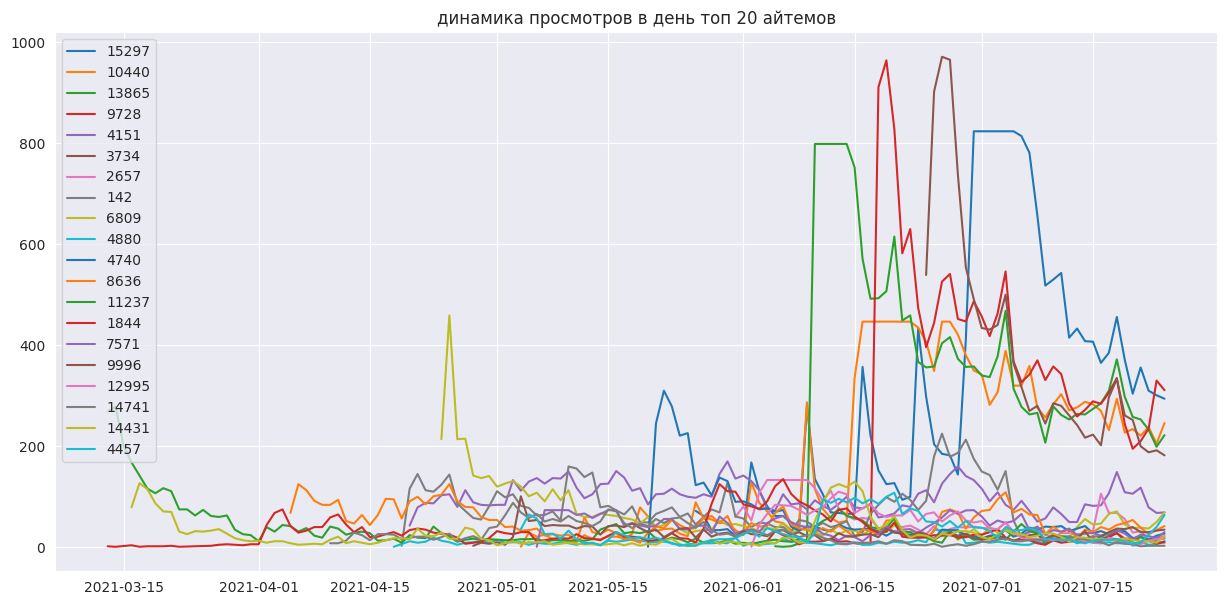

In [ ]:
k = 20
plt.figure(figsize=(15, 7))
for movie in top100movies[:k]:
    movie_watches = watch_history.loc[watch_history['item_id'] == movie]
    plt.plot(movie_watches['last_watch_dt'], movie_watches['cnt'], label=str(movie))
plt.legend()
plt.title('–¥–∏–Ω–∞–º–∏–∫–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–æ–≤ –≤ –¥–µ–Ω—å —Ç–æ–ø 20 –∞–π—Ç–µ–º–æ–≤')
plt.show()

–∫–∞–∂–µ—Ç—Å—è —Ç–∞–∫ –Ω–µ–º–Ω–æ–≥–æ —Å–≥–ª–∞–¥–∏–ª–∏ –≤—ã–±—Ä–æ—Å—ã

In [ ]:
# all watches
all_watches = watch_history.groupby('item_id')['cnt'].sum().reset_index()
items_df = items_df.merge(
    all_watches,
    how='left',
    on='item_id'
).rename(columns={'cnt':'all_time_watches'})

In [ ]:
# last month watches
last_month_watches = watch_history.loc[watch_history['last_watch_dt'].isin(dates[-35:-7])].groupby('item_id')['cnt'].sum().reset_index()
items_df = items_df.merge(
    last_month_watches,
    how='left',
    on='item_id'
).rename(columns={'cnt':'last_month_watches'})


# last week watches
last_week_watches = watch_history.loc[watch_history['last_watch_dt'].isin(dates[-14:-7])].groupby('item_id')['cnt'].sum().reset_index()
items_df = items_df.merge(
    last_week_watches,
    how='left',
    on='item_id'
).rename(columns={'cnt':'last_week_watches'})

In [ ]:
items_df['all_time_watches'].fillna(0, inplace=True)
items_df['last_month_watches'].fillna(0, inplace=True)
items_df['last_week_watches'].fillna(0, inplace=True)

—Ç–µ–ø–µ—Ä—å –Ω–∞—Å–ø–µ–º–ª–∏—Ä—É–µ–º –æ—Ç—Ä–∏—Ü–∞—Ç–µ–ª—å–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤

In [ ]:
items_df.columns

Index(['item_id', 'content_type', 'title', 'title_orig', 'release_year',
       'genres', 'countries', 'for_kids', 'age_rating', 'studios', 'directors',
       'actors', 'description', 'keywords', 'cnt_users', 'cnt_users_with_sex',
       'female_r', 'male_r', 'age_major', 'age_median', 'income_major',
       'income_median', 'all_time_watches', 'last_month_watches',
       'last_week_watches'],
      dtype='object')

In [ ]:
# —Å–æ—Ä—Ç–∏—Ä—É–µ–º —Å–ø–∏—Å–æ–∫ –∂–∞–Ω—Ä–æ–≤ —á—Ç–æ–±—ã –±—ã–ª–æ –ø—Ä–æ—â–µ –∏—Å–∫–∞—Ç—å –æ–¥–∏–Ω–∫–æ–≤—ã–µ —Å–æ—Å—Ç–∞–≤—ã

items_df['genres'] = items_df['genres'].apply(lambda s: ', '.join(sorted(s.split(', '))))

In [ ]:
len(train2)

62214

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
users = train2['user_id'].unique()
items_pool = train1['item_id'].unique()

for user in tqdm(users):
    pos = train2.loc[(train2['target'] == 1) & (train2['user_id'] == user), 'item_id'].values
    neg = train2.loc[(train2['target'] == 0) & (train2['user_id'] == user), 'item_id'].values

    # –µ—Å—Ç—å —É–∂–µ –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ–µ –∫–æ–ª–≤–æ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–æ–≤
    if len(neg) > len(pos) * 2:
        continue

    n_candidates = 2 * len(pos) - len(neg)

    in_val_set = []
    this_val_recs = val_recs.loc[val_recs['user_id'] == user]
    if len(this_val_recs) > 0:
        in_val_set = this_val_recs['ground_truth'].values[0]

    cur_items_pool = np.setdiff1d(items_pool, np.union1d(np.union1d(pos, neg), in_val_set))

    avg_female_r = items_df.loc[items_df['item_id'].isin(pos), 'female_r'].mean()
    if not avg_female_r: avg_female_r = 1

    age_mode = items_df.loc[items_df['item_id'].isin(pos), 'age_major'].mode().values
    if len(age_mode) > 0:
        age_mode = age_mode[0]
    else:
        age_mode = ''

    genres = items_df.loc[items_df['item_id'].isin(pos), 'genres'].unique()

    cond = items_df['item_id'].isin(cur_items_pool) & ((items_df['female_r'] < avg_female_r) | (items_df['age_major'] != age_mode) | (~items_df['genres'].isin(genres)))

    candidates = np.random.choice(items_df.loc[cond, 'item_id'].values, size=n_candidates)

    df_candidates = pd.DataFrame()
    df_candidates['item_id'] = candidates
    df_candidates['user_id'] = user
    df_candidates['target'] = 0

    train2 = train2.append(df_candidates, ignore_index=True)

  0%|          | 0/31701 [00:00<?, ?it/s]

—Å–¥–µ–ª–∞–µ–º one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–ª—è —Ç–æ–ø–æ–ø–≤—ã—Ö –∂–∞–Ω—Ä–æ–≤

In [ ]:
genres = items_df['genres'].values
genres[:5]

array(['–¥–µ—Ç–µ–∫—Ç–∏–≤—ã, –¥—Ä–∞–º—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –º–µ–ª–æ–¥—Ä–∞–º—ã',
       '–∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –∫–æ–º–µ–¥–∏–∏, –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è',
       '–±–æ–µ–≤–∏–∫–∏, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –∫–æ–º–µ–¥–∏–∏, –∫—Ä–∏–º–∏–Ω–∞–ª, —Ç—Ä–∏–ª–ª–µ—Ä—ã',
       '–¥—Ä–∞–º—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –º–µ–ª–æ–¥—Ä–∞–º—ã',
       '–¥–ª—è –¥–µ—Ç–µ–π, –∑–∞–ø–∞–¥–Ω—ã–µ –º—É–ª—å—Ç—Ñ–∏–ª—å–º—ã, –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ, –ø–æ–ª–Ω–æ–º–µ—Ç—Ä–∞–∂–Ω—ã–µ, —Å–µ–º–µ–π–Ω–æ–µ, —Å–∫–∞–∑–∫–∏'],
      dtype=object)

In [ ]:
all_genres = ', '.join(genres).split(', ')
names, cnts = np.unique(all_genres, return_counts=True)
all_genres = sorted(list(zip(cnts.tolist(), names.tolist())))
all_genres[-10:]

[(991, '–¥–æ–∫—É–º–µ–Ω—Ç–∞–ª—å–Ω–æ–µ'),
 (1060, '–∫—Ä–∏–º–∏–Ω–∞–ª'),
 (1327, '—Ä—É—Å—Å–∫–∏–µ'),
 (1543, '–±–æ–µ–≤–∏–∫–∏'),
 (1591, '–ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è'),
 (2028, '—Ç—Ä–∏–ª–ª–µ—Ä—ã'),
 (2040, '–º–µ–ª–æ–¥—Ä–∞–º—ã'),
 (2393, '–∑–∞—Ä—É–±–µ–∂–Ω—ã–µ'),
 (3062, '–∫–æ–º–µ–¥–∏–∏'),
 (4209, '–¥—Ä–∞–º—ã')]

In [ ]:
all_genres[-50:-40]

[(35, '—Å–∫–∞–∑–∫–∏'),
 (39, '—ç–∫—Ä–∞–Ω–∏–∑–∞—Ü–∏–∏'),
 (44, '–∫–æ–Ω—Ü–µ—Ä—Ç'),
 (50, '–ø–æ–∑–Ω–∞–≤–∞—Ç–µ–ª—å–Ω—ã–µ'),
 (56, '—Ñ–∏–ª—å–º—ã hbo'),
 (61, '–º–∏—Å—Ç–∏–∫–∞'),
 (62, '–ø—Ä–æ –∂–∏–≤–æ—Ç–Ω—ã—Ö'),
 (62, '—Ö–æ—á—É –≤—Å—ë –∑–Ω–∞—Ç—å'),
 (64, '–¥–µ—Ç—Å–∫–∏–µ'),
 (65, '–≤–µ—Å—Ç–µ—Ä–Ω')]

In [ ]:
top_genres = [el[1] for el in all_genres[-50:]]
items_df.reset_index(inplace=True)
items_df.drop(columns=['index'], inplace=True)

for index, row in tqdm(items_df.iterrows()):
    genres = row['genres'].split(', ')
    for genre in genres:
        if genre in top_genres:
              items_df.loc[index, genre] = 1

for genre in top_genres:
    if genre in items_df.columns:
        items_df[genre].fillna(0, inplace=True)

0it [00:00, ?it/s]

—Å–¥–µ–ª–∞–µ–º one-hot –∫–æ–¥–∏—Ä–æ–≤–∞–Ω–∏–µ –¥–ª—è —Å—Ç—Ä–∞–Ω

In [ ]:
countries = items_df['countries'].values
countries = countries[~pd.isnull(countries)]
countries[:5]

array(['–ò—Å–ø–∞–Ω–∏—è', '–°–®–ê', '–ö–∞–Ω–∞–¥–∞', '–í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è', '–°–®–ê'], dtype=object)

In [ ]:
all_countries = ', '.join(countries).split(', ')
names, cnts = np.unique(all_countries, return_counts=True)
all_countries = sorted(list(zip(cnts.tolist(), names.tolist())))
all_countries[-10:]

[(215, '–£–∫—Ä–∞–∏–Ω–∞'),
 (252, '–ò—Å–ø–∞–Ω–∏—è'),
 (266, '–ò—Ç–∞–ª–∏—è'),
 (385, '–ì–µ—Ä–º–∞–Ω–∏—è'),
 (428, '–ö–∞–Ω–∞–¥–∞'),
 (724, '–°–°–°–†'),
 (1084, '–í–µ–ª–∏–∫–æ–±—Ä–∏—Ç–∞–Ω–∏—è'),
 (1248, '–§—Ä–∞–Ω—Ü–∏—è'),
 (3088, '–†–æ—Å—Å–∏—è'),
 (4267, '–°–®–ê')]

In [ ]:
top_countries = [el[1] for el in all_countries[-30:]]

for index, row in tqdm(items_df.iterrows()):
    if type(row['countries']) == str:
        countries = row['countries'].split(', ')
        for country in countries:
            if country in top_countries:
                  items_df.loc[index, country] = 1

for country in top_countries:
    if country in items_df.columns:
        items_df[country].fillna(0, inplace=True)

0it [00:00, ?it/s]

In [ ]:
items_df.columns

Index(['level_0', 'item_id', 'content_type', 'title', 'title_orig',
       'release_year', 'genres', 'countries', 'for_kids', 'age_rating',
       ...
       '–ê–≤—Å—Ç—Ä–∞–ª–∏—è', '–ú–µ–∫—Å–∏–∫–∞', '–ù–∏–¥–µ—Ä–ª–∞–Ω–¥—ã', '–ö–∞–∑–∞—Ö—Å—Ç–∞–Ω', '–ì–æ–Ω–∫–æ–Ω–≥',
       '–ò—Ä–ª–∞–Ω–¥–∏—è', '–ò–Ω–¥–∏—è', '–í–µ–Ω–≥—Ä–∏—è', '–ü–æ–ª—å—à–∞', '–¢—É—Ä—Ü–∏—è'],
      dtype='object', length=106)

—è –¥—É–º–∞–ª–∞, —á—Ç–æ —Å–º–æ–≥—É –¥–æ–±–∞–≤–∏—Ç—å —Å–∫–æ—Ä –æ—Ç –º–æ–¥–µ–ª–∏ –ø–µ—Ä–≤–æ–≥–æ —ç—Ç–∞–ø–∞, –∏ —á—Ç–æ —Å–º–æ–≥—É –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –º–Ω–æ–≥–æ –∫–∞–Ω–¥–∏–¥–∞—Ç–æ–≤, –Ω–æ –Ω–µ—Ç( –ø–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —ç—Ç–æ –∫–∞–∫ –µ—Å—Ç—å

In [ ]:
train2.head()

user_id  item_id last_watch_dt  total_dur  watched_pct  target  \
0   646903    16228    2021-07-23    57375.0         46.0     1.0   
1   205710    10152    2021-07-20     1946.0         38.0     1.0   
2   312347     3017    2021-07-13     6121.0        100.0     1.0   
3   120361    15947    2021-07-24     2444.0         47.0     1.0   
4   964775    13000    2021-07-22      838.0         16.0     1.0   

  content_type              title      title_orig  release_year  ...  \
0       series         –°–æ–¥–µ—Ä–∂–∞–Ω–∫–∏             NaN        2021.0  ...   
1         film             –ì–∞–º–±–∏—Ç          Gambit        2012.0  ...   
2         film           –ó–∞—Ç–º–µ–Ω–∏–µ             NaN        2017.0  ...   
3         film            –Ø–≤–ª–µ–Ω–∏–µ  Happening, The        2008.0  ...   
4         film  –ß—Ç–æ —Å–∫—Ä—ã–≤–∞–µ—Ç –ª–æ–∂—å        Trespass        2011.0  ...   

  –¥–æ–∫—É–º–µ–Ω—Ç–∞–ª—å–Ω–æ–µ –∫—Ä–∏–º–∏–Ω–∞–ª  —Ä—É—Å—Å–∫–∏–µ  –±–æ–µ–≤–∏–∫–∏ –ø—Ä–∏–∫–ª—é—á–µ–Ω–∏—è —Ç—Ä–∏–ª–ª–µ—Ä—ã –º–µ–ª–æ–¥—Ä–∞–º—ã  \
0            0.0      0.0      0.0      0.0         0.0      1.0       0.0   
1            0.0      1.0      0.0      0.0         0.0      0.0       0.0   
2            0.0      0.0      0.0      0.0         1.0      0.0       0.0   
3            0.0      0.0      0.0      0.0         0.0      1.0       0.0   
4            0.0      0.0      0.0      0.0         0.0      1.0       0.0   

  –∑–∞—Ä—É–±–µ–∂–Ω—ã–µ –∫–æ–º–µ–¥–∏–∏  –¥—Ä–∞–º—ã  
0        0.0     0.0    0.0  
1        0.0     1.0    0.0  
2        0.0     0.0    0.0  
3        0.0     0.0    1.0  
4        0.0     0.0    1.0  

[5 rows x 116 columns]

In [ ]:
def recommend(model, user):
    enc_user = model.user_encoder.transform([user])[0]
    print(enc_user)
    item_ids, scores = model.model.recommend(enc_user, user_items=model.sparse[enc_user], N=100)
    orig_items = model.item_encoder.inverse_transform(item_ids)
    return orig_items, scores

In [ ]:
user = 646903
items = train2.loc[train2['user_id'] == user, 'item_id'].values
orig_items, scores = recommend(cosine_model, user)

199392


In [ ]:
# –Ω–µ –≤—ã–¥–∞–µ—Ç 100 –∞–π—Ç–µ–º–æ–≤
orig_items, scores

(array([14323, 13443, 13272, 12678,  2454, 13283, 12177,  7193,  3759,
          342, 15342, 12577, 14404, 12190,  2719, 15767, 14186, 13954,
         6612,  4044]),
 array([0.15430335, 0.15430335, 0.15430335, 0.15430335, 0.15430335,
        0.10910895, 0.10910895, 0.10910895, 0.10910895, 0.10910895,
        0.08908708, 0.08908708, 0.07715167, 0.07715167, 0.07715167,
        0.06900656, 0.06900656, 0.06900656, 0.06900656, 0.        ]))

—ç—Ç–æ –Ω–µ –∏–¥–µ–∞–ª—å–Ω—ã–π –≤–∞—Ä–∏–∞–Ω—Ç, –Ω–æ —á—Ç–æ–±—ã –¥–∞—Ç—å –∫–∞—Ç–±—É—Å—Ç—É –ø–æ–±–æ–ª—å—à–µ –∏–Ω—Ñ—ã, —è –≤–æ–∑—å–º—É –≤–µ–∫—Ç–æ—Ä–∞ –∏–∑ –º–æ–¥–µ–ª–∏ ALS –∏–∑ –ø–µ—Ä–≤–æ–π —á–∞—Å—Ç–∏

In [ ]:
train2

user_id  item_id last_watch_dt  total_dur  watched_pct  target
0        646903    16228    2021-07-23    57375.0         46.0     1.0
1        205710    10152    2021-07-20     1946.0         38.0     1.0
2        312347     3017    2021-07-13     6121.0        100.0     1.0
3        120361    15947    2021-07-24     2444.0         47.0     1.0
4        964775    13000    2021-07-22      838.0         16.0     1.0
...         ...      ...           ...        ...          ...     ...
157960   615135     9844           NaT        NaN          NaN     0.0
157961    74866     4289           NaT        NaN          NaN     0.0
157962    74866    14927           NaT        NaN          NaN     0.0
157963   613662    13976           NaT        NaN          NaN     0.0
157964   613662    15108           NaT        NaN          NaN     0.0

[157965 rows x 6 columns]

In [ ]:
user = 646903
items = train2.loc[train2['user_id'] == user, 'item_id'].values

In [ ]:
enc_items = als.item_encoder.transform(items)
enc_items

array([10996, 10846,  8874])

In [ ]:
als.model.item_factors[enc_items].shape

(3, 100)

In [ ]:
als.model.item_factors[enc_items].T.shape

(100,)

In [ ]:
for user_id in tqdm(train2['user_id'].unique()):
    items = train2.loc[train2['user_id'] == user_id, 'item_id'].values
    enc_user = als.user_encoder.transform([user])[0]
    enc_items = als.item_encoder.transform(items)
    cos_dist = (als.model.user_factors[enc_user] @ als.model.item_factors[enc_items].T) / (np.linalg.norm(als.model.user_factors[enc_user]) * np.linalg.norm(als.model.item_factors[enc_items], ord=2, axis=1))
    train2.loc[train2['user_id'] == user_id, 'cos_dist'] = cos_dist

  0%|          | 0/31701 [00:00<?, ?it/s]

In [ ]:
train2

user_id  item_id last_watch_dt  total_dur  watched_pct  target  \
0        646903    16228    2021-07-23    57375.0         46.0     1.0   
1        205710    10152    2021-07-20     1946.0         38.0     1.0   
2        312347     3017    2021-07-13     6121.0        100.0     1.0   
3        120361    15947    2021-07-24     2444.0         47.0     1.0   
4        964775    13000    2021-07-22      838.0         16.0     1.0   
...         ...      ...           ...        ...          ...     ...   
157960   615135     9844           NaT        NaN          NaN     0.0   
157961    74866     4289           NaT        NaN          NaN     0.0   
157962    74866    14927           NaT        NaN          NaN     0.0   
157963   613662    13976           NaT        NaN          NaN     0.0   
157964   613662    15108           NaT        NaN          NaN     0.0   

        cos_dist  
0       0.185479  
1       0.190493  
2       0.064972  
3       0.107176  
4       0.212300  
...          ...  
157960  0.217702  
157961  0.216435  
157962  0.203511  
157963  0.216439  
157964  0.217158  

[157965 rows x 7 columns]

–¥–µ–ª–∏–º –Ω–∞ —Ç–µ—Å—Ç –∏ —Ç—Ä–µ–π–Ω –¥–ª—è –∫–∞—Ç–±—É—Å—Ç–∞

In [ ]:
train2 = train2.merge(
    users_df,
    how='left',
    on='user_id'
)

train2 = train2.merge(
    items_df,
    how='left',
    on='item_id'
)

In [ ]:
train2['total_dur'].fillna(0, inplace=True)
train2['watched_pct'].fillna(0, inplace=True)

In [ ]:
train2.loc[train2['content_type'] == 'series', 'content_type'] = 0
train2.loc[train2['content_type'] == 'film', 'content_type'] = 1

train2.loc[train2['sex'] == '–ú', 'sex'] = 0
train2.loc[train2['sex'] == '–ñ', 'sex'] = 1

In [ ]:
train2['sex'].unique()

array([nan, '–ú', '–ñ'], dtype=object)

In [ ]:
cols = ['user_id',
       'content_type', 'release_year', 'target',
       'for_kids', 'age_rating', 'cnt_users', 'cnt_users_with_sex',
       'female_r', 'male_r', 'age_major', 'age_median', 'income_major',
       'income_median', 'all_time_watches', 'last_month_watches',
       'last_week_watches', 'age', 'income', 'sex', 'kids_flg'] + top_genres + top_countries
categ = ['age_major', 'age_median', 'income_major', 'income_median', 'age', 'income',]

In [ ]:
train2.drop(index=train2.loc[train2['target'].isna()].index, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
import catboost

In [ ]:
for categ_column in categ:
    train2[categ_column].fillna('', inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train2[cols], train2['target'], test_size=0.4, random_state=42, stratify=train2['target'])

In [ ]:
X_train.sort_values('user_id', inplace=True)
X_test.sort_values('user_id', inplace=True)
y_train = X_train.target
y_test = X_test.target

In [ ]:
# group_id == user_id here
train_pool = catboost.Pool(X_train.drop(columns='target'), label=y_train, cat_features=categorical, group_id=X_train['user_id'])
test_pool = catboost.Pool(X_test.drop(columns='target'), label=y_test, cat_features=categorical, group_id=X_test['user_id'])

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
(len(cols) ** 0.5 )/ len(cols)

0.0985329278164293

In [ ]:
catboost_model = CatBoostClassifier(random_seed=42, iterations=500, max_depth=3, subsample=0.1, l2_leaf_reg=0.1).fit(train_pool, eval_set=test_pool, verbose=0)

In [ ]:
preds = catboost_model.predict(test_pool)

In [ ]:
np.sum(preds == y_test) / len(y_test)

0.8412675421655723

In [339]:
len(catboost_model.get_feature_importance(train_pool))

100

In [348]:
# https://stackoverflow.com/questions/64988694/how-can-i-get-the-feature-importance-of-a-catboost-in-a-pandas-dataframe

def plot_feature_importance(importance,names,model_type, k=20):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df = fi_df.iloc[:k]

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

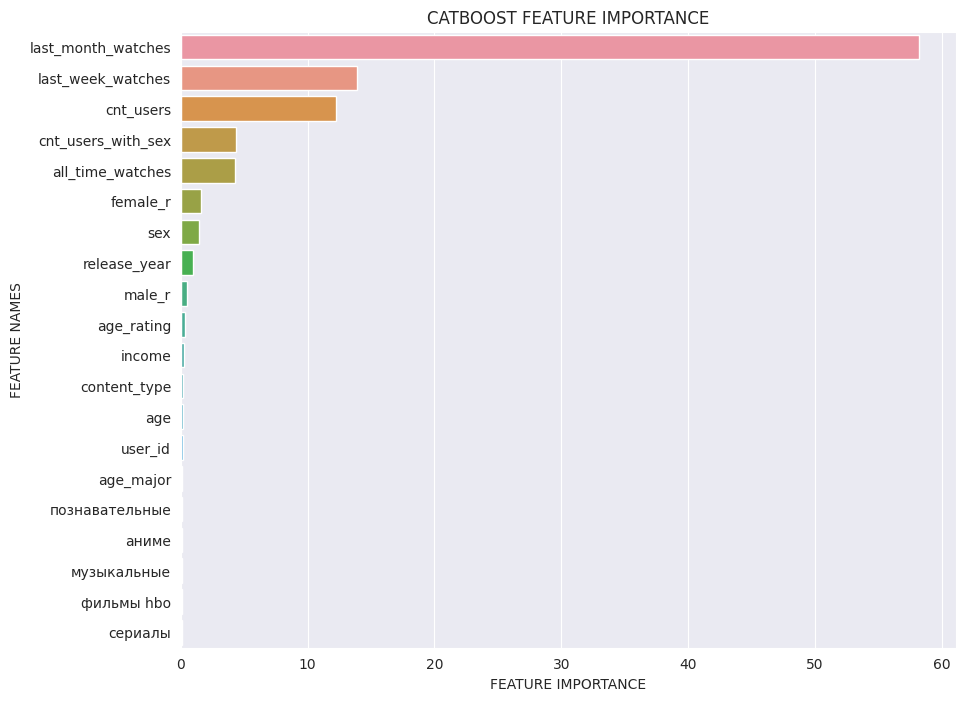

In [349]:
plot_feature_importance(catboost_model.get_feature_importance(),X_train.drop(columns=['target']).columns,'CATBOOST')

–∏–Ω—Ç–µ—Ä–µ—Å–Ω–æ, —á—Ç–æ –º–µ–Ω–µ–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ –∂–∞–Ω—Ä—ã –≤–ª–∏—è—é—Ç –±–æ–ª—å—à–µ —á–µ–º –¥—Ä–∞–º—ã, –∫–æ–º–µ–¥–∏–∏ –∏–ª–∏ –±–æ–µ–≤–∏–∫–∏..

### —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ã

–Ω–µ —É—Å–ø–µ–≤–∞—é —É–∂–µ –ø–æ—Å–∏–¥–µ—Ç—å —Å –∫–∞—Ç–±—É—Å—Ç–æ–º, —Ö–æ—á—É —Ö–æ—Ç—è –±—ã –ø–æ—Å—á–∏—Ç–∞—Ç—å —Ñ–∏–Ω–∞–ª—å–Ω—ã–µ –º–µ—Ç—Ä–∏–∫–∏

In [ ]:
train1_users = train1['user_id'].unique()

In [ ]:
# –¥–ª—è —ç—Ç–∏—Ö —Ä–µ–±—è—Ç –º–æ–∂–µ–º –ø—Ä–∏–º–µ–Ω–∏—Ç—å –¥–≤—É—Ö—ç—Ç–∞–ø–Ω—É—é –º–æ–¥–µ–ª—å, —Ç–∞–∫ –∫–∞–∫ —É –Ω–∏—Ö –µ—Å—Ç—å –∏—Å—Ç–æ—Ä–∏—è
test_hot_users = test_part.loc[test_part['user_id'].isin(train1_users)].copy()

# —É —ç—Ç–∏—Ö —Ä–µ–±—è—Ç –∏—Å—Ç–æ—Ä–∏–∏ –Ω–µ—Ç, –±—É–¥–µ–º –ø–æ–ª—å–∑–æ–≤–∞—Ç—å—Å—è —ç–≤—Ä–∏—Å—Ç–∏–∫–∞–º–∏, –Ω–∞–ø—Ä–∏–º–µ—Ä —Å–æ–≤–µ—Ç–æ–≤–∞—Ç—å —Å–∞–º–æ–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ–µ
test_cold_users = test_part.loc[~test_part['user_id'].isin(train1_users)].copy()

In [ ]:
# –±—É–¥–µ–º —Ñ–∏–ª—å—Ç—Ä–æ–≤–∞—Ç—å —Ç–æ, —á—Ç–æ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å —É–∂–µ —Å–º–æ—Ç—Ä–µ–ª
to_filter = train_part.groupby('user_id')['item_id'].apply(list).reset_index().rename(columns={'item_id':'ground_truth'})

In [ ]:
test_hot_users['cosine_recs'] = cosine_model.predict(test_hot_users, topn=30, to_filter=to_filter)

predicting:   0%|          | 0/10488 [00:00<?, ?it/s]

In [285]:
hot_users_tupels = []
for user in tqdm(test_hot_users['user_id'].unique()):
    vals = test_hot_users.loc[test_hot_users['user_id'] == user, 'cosine_recs'].values[0].tolist()
    uids = [user] * len(vals)
    hot_users_tupels += (list(zip(uids, vals)))

  0%|          | 0/10488 [00:00<?, ?it/s]

In [287]:
hot_users_data = pd.DataFrame(hot_users_tupels, columns=['user_id', 'item_id'])

In [288]:
hot_users_data.head()

user_id  item_id
0       30    16515
1       30    16232
2       30    10887
3       30    10381
4       30     9155

In [289]:
# –¥–æ–±–≤–ª—è–µ–º –∫–æ—Å–∏–Ω—É—Å–Ω–æ–µ —Ä–∞—Å—Ç–æ—è–Ω–∏–µ –∏–∑ –º–æ–¥–µ–ª–∏ als –ø–µ—Ä–≤–æ–≥–æ —ç—Ç–∞–ø–∞

for user_id in tqdm(hot_users_data['user_id'].unique()):
    items = hot_users_data.loc[hot_users_data['user_id'] == user_id, 'item_id'].values
    enc_user = als.user_encoder.transform([user])[0]
    enc_items = als.item_encoder.transform(items)
    cos_dist = (als.model.user_factors[enc_user] @ als.model.item_factors[enc_items].T) / (np.linalg.norm(als.model.user_factors[enc_user]) * np.linalg.norm(als.model.item_factors[enc_items], ord=2, axis=1))
    hot_users_data.loc[hot_users_data['user_id'] == user_id, 'cos_dist'] = cos_dist

  0%|          | 0/10484 [00:00<?, ?it/s]

In [290]:
# –¥–æ–±–∞–≤–ª—è–µ–º –ø—Ä–∏–∑–Ω–∞–∫–∏ –∏–∑ —Ç–∞–±–ª–∏—á–µ–∫ —Å —é–∑–µ—Ä–∞–º–∏ –∏ –∞–π—Ç–µ–º–∞–º–∏

hot_users_data = hot_users_data.merge(
    users_df,
    how='left',
    on='user_id'
)

hot_users_data = hot_users_data.merge(
    items_df,
    how='left',
    on='item_id'
)

In [292]:
hot_users_data.loc[hot_users_data['content_type'] == 'series', 'content_type'] = 0
hot_users_data.loc[hot_users_data['content_type'] == 'film', 'content_type'] = 1

hot_users_data.loc[hot_users_data['sex'] == '–ú', 'sex'] = 0
hot_users_data.loc[hot_users_data['sex'] == '–ñ', 'sex'] = 1

In [293]:
for categ_column in categ:
    hot_users_data[categ_column].fillna('', inplace=True)

In [294]:
hot_users_data.sort_values('user_id', inplace=True)

In [300]:
hot_users_data.drop(columns='level_0', inplace=True)

In [ ]:
cols.remove('target')

In [309]:
final_pool = catboost.Pool(hot_users_data[cols], cat_features=categ, group_id=hot_users_data['user_id'])

In [311]:
hot_users_data['probs'] = catboost_model.predict_proba(final_pool)[:, 1]

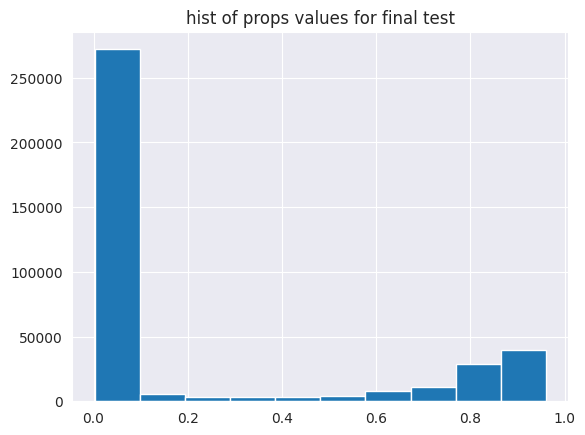

In [313]:
plt.hist(hot_users_data['probs'])
plt.title('hist of props values for final test')
plt.show()

In [315]:
hot_users_data.head()

user_id  item_id  cos_dist age income  sex  kids_flg  income_int  age_int  \
0        30    16515  0.014473             NaN       NaN         NaN      NaN   
32       30    14345  0.007347             NaN       NaN         NaN      NaN   
31       30    14761  0.013231             NaN       NaN         NaN      NaN   
30       30    11618  0.017388             NaN       NaN         NaN      NaN   
29       30     8908  0.009255             NaN       NaN         NaN      NaN   

   content_type  ... –ú–µ–∫—Å–∏–∫–∞ –ù–∏–¥–µ—Ä–ª–∞–Ω–¥—ã  –ö–∞–∑–∞—Ö—Å—Ç–∞–Ω –ì–æ–Ω–∫–æ–Ω–≥ –ò—Ä–ª–∞–Ω–¥–∏—è  –ò–Ω–¥–∏—è  \
0             0  ...     0.0        0.0        0.0     0.0      0.0    0.0   
32            1  ...     0.0        0.0        0.0     0.0      0.0    0.0   
31            1  ...     0.0        0.0        0.0     0.0      0.0    0.0   
30            0  ...     0.0        0.0        0.0     0.0      0.0    0.0   
29            0  ...     0.0        0.0        0.0     0.0      0.0    0.0   

    –í–µ–Ω–≥—Ä–∏—è –ü–æ–ª—å—à–∞ –¢—É—Ä—Ü–∏—è     probs  
0       0.0    0.0    0.0  0.006546  
32      0.0    0.0    0.0  0.184680  
31      0.0    0.0    0.0  0.008476  
30      0.0    0.0    0.0  0.008086  
29      0.0    0.0    0.0  0.007863  

[5 rows x 114 columns]

In [325]:
k=10
recs = []
for user in tqdm(test_hot_users['user_id'].unique()):
    items = hot_users_data.loc[hot_users_data['user_id'] == user].sort_values('probs', ascending=False)['item_id'].values[:k]
    recs.append(items)

  0%|          | 0/10488 [00:00<?, ?it/s]

In [327]:
test_hot_users['my_recs'] = recs

In [329]:
test_cold_users['my_recs'] = test_cold_users['toppopular_recs']

In [331]:
test_hot_users = test_hot_users.append(test_cold_users)

In [332]:
print('final score on my two-step model:')
print(evaluate_recommender(df=test_hot_users, model_preds_col="my_recs"))

final score on my two-step model:
{'ndcg': 0.1336323612501178, 'recall': 0.059134082126785524}


In [336]:
catboost_model.save_model('/content/drive/MyDrive/ml_tink/catboost_model')

# –¢–∞–∫ —á—Ç–æ –∂–µ –Ω—É–∂–Ω–æ —Å–¥–µ–ª–∞—Ç—å?

### tl;dr ‚Äì –∫—Ä–∞—Å–∏–≤—ã–µ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏, –∫—Ä–µ–∞—Ç–∏–≤–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—ã, —Ä–∞–∑–ª–∏—á–Ω—ã–µ –º–æ–¥–µ–ª–∏

**–ú—ã –Ω–µ —Å—Ç–∞–≤–∏–º –ø–µ—Ä–µ–¥ –≤–∞–º–∏ –∑–∞–¥–∞—á—É –≤—ã–±–∏—Ç—å –ª—É—á—à–∏–π —Å–∫–æ—Ä –Ω–∞ —Ç–µ—Å—Ç–æ–≤–æ–π –≤—ã–±–æ—Ä–∫–µ** (—Ö–æ—Ç—è —ç—Ç–æ –æ—á–µ–Ω—å –∂–µ–ª–∞—Ç–µ–ª—å–Ω–æ), –∑–∞–¥–∞–Ω–∏–µ —Å–∫–æ—Ä–µ–µ –≤ —Ç–æ–º, —á—Ç–æ–±—ã –∏—Å—Å–ª–µ–¥–æ–≤–∞—Ç—å —Ä–∞–∑–ª–∏—á–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—ã, –ø–æ–∏—Å–∫–∞—Ç—å –∏–Ω—Å–∞–π—Ç—ã –≤ –¥–∞–Ω–Ω—ã—Ö, –ø–æ—Å—Ç—Ä–æ–∏—Ç—å –∫—Ä–∞—Å–∏–≤—ã–π –∞–Ω–∞–ª–∏–∑ —Å–≤–æ–∏—Ö –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–∏–π –∏ –ø–æ–∏–≥—Ä–∞—Ç—å—Å—è —Å –¥–∞–Ω–Ω—ã–º–∏.

–ï—Å–ª–∏ –≥–æ–≤–æ—Ä–∏—Ç—å –±–æ–ª–µ–µ —Ñ–æ—Ä–º–∞–ª—å–Ω–æ, —Ç–æ –º—ã –±—É–¥–µ–º –æ—Ü–µ–Ω–∏–≤–∞—Ç—å —Å–ª–µ–¥—É—é—â–µ–µ:
1. –ö–∞–∫–∏–µ –º–µ—Ç–æ–¥—ã –≤—ã –ø–æ–ø—Ä–æ–±–æ–≤–∞–ª–∏ –¥–ª—è —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏
   ##### –≠—Ç–æ –º–æ–≥—É—Ç –±—ã—Ç—å
   * —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –ø–æ–¥—Ö–æ–¥—ã, –æ—Å–Ω–æ–≤–∞–Ω–Ω—ã–µ –Ω–∞ –≤–∞—à–µ–º –∞–Ω–∞–ª–∏–∑–µ –¥–∞–Ω–Ω—ã—Ö
   * –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–µ—Ç—Ä–∏—á–µ—Å–∫–∏–µ –º–µ—Ç–æ–¥—ã, –≤—Ä–æ–¥–µ knn, –∞ –∫–∞–∫ –ø–æ—Å—á–∏—Ç–∞—Ç—å –≤–µ–∫—Ç–æ—Ä–∞ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π ‚Äì –ø—É—Å—Ç—å —É–∂–µ –≤–∞—à–∞ —Ñ–∞–Ω—Ç–∞–∑–∏—è –≤–∞–º –¥–∏–∫—Ç—É–µ—Ç. –ó–¥–µ—Å—å –≤–∞–º –ø–æ–º–æ–≥—É—Ç item-based –º–æ–¥–µ–ª–∏, –≤—Ä–æ–¥–µ EASE –∏–ª–∏ SLIM
   * –∑–∞—Ç—é–Ω–µ–Ω–Ω—ã–π –∏–ª–∏ –º–æ–¥–∏—Ñ–∏—Ü–∏—Ä–æ–≤–∞–Ω–Ω—ã–π ALS (–Ω—É –∏–ª–∏ –ª—é–±–∞—è –¥—Ä—É–≥–∞—è –º–æ–¥–µ–ª—å –º–∞—Ç—Ä–∏—á–Ω–æ–π —Ñ–∞–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏)
   * –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏–µ –º–æ–¥–µ–ª–∏ –≤—Ä–æ–¥–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–Ω—ã—Ö –±—É—Å—Ç–∏–Ω–≥–æ–≤ (catboost, lightGBM) —Ç–æ–∂–µ —Ä–∞–±–æ—Ç–∞—é—Ç –≤ —Ç–∞–∫–∏—Ö –∑–∞–¥–∞—á–∞—Ö (–≤–∞–º –≤–µ–¥—å –Ω–∏—á–µ–≥–æ –Ω–µ –º–µ—à–∞–µ—Ç —É—á–∏—Ç—å –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä –Ω–∞ –ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–π –∏ –Ω–µ–ø—Ä–æ—Å–º–æ—Ç—Ä–µ–Ω–Ω—ã–π —Ñ–∏–ª—å–º—ã, –ø—Ä–∞–≤–¥–∞? –æ—Å—Ç–∞–ª–æ—Å—å —Ç–æ–ª—å–∫–æ –Ω–∞—Å—ç–º–ø–ª–∏—Ç—å –≤—Ç–æ—Ä—ã—Ö)
   * –æ—á–µ–Ω—å –ø—Ä–∏–≤–µ—Ç—Å—Ç–≤—É—é—Ç—Å—è (–Ω–æ –Ω–µ –æ–±—è–∑–∞—Ç–µ–ª—å–Ω—ã) DL –ø–æ–¥—Ö–æ–¥—ã, –Ω–∞–ø—Ä–∏–º–µ—Ä [DSSM](https://kishorepv.github.io/DSSM/), [NCF](https://towardsdatascience.com/neural-collaborative-filtering-96cef1009401), [Bert4Rec](https://towardsdatascience.com/build-your-own-movie-recommender-system-using-bert4rec-92e4e34938c5) –∏–ª–∏ [–ª—é–±–æ–π –¥—Ä—É–≥–æ–π –∞–ª–≥–æ—Ä–∏—Ç–º](https://habr.com/ru/companies/prequel/articles/573880/), –∫–æ—Ç–æ—Ä—ã–π –≤—ã –Ω–∞–π–¥–µ—Ç–µ, –Ω–∞–ø—Ä–∏–º–µ—Ä –≥—Ä–∞—Ñ–æ–≤—ã–µ –∏–ª–∏ –¥–∏—Ñ—É–∑–∏–æ–Ω–Ω—ã–µ –ø–æ–¥—Ö–æ–¥—ã, –ø–æ—á–µ–º—É –Ω–µ—Ç)
     
   –í –æ–±—â–µ–º –Ω–µ—Ç –Ω–∏–∫–∞–∫–∏—Ö –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–π –Ω–∞ –º–æ–¥–µ–ª–∏, –∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ç–æ, —á—Ç–æ –≤–∞–º –Ω—Ä–∞–≤–∏—Ç—Å—è –∏–ª–∏ –∫–∞–∂–µ—Ç—Å—è –ª–æ–≥–∏—á–Ω—ã–º. –ù–µ —Å—Ç–æ–∏—Ç –±—Ä–æ—Å–∞—Ç—å—Å—è –≤ –∫—Ä–∞–π–Ω–æ—Å—Ç–∏: –æ–±—É—á–∞—Ç—å —Ü–µ–ª—ã–π –∑–æ–æ–ø–∞—Ä–∫ –º–æ–¥–µ–ª–µ–π –∏–ª–∏ –∑–∞—Ç—é–Ω–∏—Ç—å –æ–¥–Ω—É –¥–æ 0 –æ—à–∏–±–∫–∏. –ù–∞–π–¥–∏—Ç–µ –±–∞–ª–∞–Ω—Å –º–µ–∂–¥—É –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –∏ –∫–∞—á–µ—Å—Ç–≤–æ–º)
2. –ö–∞–∫ —Ö–æ—Ä–æ—à–æ –≤—ã –≤–∞–ª–∏–¥–∏—Ä–æ–≤–∞–ª–∏ —Å–≤–æ–∏ –º–æ–¥–µ–ª–∏
3. EDA (Exploration Data Analysis) –¥–∞–Ω–Ω—ã—Ö, —Å –∫–æ—Ç–æ—Ä—ã–º–∏ –≤—ã —Ä–∞–±–æ—Ç–∞–µ—Ç–µ
4. EDA –ø–æ–ª—É—á–µ–Ω–Ω—ã—Ö —Ä–µ–∫–æ–º–µ–Ω–¥–∞—Ü–∏–π, –Ω–∞—Å–∫–æ–ª—å–∫–æ –æ–Ω–∏ —Ä–∞–∑–Ω–æ–æ–±—Ä–∞–∑–Ω—ã–µ, –Ω–∞—Å–∫–æ–ª—å–∫–æ —Å–º–µ—â–µ–Ω—ã –≤ —Å—Ç–æ—Ä–æ–Ω—É –ø–æ–ø—É–ª—è—Ä–Ω—ã—Ö –∞–π—Ç–µ–º–æ–≤ –∏ –≤—Å—è–∫–æ–µ —Ç–∞–∫–æ–µ
5. **–û–±—è–∑–∞—Ç–µ–ª—å–Ω–æ** —Å–æ—Ö—Ä–∞–Ω–∏—Ç–µ —Å–≤–æ—é –ª—É—á—à—É—é –º–æ–¥–µ–ª—å (—Ñ–∞–π–ª–∏–∫ –æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏), —á—Ç–æ–±—ã –º—ã –º–æ–≥–ª–∏ –≤–æ—Å–ø—Ä–æ–∏–∑–≤–µ—Å—Ç–∏ –≤–∞—à —Ä–µ–∑—É–ª—å—Ç–∞—Ç!


## –ü–æ–º–Ω–∏—Ç–µ:
1. –í—Å–µ –¥–æ–ø–æ–ª–Ω–∏—Ç–µ–ª—å–Ω—ã–µ –∏—Å—Ç–æ—á–Ω–∏–∫–∏ –¥–∞–Ω–Ω—ã—Ö **–æ–±—è–∑–∞—Ç–µ–ª—å–Ω–æ** –¥–æ–ª–∂–Ω—ã –±—ã—Ç—å –æ–ø–∏—Å–∞–Ω—ã
2. –ù–µ—Ç –ø—Ä–∞–≤–∏–ª—å–Ω–æ–≥–æ —Å–ø–æ—Å–æ–±–∞ —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É. –ù–µ —Å—Ç–æ–∏—Ç –±–µ—Å–ø–æ–∫–æ–∏—Ç—å—Å—è, —á—Ç–æ –≤—ã –¥–µ–ª–∞–µ—Ç–µ —á—Ç–æ-—Ç–æ –Ω–µ–ø—Ä–∞–≤–∏–ª—å–Ω–æ. –ú—ã —Ö–æ—Ç–∏–º —É–≤–∏–¥–µ—Ç—å —Ç–≤–æ—Ä—á–µ—Å–∫–∏–π –ø–æ–¥—Ö–æ–¥ –∏ –≤–∞—à–∏ —Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç–∏ –∫ –∏—Å—Å–ª–µ–¥–æ–≤–∞–Ω–∏—é –∏ –ø—Ä–æ—Ç–æ—Ç–∏–ø–∏—Ä–æ–≤–∞–Ω–∏—é, –∞ –Ω–µ –∫–∞–∫–æ–µ-—Ç–æ –∫–æ–Ω–∫—Ä–µ—Ç–Ω–æ–µ —Ä–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏.
3. –í—ã –º–æ–∂–µ—Ç–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ª—é–±—ã–µ –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ –∏ —Ñ—Ä–µ–π–º–≤–æ—Ä–∫–∏, –∫–æ—Ç–æ—Ä—ã–µ –≤–∞–º –º–æ–≥—É—Ç –±—ã—Ç—å –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã.
4. –°—Ñ–æ–∫—É—Å–∏—Ä—É–π—Ç–µ—Å—å –Ω–∞ —Ç–æ–º, —á—Ç–æ–±—ã –∫–æ–¥ –±—ã–ª–∏ —á–∏—Å—Ç—ã–π –∏ –ø–æ–Ω—è—Ç–Ω—ã–π. –ï—Å–ª–∏ –≤—ã —Å—á–∏—Ç–∞–µ—Ç–µ, —á—Ç–æ –∫–∞–∫–∞—è-—Ç–æ –µ–≥–æ —á–∞—Å—Ç—å –º–æ–∂–µ—Ç –±—ã—Ç—å –Ω–µ–ø–æ–Ω—è—Ç–Ω–∞, —Ç–æ –¥–æ–±–∞–≤—å—Ç–µ –∫–æ–º–º–µ–Ω—Ç–∞—Ä–∏–∏. –ú—ã –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ —Ü–µ–Ω–∏–º —Ö–æ—Ä–æ—à–æ –Ω–∞–ø–∏—Å–∞–Ω–Ω—ã–π –∫–æ–¥ –∏ –≤—ã–≤–æ–¥—ã, –ø–æ—ç—Ç–æ–º—É –µ—Å–ª–∏ —Ä–µ—à–µ–Ω–∏–µ –∑–∞–¥–∞—á–∏ –±—É–¥–µ—Ç –æ—Ñ–æ—Ä–º–ª–µ–Ω–æ –≥—Ä—è–∑–Ω–æ, —Ç–æ –º—ã –º–æ–∂–µ–º –æ—Ç–∫–ª–æ–Ω–∏—Ç—å –∑–∞—è–≤–∫—É.

## –†–µ–∑—É–ª—å—Ç–∞—Ç
–ú—ã –æ–∂–∏–¥–∞–µ–º —É–≤–∏–¥–µ—Ç—å –æ–¥–∏–Ω –∏–ª–∏ –¥–≤–∞ (EDA + –æ–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–µ–π) –Ω–æ—É—Ç–±—É–∫(–∞) –Ω–∞ –≤–∞—à–µ–º [GitHub](https://github.com/) –∏–ª–∏ —Å—Å—ã–ª–∫–∞–º–∏ –Ω–∞ –≤–∞—à [Google Colab](https://colab.research.google.com/?hl=ru).
